# Understanding Data

In [1]:
!pip install word2number

In [3]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from word2number import w2n
from tqdm import tqdm
from IPython.display import Markdown
from sklearn.preprocessing import LabelEncoder
from unidecode import unidecode
import textwrap
import ast
import re

In [5]:
airbnb = pd.read_excel('AirBnB.xlsx')

In [7]:
airbnb.head(3)

ID                           Listing Url       Scrape ID Last Scraped  \
0  6017649  https://www.airbnb.com/rooms/6017649  20170402075052   2017-04-02   
1  9192415  https://www.airbnb.com/rooms/9192415  20170402075052   2017-04-02   
2   743788   https://www.airbnb.com/rooms/743788  20170402075052   2017-04-02   

                                Name  \
0            Nice room at Vondelpark   
1    Cozy apartment center Amsterdam   
2  Le Quartier Sonang-Kamar Bidadari   

                                             Summary  \
0  Nice and clean private bedroom near the city c...   
1  Cozy 2 person apartment in Amsterdam on walkin...   
2  ‘Le Quartier Sonang’ is a peaceful, quiet town...   

                                               Space  \
0  I offer a cuzy, private room in a nice apartme...   
1  The appartment has a living room, a kitchen, a...   
2  We opened our doors on the 25th of April 2012 ...   

                                         Description Experiences Offered  \
0  Nice and clean private bedroom near the city c...                none   
1  Cozy 2 person apartment in Amsterdam on walkin...                none   
2  ‘Le Quartier Sonang’ is a peaceful, quiet town...                none   

                               Neighborhood Overview  ...  \
0                 Really nice and quiet nighborhood!  ...   
1  This is an apartment situated at the West side...  ...   
2                                                NaN  ...   

  Review Scores Communication Review Scores Location Review Scores Value  \
0                         9.0                    9.0                 9.0   
1                        10.0                   10.0                10.0   
2                         NaN                    NaN                 NaN   

  License Jurisdiction Names Cancellation Policy  \
0     NaN          Amsterdam            flexible   
1     NaN          Amsterdam            moderate   
2     NaN          Amsterdam              strict   

  Calculated host listings count Reviews per Month  \
0                              1              0.13   
1                              1              0.99   
2                              2               NaN   

                             Geolocation  \
0   52.35992696894107, 4.862859671199358   
1  52.36137101269532, 4.8738603256015365   
2   52.36456756846072, 4.875639539930118   

                                            Features  
0                               Host Has Profile Pic  
1  Host Is Superhost, Host Has Profile Pic, Host ...  
2            Host Has Profile Pic, Is Location Exact  

[3 rows x 89 columns]

In [9]:
airbnb.tail(3)

ID                            Listing Url       Scrape ID  \
123058  17998459  https://www.airbnb.com/rooms/17998459  20170507222235   
123059  17518182  https://www.airbnb.com/rooms/17518182  20170507222235   
123060  10562264  https://www.airbnb.com/rooms/10562264  20170507222235   

       Last Scraped                                             Name  \
123058   2017-05-08   Amazing Room in the heart of Europe (Berlin) ❤   
123059   2017-05-08  Well-connected, clean, private room in Wedding.   
123060   2017-05-08                      colour your life in Berlin.   

                                                  Summary Space  \
123058  Big and bright room   located in one of the be...   NaN   
123059  The flat is well connected to local amenities ...   NaN   
123060  Hello, do you want to spend a couple of days i...   NaN   

                                              Description Experiences Offered  \
123058  Big and bright room   located in one of the be...                none   
123059  The flat is well connected to local amenities ...                none   
123060  Hello, do you want to spend a couple of days i...                none   

       Neighborhood Overview  ... Review Scores Communication  \
123058                   NaN  ...                        10.0   
123059                   NaN  ...                        10.0   
123060                   NaN  ...                         9.0   

       Review Scores Location Review Scores Value License Jurisdiction Names  \
123058                    6.0                10.0     NaN                NaN   
123059                   10.0                10.0     NaN                NaN   
123060                    9.0                 9.0     NaN                NaN   

       Cancellation Policy Calculated host listings count Reviews per Month  \
123058            flexible                              2              1.00   
123059            flexible                              2              2.61   
123060              strict                              2              2.29   

                                   Geolocation  \
123058   52.54336392177602, 13.349605682371372   
123059   52.55055095494175, 13.339338333168671   
123060  52.496640731018566, 13.419353545622492   

                                                 Features  
123058  Host Has Profile Pic, Host Identity Verified, ...  
123059  Host Has Profile Pic, Host Identity Verified, ...  
123060  Host Has Profile Pic, Host Identity Verified, ...  

[3 rows x 89 columns]

In [11]:
airbnb.shape

(123061, 89)

In [13]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123061 entries, 0 to 123060
Data columns (total 89 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              123061 non-null  int64  
 1   Listing Url                     123061 non-null  object 
 2   Scrape ID                       123061 non-null  int64  
 3   Last Scraped                    123061 non-null  object 
 4   Name                            122765 non-null  object 
 5   Summary                         118788 non-null  object 
 6   Space                           81580 non-null   object 
 7   Description                     123008 non-null  object 
 8   Experiences Offered             123061 non-null  object 
 9   Neighborhood Overview           67962 non-null   object 
 10  Notes                           42604 non-null   object 
 11  Transit                         73860 non-null   object 
 12  Access          

In [15]:
for i, col in enumerate(airbnb.columns[airbnb.dtypes == "float64"], start=1):
    print(f"{i}. {col}")

1. Host Response Rate
2. Host Listings Count
3. Host Total Listings Count
4. Latitude
5. Longitude
6. Bathrooms
7. Bedrooms
8. Beds
9. Square Feet
10. Price
11. Weekly Price
12. Monthly Price
13. Security Deposit
14. Cleaning Fee
15. Extra People
16. Has Availability
17. Review Scores Rating
18. Review Scores Accuracy
19. Review Scores Cleanliness
20. Review Scores Checkin
21. Review Scores Communication
22. Review Scores Location
23. Review Scores Value
24. Reviews per Month


In [17]:
for i, col in enumerate(airbnb.columns[airbnb.dtypes == "object"], start=1):
    print(f"{i}. {col}")

1. Listing Url
2. Last Scraped
3. Name
4. Summary
5. Space
6. Description
7. Experiences Offered
8. Neighborhood Overview
9. Notes
10. Transit
11. Access
12. Interaction
13. House Rules
14. Thumbnail Url
15. Medium Url
16. Picture Url
17. XL Picture Url
18. Host URL
19. Host Name
20. Host Since
21. Host Location
22. Host About
23. Host Response Time
24. Host Acceptance Rate
25. Host Thumbnail Url
26. Host Picture Url
27. Host Neighbourhood
28. Host Verifications
29. Street
30. Neighbourhood
31. Neighbourhood Cleansed
32. Neighbourhood Group Cleansed
33. City
34. State
35. Zipcode
36. Market
37. Smart Location
38. Country Code
39. Country
40. Property Type
41. Room Type
42. Bed Type
43. Amenities
44. Calendar Updated
45. Calendar last Scraped
46. First Review
47. Last Review
48. License
49. Jurisdiction Names
50. Cancellation Policy
51. Geolocation
52. Features


In [19]:
for i, col in enumerate(airbnb.columns[(airbnb.dtypes == "int64") | (airbnb.dtypes == "int32")], start=1): print(f"{i}. {col}")

1. ID
2. Scrape ID
3. Host ID
4. Accommodates
5. Guests Included
6. Minimum Nights
7. Maximum Nights
8. Availability 30
9. Availability 60
10. Availability 90
11. Availability 365
12. Number of Reviews
13. Calculated host listings count


In [21]:
airbnb.describe().T

count          mean           std  \
ID                              123061.0  9.969413e+06  5.362922e+06   
Scrape ID                       123061.0  2.016895e+13  3.596497e+09   
Host ID                         123061.0  3.347050e+07  3.202267e+07   
Host Response Rate               91573.0  9.288330e+01  1.792511e+01   
Host Listings Count             123009.0  3.672154e+00  1.504505e+01   
Host Total Listings Count       123009.0  3.672154e+00  1.504505e+01   
Latitude                        123061.0  4.863917e+01  7.651332e+00   
Longitude                       123061.0 -8.225631e+00  5.095608e+01   
Accommodates                    123061.0  3.054713e+00  1.788592e+00   
Bathrooms                       122747.0  1.143356e+00  4.376800e-01   
Bedrooms                        122944.0  1.322423e+00  8.136382e-01   
Beds                            122863.0  1.798613e+00  1.325616e+00   
Square Feet                       3288.0  5.573273e+02  1.163385e+03   
Price                           117823.0  1.810766e+02  2.196456e+02   
Weekly Price                     24263.0  4.436782e+02  2.155317e+02   
Monthly Price                    25102.0  4.137417e+03  7.950271e+03   
Security Deposit                 41303.0  2.779440e+02  1.836299e+02   
Cleaning Fee                     77348.0  8.220149e+01  1.160686e+02   
Guests Included                 123061.0  1.478446e+00  1.034510e+00   
Extra People                    123026.0  1.971144e+01  5.333549e+01   
Minimum Nights                  123061.0  3.973265e+00  1.728783e+02   
Maximum Nights                  123061.0  3.770225e+05  2.665755e+07   
Has Availability                     0.0           NaN           NaN   
Availability 30                 123061.0  7.951041e+00  1.021805e+01   
Availability 60                 123061.0  1.857623e+01  2.120538e+01   
Availability 90                 123061.0  3.058074e+01  3.249307e+01   
Availability 365                123061.0  1.393409e+02  1.387865e+02   
Number of Reviews               123061.0  1.511869e+01  2.945017e+01   
Review Scores Rating             95060.0  9.324781e+01  8.087737e+00   
Review Scores Accuracy           94842.0  9.563653e+00  8.066414e-01   
Review Scores Cleanliness        94887.0  9.343071e+00  1.005188e+00   
Review Scores Checkin            94757.0  9.693553e+00  7.127511e-01   
Review Scores Communication      94888.0  9.717583e+00  6.967794e-01   
Review Scores Location           94766.0  9.437024e+00  7.936171e-01   
Review Scores Value              94744.0  9.337393e+00  8.655721e-01   
Calculated host listings count  123061.0  2.845377e+00  6.596313e+00   
Reviews per Month                96482.0  1.362737e+00  1.605526e+00   

                                         min           25%           50%  \
ID                              1.419000e+03  5.700239e+06  1.005298e+07   
Scrape ID                       2.016050e+13  2.017040e+13  2.017051e+13   
Host ID                         5.440000e+02  7.790017e+06  2.314373e+07   
Host Response Rate              0.000000e+00  9.700000e+01  1.000000e+02   
Host Listings Count             0.000000e+00  1.000000e+00  1.000000e+00   
Host Total Listings Count       0.000000e+00  1.000000e+00  1.000000e+00   
Latitude                        2.218611e+01  4.552602e+01  5.234817e+01   
Longitude                      -1.232187e+02 -7.116628e+01  6.146902e+00   
Accommodates                    1.000000e+00  2.000000e+00  2.000000e+00   
Bathrooms                       0.000000e+00  1.000000e+00  1.000000e+00   
Bedrooms                        0.000000e+00  1.000000e+00  1.000000e+00   
Beds                            0.000000e+00  1.000000e+00  1.000000e+00   
Square Feet                     0.000000e+00  0.000000e+00  3.980000e+02   
Price                           0.000000e+00  5.000000e+01  8.900000e+01   
Weekly Price                    6.000000e+01  2.700000e+02  4.000000e+02   
Monthly Price                   2.300000e+02  9.500000e+02  1.600000e+03   
Securi

In [23]:
airbnb.isnull().any()

ID                                False
Listing Url                       False
Scrape ID                         False
Last Scraped                      False
Name                               True
                                  ...  
Cancellation Policy               False
Calculated host listings count    False
Reviews per Month                  True
Geolocation                       False
Features                           True
Length: 89, dtype: bool

In [25]:
airbnb.isnull().sum()

ID                                    0
Listing Url                           0
Scrape ID                             0
Last Scraped                          0
Name                                296
                                  ...  
Cancellation Policy                   0
Calculated host listings count        0
Reviews per Month                 26579
Geolocation                           0
Features                             86
Length: 89, dtype: int64

In [27]:
# --- Step 1: Find columns with null values ---
null_columns = airbnb.columns[airbnb.isnull().any()]

# --- Step 2: Compute null percentage ---
null_percent = (airbnb[null_columns].isnull().sum() * 100 / len(airbnb)).sort_values(ascending=False)

# --- Step 3: Display with serial numbers ---
print("=== Null Percentage by Column ===\n")

for i, (col, pct) in enumerate(null_percent.items(), start=1):
    print(f"{i}. {col} : {pct:.2f}%")

=== Null Percentage by Column ===

1. Has Availability : 100.00%
2. License : 99.95%
3. Square Feet : 97.33%
4. Host Acceptance Rate : 88.44%
5. Jurisdiction Names : 88.03%
6. Neighbourhood Group Cleansed : 83.28%
7. Weekly Price : 80.28%
8. Monthly Price : 79.60%
9. Security Deposit : 66.44%
10. Notes : 65.38%
11. Interaction : 53.29%
12. Access : 51.05%
13. House Rules : 45.42%
14. Neighborhood Overview : 44.77%
15. Host About : 43.95%
16. Transit : 39.98%
17. Cleaning Fee : 37.15%
18. Space : 33.71%
19. Neighbourhood : 30.20%
20. Host Neighbourhood : 25.76%
21. Host Response Time : 25.59%
22. Host Response Rate : 25.59%
23. Review Scores Value : 23.01%
24. Review Scores Checkin : 23.00%
25. Review Scores Location : 22.99%
26. Review Scores Accuracy : 22.93%
27. Review Scores Cleanliness : 22.89%
28. Review Scores Communication : 22.89%
29. Review Scores Rating : 22.75%
30. Last Review : 21.60%
31. First Review : 21.60%
32. Reviews per Month : 21.60%
33. XL Picture Url : 20.17%
34. M

In [29]:
# Frequency of top categories
airbnb['Country'].value_counts()

Country
Canada         30787
Germany        20576
Denmark        20545
Netherlands    15181
Austria         7893
Belgium         7419
Ireland         6729
Hong Kong       6423
Greece          5127
Switzerland     2381
Name: count, dtype: int64

# Cleaning

In [32]:
columns_to_drop = [
    'Listing Url', 'Scrape ID', 'Summary', 'Market', 'Neighbourhood Cleansed', 'Name', 'Space', 'Neighborhood Overview', 'Description', 'Notes', 
    'Has Availability', 'Thumbnail Url', 'Medium Url', 'Picture Url','XL Picture Url', 'Host URL', 'Host Thumbnail Url', 'Host Picture Url', 
    'Host Neighbourhood', 'Geolocation', 'Calendar last Scraped', 'Calendar Updated', 'Jurisdiction Names', 'Neighbourhood', 
    'Neighbourhood Group Cleansed', 'Country Code', 'Weekly Price', 'Monthly Price', 'Smart Location', 'Street'
]

airbnb.drop(columns=columns_to_drop, inplace=True)

In [34]:
# --- List all remaining columns with serial numbers ---
print(f"Total columns after drop: {len(airbnb.columns)}\n")

for i, col in enumerate(airbnb.columns, 1):
    print(f"{i}. {col}")

Total columns after drop: 59

1. ID
2. Last Scraped
3. Experiences Offered
4. Transit
5. Access
6. Interaction
7. House Rules
8. Host ID
9. Host Name
10. Host Since
11. Host Location
12. Host About
13. Host Response Time
14. Host Response Rate
15. Host Acceptance Rate
16. Host Listings Count
17. Host Total Listings Count
18. Host Verifications
19. City
20. State
21. Zipcode
22. Country
23. Latitude
24. Longitude
25. Property Type
26. Room Type
27. Accommodates
28. Bathrooms
29. Bedrooms
30. Beds
31. Bed Type
32. Amenities
33. Square Feet
34. Price
35. Security Deposit
36. Cleaning Fee
37. Guests Included
38. Extra People
39. Minimum Nights
40. Maximum Nights
41. Availability 30
42. Availability 60
43. Availability 90
44. Availability 365
45. Number of Reviews
46. First Review
47. Last Review
48. Review Scores Rating
49. Review Scores Accuracy
50. Review Scores Cleanliness
51. Review Scores Checkin
52. Review Scores Communication
53. Review Scores Location
54. Review Scores Value
55. Li

In [36]:
airbnb_copy = airbnb.copy()

# Start Cleaning

In [39]:
print("ALL UNIQUE Country")

for i, v in enumerate(airbnb["Country"].dropna().unique(), start=1):
    print(f"{i}. {v}")

ALL UNIQUE Country
1. Netherlands
2. Greece
3. Germany
4. Belgium
5. Canada
6. Austria
7. Denmark
8. Hong Kong
9. Switzerland
10. Ireland


# 1. City

In [42]:
def is_english(text):
    """Check if text contains only English characters"""
    if pd.isna(text) or text in [None, "", "NaN", "null", "   "]:
        return False
    try:
        return bool(re.match(r'^[a-zA-Z0-9\s\-\.\,\'\(\)\/\&]+$', str(text)))
    except:
        return False

def clean_city_name(city):
    """Clean and standardize city names"""
    if pd.isna(city) or city in [None, "", "NaN", "null", "   "]:
        return None
    
    city_str = str(city).strip()
    city_str = re.sub(r'\([^)]*\)', '', city_str)
    city_str = re.sub(r'\[[^\]]*\]', '', city_str)
    city_str = re.sub(r'[^\w\s\-\.\',]', '', city_str)
    city_str = re.sub(r'\s+', ' ', city_str).strip()
    city_str = city_str.title()
    
    return city_str

def get_main_city_mapping():
    """Define mapping from ALL variations to main cities - grouped into ~80 main cities"""
    mapping = {
        # ========== NETHERLANDS ==========
        'Amsterdam': 'Amsterdam',
        'Amsterdam-Zuidoost': 'Amsterdam', 'Amsterdam (Zunderdorp)': 'Amsterdam', 
        'Amsterdam Zuid-Oost': 'Amsterdam', 'Amsterdam Zuidoost': 'Amsterdam',
        'De Pijp': 'Amsterdam', 'Amstelveen': 'Amsterdam', 'Diemen': 'Amsterdam',
        'Badhoevedorp': 'Amsterdam', 'Lijnden': 'Amsterdam', 'Duivendrecht': 'Amsterdam',
        'Zeeburg': 'Amsterdam', 'Java-Eiland': 'Amsterdam', 'Jordaan': 'Amsterdam',
        'Amsterdam West': 'Amsterdam', 'Watergraafsmeer': 'Amsterdam', 'Amsterda': 'Amsterdam',
        '1054 Amsterdam': 'Amsterdam', 'Am': 'Amsterdam', 'Geuzenveldslotermeer': 'Amsterdam',
        'Buitenveldert': 'Amsterdam', 'Halfweg': 'Amsterdam', 'Oud Ade': 'Amsterdam',
        'Haarlem': 'Amsterdam', 'North Holland': 'Amsterdam', 'Nederland': 'Amsterdam',
        
        # ========== GREECE ==========
        'Athens': 'Athens',
        'Athina': 'Athens', 'Athens Greece': 'Athens', 'Athina / Athens': 'Athens',
        'Athens/Acropolis': 'Athens', 'Athens Central': 'Athens', 'Athensacropolis': 'Athens',
        'Athens Acropoli Koukaki Museum': 'Athens', 'Athina Athens': 'Athens',
        'Athina, Koukaki': 'Athens', 'Athens, Greece': 'Athens', 'Athens Acropolis': 'Athens',
        'Omonoia Square, Athens': 'Athens', 'Athens,': 'Athens', 'Athens,Kolonaki,Lycabettus': 'Athens',
        'Athens,Kipseli': 'Athens', 'Athens, Plaka': 'Athens', 'Athens, Panormou': 'Athens',
        'Athens Neos Kosmos': 'Athens', 'Athens Greece': 'Athens',
        
        # Athens neighborhoods
        'Ampelokipoi': 'Athens', 'Kallithea': 'Athens', 'Pagrati': 'Athens', 'Pagrati, Attiki': 'Athens',
        'Koukaki': 'Athens', 'Petralona': 'Athens', 'Nea Filadelfia': 'Athens', 'Galatsi': 'Athens',
        'Zografou': 'Athens', 'Neo Psichiko': 'Athens', 'Neo Psychiko': 'Athens', 'Psychiko': 'Athens',
        'Kolonaki': 'Athens', 'Gazi': 'Athens', 'Thisio': 'Athens', 'Plaka': 'Athens', 'Plaka - Athens': 'Athens',
        'Metaksourgeio': 'Athens', 'Neos Kosmos': 'Athens', 'Dafni': 'Athens', 'Vironas': 'Athens',
        'Patisia': 'Athens', 'Acropoli Koukaki': 'Athens', 'Kesariani': 'Athens', 'Chalandri': 'Athens',
        'Cholargos': 'Athens', 'Papagos': 'Athens', 'Kerameikos': 'Athens', 'Tavros': 'Athens',
        'Kentrikos Tomeas Athinon': 'Athens', 'Ano Karellas': 'Athens', 'Anafiotika, Plaka, Athens': 'Athens',
        'Thisseio, Athens': 'Athens', 'Psiri': 'Athens', 'Kolonaki, Athens': 'Athens', 'Kolonani Athens': 'Athens',
        'Kolonos': 'Athens', 'Loutra': 'Athens', 'Akadimia Athens': 'Athens', 'Petralona, Athens, Greece': 'Athens',
        'Athina-Plaka': 'Athens', 'Athina, Ano Petralona': 'Athens', 'Athina , Exarcheia': 'Athens',
        'Athina, Exarheia': 'Athens', 'Athina, Kerameikos': 'Athens',
        
        # ========== GERMANY ==========
        'Berlin': 'Berlin',
        'Berlin Neukölln': 'Berlin', 'Berlin-Mitte': 'Berlin', 'Berlin Schöneberg': 'Berlin',
        'Berlin Prenzlauer Berg': 'Berlin', 'Berlin-Tiergarten': 'Berlin', 'Mittetiergarten': 'Berlin',
        'Berlin-Wilmersdorf': 'Berlin', 'Berlin-Charlottenburg': 'Berlin', 'Berlin- Charlottenburg': 'Berlin',
        'Berlin Mitte': 'Berlin', 'Berlin-Kreuzberg': 'Berlin', 'Berlin-Neukölln': 'Berlin',
        'Berlin Friedrichshain': 'Berlin', 'Berlin-Friedrichshain': 'Berlin', 'Berlin Kreuzberg': 'Berlin',
        'Berlin, Friedrichshain': 'Berlin', 'Berlin, Berlin, De': 'Berlin', 'Berlin, Deutschland': 'Berlin',
        'Berlin Charlottenburg': 'Berlin', 'Berlin Kleinmachnow': 'Berlin', 'Berlin -Westend': 'Berlin',
        'Berlin-Wedding': 'Berlin', 'Berlin-Zehlendorf': 'Berlin', 'Berlin-Treptow': 'Berlin',
        'Berlino': 'Berlin', 'Berlim': 'Berlin',
        
        # Berlin neighborhoods
        'Friedrichshain': 'Berlin', 'Prenzlauer Berg': 'Berlin', 'Charlottenburg': 'Berlin', 'Charlottenburg, Berlin': 'Berlin',
        'Kreuzberg': 'Berlin', 'Kreuzberg, Berlin': 'Berlin', 'Schöneberg': 'Berlin', 'Moabit': 'Berlin',
        'Wilmersdorf': 'Berlin', 'Tiergarten': 'Berlin', 'Mitte': 'Berlin', 'Mitte-Berlin': 'Berlin',
        'Mitte/Tiergarten': 'Berlin', 'Savignyplatz': 'Berlin', 'Johannistahl': 'Berlin', 'Wannsee': 'Berlin',
        'Kleinmachnow': 'Berlin', 'Woltersdorf': 'Berlin',
        
        # ========== BELGIUM ==========
        'Brussels': 'Brussels',
        'Bruxelles': 'Brussels', 'Ville De Bruxelles': 'Brussels', 'City Of Brussels': 'Brussels',
        'Brussel': 'Brussels', 'Bruxelles Centre Ville': 'Brussels', 'Brussels-Centre': 'Brussels',
        'Brussels - Anderlecht': 'Brussels', 'Bruksela': 'Brussels',
        
        # Brussels neighborhoods and suburbs
        'Ixelles': 'Brussels', 'Elsene': 'Brussels', 'Saint-Gilles': 'Brussels', 'Sint-Gillis': 'Brussels',
        'Jette': 'Brussels', 'Sint-Jans-Molenbeek': 'Brussels', 'Sint Jans Molenbeek': 'Brussels', 'Sint Jans': 'Brussels',
        'Molenbeek-Saint-Jean': 'Brussels', 'Anderlecht': 'Brussels', 'Anderlecht': 'Brussels',
        'Schaerbeek': 'Brussels', 'Schaarbeek': 'Schaarbeek', 'Schaaerbek': 'Brussels',
        'Etterbeek': 'Brussels', 'Evere': 'Brussels', 'Forest': 'Brussels', 'Vorst': 'Brussels',
        'Uccle': 'Brussels', 'Ukkel': 'Brussels', 'Woluwe-Saint-Lambert': 'Brussels', 
        'Woluwe Saint Pierre': 'Brussels', 'Woluwe-Saint-Pierre': 'Brussels', 'Sint-Lambrechts-Woluwe': 'Brussels',
        'St-Pieters-Woluwe': 'Brussels', 'Sint-Pieters-Woluwe': 'Brussels', 'Watermael-Boitsfort': 'Brussels',
        'Watermael Boitsfort': 'Brussels', 'Watermaal-Bosvoorde': 'Brussels', 'Berchem-Sainte-Agathe': 'Brussels',
        'Sint-Agatha-Berchem': 'Brussels', 'Saint-Josse-Ten-Noode': 'Brussels', 'Sint-Joost-Ten-Node': 'Brussels',
        'Saint Josse Ten Noode': 'Brussels', 'Ganshoren': 'Brussels', 'Koekelberg': 'Brussels',
        'Auderghem': 'Brussels', 'Louise': 'Brussels', 'Laeken': 'Brussels', 'Laken': 'Brussels',
        'Ixelleselsene': 'Brussels', 'Tours Et Taxi': 'Brussels', 'Dilbeek': 'Brussels', 'Vilvoorde': 'Brussels',
        'Linkebeek': 'Brussels', 'Kraainem': 'Brussels', 'Drogenbos': 'Brussels',
        
        # Antwerp
        'Antwerpen': 'Antwerp', 'Antwerp': 'Antwerp', 'Antwerpen - Ekeren': 'Antwerp', 'Antwerprn': 'Antwerp',
        'Borgerhout': 'Antwerp', 'Antwerpen Borgerhout': 'Antwerp', 'Wilrijk': 'Antwerp', 'Deurne': 'Antwerp',
        
        # ========== CANADA ==========
        'Toronto': 'Toronto',
        'Toronto, Ontario, Ca': 'Toronto', 'Downtown Toronto': 'Toronto', 'Toronto Toronto': 'Toronto',
        'North York': 'Toronto', 'Scarborough': 'Toronto', 'Etobicoke': 'Toronto', 'East York': 'Toronto',
        'Toronto,Ontario': 'Toronto', 'Torontonorth York': 'Toronto',
        
        'Vancouver': 'Vancouver',
        'Vancouver, British Columbia, Ca': 'Vancouver', 'Vancouver Bc': 'Vancouver', 'Crosstown Vancouver': 'Vancouver',
        'Burnaby': 'Vancouver',
        
        'Montreal': 'Montreal',
        'Montréal': 'Montreal', 'Montreal-Est': 'Montreal', 'Old Montreal': 'Montreal', 'Mont-Royal': 'Montreal',
        'Mount Royal': 'Montreal', 'Mt Royal': 'Montreal', 'Saint-Laurent': 'Montreal', 'St Laurent': 'Montreal',
        'Saint-Laurent, Montreal': 'Montreal', 'Verdun': 'Montreal', 'Verdun, Montreal': 'Montreal',
        'Lachine': 'Montreal', 'Lachine, Montreal': 'Montreal', 'Lachine,Montreal': 'Montreal',
        'Pointe-Claire': 'Montreal', 'Westmount': 'Montreal', 'Beaconsfield': 'Montreal', 
        'Côte Saint-Luc': 'Montreal', 'Cote-Saint-Luc': 'Montreal', 'Outremont': 'Montreal',
        'Pierrefonds': 'Montreal', 'Dorval': 'Montreal', 'Dorval,Montreal': 'Montreal', 'Laval': 'Montreal',
        'Roxboro': 'Montreal', 'Kirkland': 'Montreal', 'Hampstead': 'Montreal', 'Dollard-Des-Ormeaux': 'Montreal',
        'Anjou': 'Montreal', 'Saint Leonard': 'Montreal', 'Sainte-Anne-De-Bellevue': 'Montreal',
        'Lasalle': 'Montreal', 'Montreal-West': 'Montreal', 'Baie-D\'Urfe': 'Montreal', 'Baie-D\'Urfe': 'Montreal',
        
        'Quebec City': 'Quebec City',
        'Québec City': 'Quebec City', 'Ville De Québec': 'Quebec City', 'Quebec': 'Quebec City',
        'Québec': 'Quebec City', 'Vieux Québec': 'Quebec City', 'Sillery': 'Quebec City',
        'Lac-Delage': 'Quebec City', 'Lac-Beauport': 'Quebec City', 'L\'Ancienne-Lorette': 'Quebec City',
        'Beauport': 'Quebec City',
        
        # Other Canadian cities
        'Ottawa': 'Ottawa', 'Guelph': 'Guelph', 'Mississauga': 'Toronto', 'Vaughan': 'Toronto', 
        'Markham': 'Toronto', 'Brampton': 'Toronto', 'Thornhill': 'Toronto', 'Huntsville': 'Huntsville',
        'Steinbach': 'Steinbach', 'Penmarch': 'Penmarch', 'Paris': 'Paris',
        
        # ========== AUSTRIA ==========
        'Vienna': 'Vienna',
        'Wien': 'Vienna', 'Vienna, Alsergrund': 'Vienna', 'Wien 1180': 'Vienna', 'Wien /': 'Vienna',
        'Wien, Wien, At': 'Vienna', 'Wien Leopoldstadt (2. Bezirk)': 'Vienna', 'Wien Leopoldstadt': 'Vienna',
        'Wien 1150': 'Vienna', 'Vienna Josefstadt': 'Vienna', 'Wien 1050': 'Vienna', 'Wien 15': 'Vienna',
        '1200 Wien': 'Vienna', '1020 Wien': 'Vienna', 'Wien Ottakring': 'Vienna', 'Wienottakring': 'Vienna',
        'Vienna/Wien': 'Vienna', 'Viennawien': 'Vienna', 'Vienne': 'Vienna', 'Wiener': 'Vienna',
        'Viena': 'Vienna',
        
        # Vienna districts
        'Alsergrund': 'Vienna', 'Wieden': 'Vienna', 'Döbling': 'Vienna', 'Josefstadt': 'Vienna',
        'Rudolfsheim-Fünfhaus': 'Vienna', 'Ottakring': 'Vienna', 'Neubau': 'Vienna', 'Neubau, Vienna': 'Vienna',
        'Landstrasse': 'Vienna', 'Währing': 'Vienna', 'Favoriten': 'Vienna', 'Innere Stadt': 'Vienna',
        'Brigittenau': 'Vienna', 'Mauerbach': 'Vienna', '2 Bezirk Leopoldstadt': 'Vienna', '3. Bezirk': 'Vienna',
        '7. Bezirk': 'Vienna', 'Vienna 9.Bezirk': 'Vienna', 'Wien/ Wieden': 'Vienna', 'Wien Wieden': 'Vienna',
        'Wien/ Alsergrund': 'Vienna', 'Wien Alsergrund': 'Vienna', '1180 Wien': 'Vienna',
        'Wien, Mariahilf': 'Vienna', 'Wien-Mariahilf': 'Vienna', 'Wien, Hietzing': 'Vienna',
        'Vienna, Center 6Th. District': 'Vienna', 'Vienna/ Penzing': 'Vienna', 'Vienna Penzing': 'Vienna',
        'Viennamargareten': 'Vienna', 'Wienmeidlinghetzendorf': 'Vienna', 'Vienna15': 'Vienna',
        'Wien Innenstadt': 'Vienna',
        
        # ========== DENMARK ==========
        'Copenhagen': 'Copenhagen',
        'København': 'Copenhagen', 'Copenhagen N': 'Copenhagen', 'København V': 'Copenhagen',
        'København N': 'Copenhagen', 'Copenhagen V': 'Copenhagen', 'København S': 'Copenhagen',
        'Copenhagen S': 'Copenhagen', 'Copenhagen K': 'Copenhagen', 'Copenhagen O': 'Copenhagen',
        'Copenhagen C': 'Copenhagen', 'Copenhagen W': 'Copenhagen', 'Copenhagen Sv': 'Copenhagen',
        'Copenhagen Nv': 'Copenhagen', 'København Ø': 'Copenhagen', 'København. N': 'Copenhagen',
        'København, Dk': 'Copenhagen', 'København, Vanløse': 'Copenhagen', 'København, Norrebro': 'Copenhagen',
        'København Vesterbro': 'Copenhagen', 'København V': 'Copenhagen', 'København Nv': 'Copenhagen',
        'København Ø': 'Copenhagen', 'Kobenhavn': 'Copenhagen', 'Københaven': 'Copenhagen',
        'Københaven Copenhagen': 'Copenhagen', 'Kopenhagen': 'Copenhagen', 'Copenhague': 'Copenhagen',
        'Copenhaga, Dinamarca': 'Copenhagen', 'Copenhage': 'Copenhagen', 'Copenhaguen': 'Copenhagen',
        'Kbh V': 'Copenhagen', 'Kbh N': 'Copenhagen', 'Kbh K': 'Copenhagen', 'Kbh S': 'Copenhagen',
        'Kbh. S': 'Copenhagen', 'Kbh. V': 'Copenhagen', 'Kbh Sv': 'Copenhagen', 'Kbh.V': 'Copenhagen',
        'Cph': 'Copenhagen', 'Kbh': 'Copenhagen',
        
        # Copenhagen neighborhoods and suburbs
        'Frederiksberg': 'Copenhagen', 'Frederiksberg, Copenhagen': 'Copenhagen', 'Frederiksberg (Copenhagen)': 'Copenhagen',
        'Frederiksberg / København': 'Copenhagen', 'Frederiksberg/ Copenhagen': 'Copenhagen', 'Frederiksberg C': 'Copenhagen',
        'Frederiksberg C.': 'Copenhagen', 'Frederiksberg, Dk': 'Copenhagen', 'Valby': 'Copenhagen',
        'Valby, Copenhagen': 'Copenhagen', 'Valby Copenhagen': 'Copenhagen', 'Valby, København': 'Copenhagen',
        'Vanløse': 'Copenhagen', 'Vanløse, København': 'Copenhagen', 'Vanløse, Copenhagen': 'Copenhagen',
        'Amager': 'Copenhagen', 'Amagerbro': 'Copenhagen', 'Brønshøj': 'Copenhagen', 'Bronshoj': 'Copenhagen',
        'Brønshøj, Copenhagen': 'Copenhagen', 'Brønshøj-Husum': 'Copenhagen', 'Nørrebro': 'Copenhagen',
        'Nørrebro, Copenhagen': 'Copenhagen', 'Vesterbro': 'Copenhagen', 'Østerbro': 'Copenhagen',
        'Oesterbro': 'Copenhagen', 'Sydhavn': 'Copenhagen', 'Christianshavn': 'Copenhagen',
        'Islands Brygge': 'Copenhagen', 'Islands Brygge, København': 'Copenhagen', 'Sundbyøster': 'Copenhagen',
        'Sundbyvester': 'Copenhagen', 'Nordhavn': 'Copenhagen', 'Hellerup': 'Copenhagen',
        'Hellerup, Copenhagen': 'Copenhagen', 'Kastrup': 'Copenhagen', 'Rødovre': 'Copenhagen',
        'Hvidovre': 'Copenhagen', 'Søborg': 'Copenhagen', 'Dyssegård': 'Copenhagen',
        
        # ========== HONG KONG ==========
        'Hong Kong': 'Hong Kong',
        'Hong Kong, Hong Kong': 'Hong Kong', 'Hong Kong Island': 'Hong Kong', 'Hong-Kong': 'Hong Kong',
        'Hongkong': 'Hong Kong', 'Hong Kong, Hong Kong': 'Hong Kong', 'Hong Kong, Hong Kong Island, Hk': 'Hong Kong',
        'Hong Kong, Hongkong': 'Hong Kong', 'Hong Kong, Central': 'Hong Kong', 'Hong Kong.': 'Hong Kong',
        'Hong Kong Tsim Sha Tsui': 'Hong Kong', 'Hong Kong  Tsim Sha Tsui': 'Hong Kong', 'Hong Kong, Mong Kok': 'Hong Kong',
        'Hong-Kong, Hong Kong': 'Hong Kong', 'Hongkong, Hongkong': 'Hong Kong', 'Hong Kong, Tst, Tsim Sha Tsui Hong Kong, Yau Tsim Mong': 'Hong Kong',
        'Hong Kong, Yau Ma Tei, Jordan Hong Kong, Yau Tsim Mong': 'Hong Kong', 'Hong Kong, Mid Levels': 'Hong Kong',
        'Hong Kong, Sai Ying Pun': 'Hong Kong', 'Hong Kong九龍, Hk': 'Hong Kong', 'Hong Kong Hong Kong': 'Hong Kong',
        'Hong Kong Hksar': 'Hong Kong', 'Hong Kong, Kowloon': 'Hong Kong', 'Hongkong Kowloon': 'Hong Kong',
        'Hone Kong': 'Hong Kong', 'Hong Konh': 'Hong Kong', 'Hkg': 'Hong Kong', 'Hk': 'Hong Kong',
        'Hk, Kowloon, Mongkok': 'Hong Kong', 'Central, Hong Kong': 'Hong Kong', 'Central Hong Kong': 'Hong Kong',
        'Central, Hk Island': 'Hong Kong', 'Central, Hong Kong Island': 'Hong Kong',
        
        # Hong Kong districts and areas
        'Kowloon': 'Hong Kong', 'Kowloon, Hung Hom': 'Hong Kong', 'Kowloon, Hk': 'Hong Kong',
        'Kowloon, Hong Kong': 'Hong Kong', 'Kowloon, Tsim Sha Tsui, Jordan, Austin': 'Hong Kong',
        'Kowloon.': 'Hong Kong', 'Kowloon,': 'Hong Kong', 'Kowloon City': 'Hong Kong',
        'Kowloon City District': 'Hong Kong', 'Yau Tsim Mong District': 'Hong Kong', 'Yau Tsim Mong': 'Hong Kong',
        '油尖旺': 'Hong Kong', '油尖旺區': 'Hong Kong', '佐敦油尖旺': 'Hong Kong',
        
        'Tsim Sha Tsui': 'Hong Kong', 'Tst': 'Hong Kong', 'Tsimshatsui': 'Hong Kong',
        'Tsim Sha Tsui District 尖沙咀': 'Hong Kong', 'Tsim Sha Tsui, Hong Kong': 'Hong Kong',
        'Tsim Sha Tsui  尖沙咀': 'Hong Kong', 'Tsim Sha Tsui 尖沙咀': 'Hong Kong', '尖沙咀 Hk': 'Hong Kong',
        '尖沙咀 ( Tsim Sha Tsui )': 'Hong Kong', '尖沙咀   Tsim Sha Tsui': 'Hong Kong', 'Tsim Sha Tusi': 'Hong Kong',
        'Tsim Sha Tsui, Jordan, Austin': 'Hong Kong', 'Tsim Sha Tsui, Jordan': 'Hong Kong',
        'Tsim Sha Tsui, Hong Kong, Hong Kong': 'Hong Kong', 'Tsimshatsui': 'Hong Kong',
        '36 - 44 Nathan Road Tsim Sha Tsui': 'Hong Kong', 'T.S.T': 'Hong Kong',
        
        'Mong Kok': 'Hong Kong', 'Mongkok': 'Hong Kong', 'Mong Kok, Hong Kong': 'Hong Kong',
        'Mong Kok - Olympic': 'Hong Kong', 'Mongkok / Yau Ma Tei': 'Hong Kong', 'Mongkok香港香港': 'Hong Kong',
        '旺角 Mong Kong': 'Hong Kong', '旺角 (Mong Kong)': 'Hong Kong', '旺角 Mong Kok': 'Hong Kong',
        '旺角亞皆老街83號 (83 Argyle St. Mong Kong)': 'Hong Kong', 'Mong Kong': 'Hong Kong',
        'Mongkok, Hk': 'Hong Kong', 'Mong Kok,': 'Hong Kong', 'Mong KoK': 'Hong Kong',
        '角旺': 'Hong Kong', 'Mong Kok, Kowloon': 'Hong Kong', 'Mtr Station Prince Edward,': 'Hong Kong',
        
        'Causeway Bay': 'Hong Kong', 'Causeway Bay (1 Min To Mtr)': 'Hong Kong', 'Causeway Bay Tin Hau': 'Hong Kong',
        'Causeway Bay District': 'Hong Kong', 'Causeway': 'Hong Kong', 'Tai Hang (Causeway Bay)': 'Hong Kong',
        'Cwb': 'Hong Kong', 'Hong Kong Causeway Bay': 'Hong Kong',
        
        'Wan Chai': 'Hong Kong', 'Wan Chai, Hong Kong': 'Hong Kong', 'Wan Chai District': 'Hong Kong',
        'Wanchai': 'Hong Kong', '灣仔區': 'Hong Kong',
        
        'Sheung Wan': 'Hong Kong', 'Sheung Wan, Hong Kong': 'Hong Kong', 'Sheungwan': 'Hong Kong',
        'Shengwan': 'Hong Kong', 'Sheun Wan': 'Hong Kong', 'Shueng Wan': 'Hong Kong',
        'Sheung Wan Central Soho': 'Hong Kong', 'Sheung Wan Central & Soho': 'Hong Kong',
        
        'Sai Ying Pun': 'Hong Kong', 'Sai Ying Pun -': 'Hong Kong', 'Sai Ying Pun/Shek Tong Tsui': 'Hong Kong',
        'Saï Yong Pun': 'Hong Kong', 'Sai Ying Punshek Tong Tsui': 'Hong Kong',
        
        'Yau Ma Tei': 'Hong Kong', 'Yau Ma Tei, Hong Kong': 'Hong Kong', 'Yau Ma Tei,': 'Hong Kong',
        'Yau Ma Tei, Jordon, Austin': 'Hong Kong', 'Jordan, Yau Ma Tei, Kowloon, Hong Kong': 'Hong Kong',
        'Jordan,Yua Ma Tei,Tsim Sha Tsui': 'Hong Kong', 'Yaumatei': 'Hong Kong', 'Jordan, Kowloon': 'Hong Kong',
        'Jordan .Kowloon.': 'Hong Kong', 'Jordan,': 'Hong Kong', 'Jordan': 'Hong Kong', 'Jordon': 'Hong Kong',
        'Jardan': 'Hong Kong', '佐敦': 'Hong Kong', '左敦': 'Hong Kong', 'Jordan,Yua Ma Tei,Tsim Sha Tsui': 'Hong Kong',
        
        # Other Hong Kong areas
        'Central': 'Hong Kong', 'Midlevels': 'Hong Kong', 'Mid-Levels': 'Hong Kong', 'Mid-Level': 'Hong Kong',
        'Mid Levels': 'Hong Kong', 'Midlevel': 'Hong Kong', 'Mid Level': 'Hong Kong', 'Midlevels Central': 'Hong Kong',
        'Central Midlevels': 'Hong Kong', 'Central Midlevel': 'Hong Kong', 'Central Midlevels, Hong Kong': 'Hong Kong',
        'Central And Western District': 'Hong Kong', 'Central Western District': 'Hong Kong',
        'Kennedy Town, Hong Kong': 'Hong Kong', 'Kennedy Town': 'Hong Kong', 'Kennedy Town (Kt)': 'Hong Kong',
        'Kenney Town': 'Hong Kong', 'Shek O': 'Hong Kong', 'Wong Chuk Hang': 'Hong Kong', 'To Kwa Wan': 'Hong Kong',
        'Yung Shue Wan': 'Hong Kong', 'Lamma Island': 'Hong Kong', 'Tai Po': 'Hong Kong', 'Hung Hom': 'Hong Kong',
        'Hung Hom, Hong Kong': 'Hong Kong', 'Hung Hom, Kowloon': 'Hong Kong', 'Hung Hom Bay': 'Hong Kong',
        'Hung Hom Hung Hom': 'Hong Kong', 'Austin': 'Hong Kong', 'Austin, Hong Kong': 'Hong Kong',
        'Austin Station Jordan': 'Hong Kong', 'Tai Kok Tsui': 'Hong Kong', 'Tseung Kwan O': 'Hong Kong',
        'Tseung Kwan O, Le Prime, Lohas Park': 'Hong Kong', 'Sham Shui Po': 'Hong Kong', 'Sham Shui Po District': 'Hong Kong',
        'Shamshuipo': 'Hong Kong', 'Shum Shui Po': 'Hong Kong', 'North Point': 'Hong Kong', 'Shatin': 'Hong Kong',
        'Sha Tin': 'Hong Kong', 'Sha Tin District': 'Hong Kong', 'Prince Edward': 'Hong Kong', 'Prince Edward, Hk': 'Hong Kong',
        'Prince Edward, Kowloon': 'Hong Kong', 'Prince Edward, Kowloon, Hk': 'Hong Kong', 'Sai Kung': 'Hong Kong',
        'Sai Kung District': 'Hong Kong', 'Saikung': 'Hong Kong', 'Happy Valley': 'Hong Kong', 'Happy Valley, Hong Kong': 'Hong Kong',
        'Tung Chung': 'Hong Kong', 'Tai O': 'Hong Kong', 'Islands District': 'Hong Kong', 'Stanley': 'Hong Kong',
        'Kam Tin': 'Hong Kong', 'Shek Tong Tsui': 'Hong Kong', 'Tai Hang': 'Hong Kong', 'Tai Wai': 'Hong Kong',
        'Discovery Bay': 'Hong Kong', 'Discovery Bay, Hong Kong': 'Hong Kong', 'Discovery Bay Lantau Island': 'Hong Kong',
        'Discovery Bay, Lantau Island,': 'Hong Kong', 'Discovery Bay City': 'Hong Kong', 'Heng Fa Chuen': 'Hong Kong',
        'Lantau Island': 'Hong Kong', 'Lantau Island.': 'Hong Kong', 'Lantau': 'Hong Kong', 'Tin Shui Wai': 'Hong Kong',
        'Pokfulam': 'Hong Kong', 'Pokfulam, Hong Kong': 'Hong Kong', 'Quarry Bay': 'Hong Kong', 'Sai Wan Ho': 'Hong Kong',
        'Tsing Yi': 'Hong Kong', 'Ap Lei Chau': 'Hong Kong', 'Ap Lei Chau,': 'Hong Kong', 'Cheung Chau': 'Hong Kong',
        'Lam Tei': 'Hong Kong', 'Mei Foo': 'Hong Kong', 'Rain Has Tsui': 'Hong Kong', 'Aberdeen': 'Hong Kong',
        'Wong Tai Sin': 'Hong Kong', 'Wong Tai Sin District': 'Hong Kong', 'Ma Wan Island': 'Hong Kong',
        'Fortress Hill': 'Hong Kong', 'Fortress Hill,': 'Hong Kong', 'Ma On Shan': 'Hong Kong', 'Lai Chi Kok': 'Hong Kong',
        'Peng Chau': 'Hong Kong', 'Tai Wo': 'Hong Kong', 'Big Wave Bay Beach': 'Hong Kong', 'Olympian City': 'Hong Kong',
        'Tai Ping Mansion': 'Hong Kong', 'Ma Tau Ko': 'Hong Kong', 'Yuen Long': 'Hong Kong', 'Sheung Shui': 'Hong Kong',
        'Fanling': 'Hong Kong', 'Fanling, New Territories': 'Hong Kong', 'Hku': 'Hong Kong', 'Tsuen Wan': 'Hong Kong',
        'Tsuen Wan District': 'Hong Kong', 'Lau Fau Shan': 'Hong Kong', 'Pui O': 'Hong Kong', 'Mui Wo': 'Hong Kong',
        'Mui Wo, Lantau': 'Hong Kong', 'Chung Hom Kok': 'Hong Kong', 'Lantau Peak': 'Hong Kong', 'Homantin': 'Hong Kong',
        'Kwun Tong': 'Hong Kong', 'Tuen Mun': 'Hong Kong', 'Tuen Mun District': 'Hong Kong', 'Kwai Tsing District': 'Hong Kong',
        'Tiu Keng Leng': 'Hong Kong', 'Southern District': 'Hong Kong', 'Eastern District': 'Hong Kong', 'North District': 'Hong Kong',
        'Siu Sai Wan': 'Hong Kong', 'New Territories, Hong Kong': 'Hong Kong', 'Block E, Flat 5': 'Hong Kong',
        'Central Soho': 'Hong Kong', 'Central Midlevel Soho': 'Hong Kong', 'Soho': 'Hong Kong', 'Plainpalais': 'Hong Kong',
        'Nt': 'Hong Kong', 'Yl': 'Hong Kong', 'Frb': 'Hong Kong', 'Cuz': 'Hong Kong',
        
        # ========== SWITZERLAND ==========
        'Geneva': 'Geneva',
        'Genève': 'Geneva', 'Grand-Lancy': 'Geneva', 'Lancy': 'Geneva', 'Carouge': 'Geneva',
        'Le Grand-Saconnex': 'Geneva', 'Grand Saconnex': 'Geneva', 'Grand-Saconnex': 'Geneva',
        'Petit-Lancy': 'Geneva', 'Ginebra': 'Geneva', 'Geneve': 'Geneva', 'Ginevra': 'Geneva',
        'Geneva-Plan-Les-Ouates': 'Geneva', 'Genève Champel': 'Geneva', 'Genf': 'Geneva',
        
        # Geneva suburbs
        'Versoix': 'Geneva', 'Veyrier': 'Geneva', 'Thônex': 'Geneva', 'Thonex': 'Geneva',
        'Pregny-Chambésy': 'Geneva', 'Chambésy': 'Geneva', 'Chêne-Bougeries': 'Geneva',
        'Cointrin': 'Geneva', 'Meyrin': 'Geneva', 'Vessy': 'Geneva', 'Conches': 'Geneva',
        'Vandœuvres': 'Geneva', 'Châtelaine': 'Geneva', 'Chatelaine': 'Geneva', 'Chêne-Bourg': 'Geneva',
        'Collex-Bossy': 'Geneva', 'Plan-Les-Ouates': 'Geneva', 'Aire-La-Ville': 'Geneva',
        'Onex': 'Geneva', 'Les Acacias': 'Geneva', 'Acacias': 'Geneva', 'Bernex': 'Geneva',
        'Hermance': 'Geneva', 'Genthod': 'Geneva', 'Vernier': 'Geneva', 'Anières': 'Geneva',
        'La Croix-De-Rozon': 'Geneva', 'Crx De Rozon': 'Geneva', 'Confignon': 'Geneva',
        'Le Lignon': 'Geneva', 'Satigny': 'Geneva', 'Cologny': 'Geneva', 'Collonge-Bellerive': 'Geneva',
        'Presinge': 'Geneva', 'Chancy': 'Geneva', 'Jussy': 'Geneva', 'Dardagny': 'Geneva',
        'Cartigny': 'Geneva', 'Geneva,Thônex': 'Geneva', 'Vésenaz': 'Geneva', 'Puplinge': 'Geneva',
        'Bellevue': 'Geneva', 'Avully': 'Geneva', 'Corsier': 'Geneva', 'Meinier': 'Geneva',
        'Landécy': 'Geneva', 'Gy': 'Geneva', 'Choulex': 'Geneva',
        
        # ========== IRELAND ==========
        'Dublin': 'Dublin',
        'Dublin 8': 'Dublin', 'Dublin 1': 'Dublin', 'Dublin, County Dublin, Ie': 'Dublin',
        'Dublin 2': 'Dublin', 'Dublin 4': 'Dublin', 'Dublin City': 'Dublin', 'Dublín': 'Dublin',
        'Dublin 18': 'Dublin', 'Dublin 3': 'Dublin', 'Dublin 6': 'Dublin', 'Dublin 7': 'Dublin',
        'Dublin 11': 'Dublin', 'Dublin 13': 'Dublin', 'Dublin 15': 'Dublin', 'Dublin 16': 'Dublin',
        'Dublin 17': 'Dublin', 'Dublin 9': 'Dublin', 'Baile Atha Cliath': 'Dublin', 'Dublin, Ireland': 'Dublin',
        'Dublin City Centre': 'Dublin', 'Dublin 1.': 'Dublin', 'Dublin 5': 'Dublin', 'Dublin 6W': 'Dublin',
        'Dublin 14': 'Dublin', 'Dublin 1, Ifsc': 'Dublin', 'City Center Dublin': 'Dublin',
        'North City Centre': 'Dublin', 'City West': 'Dublin', 'South Dublin': 'Dublin',
        'Baile Átha Cliath': 'Dublin', 'Dublin1': 'Dublin', 'Dublin3': 'Dublin', 'Dublin7': 'Dublin',
        'Dublin.7.': 'Dublin', 'Dublin8': 'Dublin', 'Dublin D03 Np84': 'Dublin', 'Dublin 7.': 'Dublin',
        
        # Dublin neighborhoods and suburbs
        'Ranelagh': 'Dublin', 'Rathmines': 'Dublin', 'Sandymount': 'Dublin', 'Ballsbridge': 'Dublin',
        'Donnybrook': 'Dublin', 'Cabra': 'Dublin', 'Glasnevin': 'Dublin', 'Clontarf': 'Dublin',
        'Ringsend': 'Dublin', 'North Strand': 'Dublin', 'Rathgar': 'Dublin', 'Drumcondra': 'Dublin',
        'Ballyfermot': 'Dublin', 'Killester, County Dublin, Ie': 'Dublin', 'Killester': 'Dublin',
        'Dolphins Barn': 'Dublin', 'Dolphin\'S Barn': 'Dublin', 'Harolds Cross, Dublin': 'Dublin',
        'Harolds Cross': 'Dublin', 'Harold\'S Cross': 'Dublin', 'Harolds Cross Road': 'Dublin',
        'Donaghmede': 'Dublin', 'Blackrock': 'Dublin', 'Blackrock, County Dublin, Ie': 'Dublin',
        'Phibsborough': 'Dublin', 'Phibsboro': 'Dublin', 'Whitehall': 'Dublin', 'Raheny': 'Dublin',
        'Irishtown': 'Dublin', 'Clondalkin': 'Dublin', 'Newcastle': 'Dublin', 'Blanchardstown': 'Dublin',
        'Swords': 'Dublin', 'Swords,': 'Dublin', 'Castleknock': 'Dublin', 'Malahide': 'Dublin',
        'Malahide, Dublin, Ie': 'Dublin', 'Baldoyle': 'Dublin', 'Skerries': 'Dublin', 'Sutton': 'Dublin',
        'Portmarnock': 'Dublin', 'Inchicore': 'Dublin', 'Inchicore , County Dublin, Ie': 'Dublin',
        'Rialto': 'Dublin', 'Rialto,': 'Dublin', 'Stepaside': 'Dublin', 'Stepaisde': 'Dublin',
        'Loughlinstown': 'Dublin', 'Churchtown': 'Dublin', 'Dalkey': 'Dublin', 'Killiney': 'Dublin',
        'Goatstown': 'Dublin', 'Kilmacud, Stillorgan': 'Dublin', 'Merrion': 'Dublin', 'Monkstown': 'Dublin',
        'Glasthule': 'Dublin', 'Kilbarrick': 'Dublin', 'Smithfield': 'Dublin', 'Kilmainham': 'Dublin',
        'Marino': 'Dublin', 'Glasnevin North': 'Dublin', 'Drimnagh': 'Dublin', 'Terenure': 'Dublin',
        'Lucan': 'Dublin', 'Lucan, County Dublin, Ie': 'Dublin', 'Tallaght': 'Dublin', 'Knocklyon': 'Dublin',
        'Kilnamanagh': 'Dublin', 'Donabate': 'Dublin', 'Balbriggan': 'Dublin', 'Rush': 'Dublin',
        'Saggart': 'Dublin', 'Ballyboden': 'Dublin', 'Dun Laoghaire': 'Dublin', 'Dunlaoghaire': 'Dublin',
        'Stillorgan': 'Dublin', 'Stillorgan,': 'Dublin', 'Howth': 'Dublin', 'Sandyford': 'Dublin',
        'Ballinteer': 'Dublin', 'Milltown': 'Dublin', 'Firhouse': 'Dublin', 'Cabinteely': 'Dublin',
        'Glencullen': 'Dublin', 'Ballybrack': 'Dublin', 'Dun Laoghaire-Rathdown': 'Dublin',
        'Carrickmines': 'Dublin', 'Dún Laoghaire': 'Dublin', 'Artane': 'Dublin', 'Teach Mealóg': 'Dublin',
        'Rathfarnham,': 'Dublin', 'Rathfarnham': 'Dublin', 'Rathfarnham Dublin': 'Dublin',
        'Lusk': 'Dublin', 'Clonee': 'Dublin', 'Temple Bar': 'Dublin', 'Temple Bar, Dublin': 'Dublin',
        'Stoneybatter': 'Dublin', 'Portobello': 'Dublin', 'East Wall': 'Dublin', 'Christchurch': 'Dublin',
        'Gfdfgdgdf': 'Dublin', 'Dublin Airport': 'Dublin', 'Foxrock': 'Dublin', 'Monastery Road': 'Dublin',
        'Templeogue': 'Dublin', 'Templeougue': 'Dublin', 'Dollymount': 'Dublin', 'Bray': 'Dublin',
        'Mulhuddart': 'Dublin', 'Kinsealy': 'Dublin', 'Hollystown': 'Dublin', 'Merrion Road': 'Dublin',
        'Rathmines, Dublin 6': 'Dublin', 'Baldoyle, Dublin 13': 'Dublin', 'Santry': 'Dublin',
        'Santry Cross': 'Dublin', 'Ashtown': 'Dublin', 'Rathcoole': 'Dublin', 'Irwin Street': 'Dublin',
        'Balgriffin': 'Dublin', 'Howth ,Dublin': 'Dublin', 'Clonsilla': 'Dublin', 'Chapelizod': 'Dublin',
        'Tymon North': 'Dublin', 'Rathminesranelagh': 'Dublin', 'Rathmines/Ranelagh': 'Dublin',
        'Merchants Quay': 'Dublin', 'Loughsinny': 'Dublin', 'Loughshinny': 'Dublin', 'Fingal': 'Dublin',
        'Sandycove': 'Dublin', 'Crumlin': 'Dublin', 'Crumlin Village': 'Dublin', 'Haddington Rd': 'Dublin',
        'Navan Rd': 'Dublin', 'Walkinstown': 'Dublin', 'Tyrrelstown': 'Dublin', 'Balrothery': 'Dublin',
        'Co Dublin': 'Dublin', 'Cabra , North Circular Road': 'Dublin', 'Clare Hall': 'Dublin',
        'Ballybough': 'Dublin', 'Palmerstown': 'Dublin', 'Palmerstown,': 'Dublin', 'Greenhills': 'Dublin',
        'The Ward': 'Dublin', 'Leopardstown': 'Dublin', 'Kilbarrack': 'Dublin', 'Ringsend, Dublin': 'Dublin',
        'Glenageary': 'Dublin', 'North Lotts': 'Dublin', 'Delahasey': 'Dublin', 'Clonliffe': 'Dublin',
        'Bluebell': 'Dublin', 'Donnycarney': 'Dublin', 'Brittas': 'Dublin', 'Ifsc': 'Dublin',
        'Shankill': 'Dublin', 'Sallynoggin': 'Dublin', 'Clonskeagh': 'Dublin', 'Dundrum': 'Dublin',
        'Kimmage': 'Dublin', 'Dromcondra': 'Dublin', 'Fairview': 'Dublin', 'Arbour Hill': 'Dublin',
        'Ongar': 'Dublin', 'Ongar, Dubin': 'Dublin', 'Sir John Rogersons Quay': 'Dublin',
        'Clongriffin': 'Dublin', 'Aikens Village': 'Dublin', 'Sir John Rogerson Quay': 'Dublin',
        'Castleforbes Road': 'Dublin', 'Lucan, Dublin': 'Dublin', 'Ongar Green, Clonee, Dublin 15': 'Dublin',
        'Rolestown': 'Dublin', 'Finglas': 'Dublin', 'Garristown': 'Dublin', 'Celbridge': 'Dublin',
        'Beaumont': 'Dublin', 'Grand Canal Dock': 'Dublin', 'Coolock': 'Dublin', 'South Circular Road, Dublin': 'Dublin',
        'Templebar': 'Dublin', 'Woodstown Village': 'Dublin', 'Kilbush Lane': 'Dublin', 'Scrborough': 'Dublin',
        'Ireland': 'Dublin', 'Notre Dame Des Graces': 'Dublin', 'Wine': 'Dublin', 'Christchuch': 'Dublin',
        
        # ========== OTHER CITIES ==========
        'Centrem': 'Other', 'Gfdfgdgdf': 'Other', '0': 'Other', '0 0': 'Other', '-': 'Other',
        '2300': 'Other', '10711': 'Other', '2700': 'Other', '13163': 'Other', '2200': 'Other',
        '1081': 'Other', '2150': 'Other', '2500': 'Other', '1366': 'Other', '1020 Wien': 'Vienna',
        '1200 Wien': 'Vienna', '1050 Av. Amesbury Montreal': 'Montreal', 'Block E, Flat 5 (E5)': 'Hong Kong',
    }
    
    return mapping

def get_country_mapping():
    """Define country mapping for main cities"""
    return {
        'Amsterdam': 'Netherlands',
        'Athens': 'Greece', 
        'Berlin': 'Germany',
        'Brussels': 'Belgium',
        'Antwerp': 'Belgium',
        'Montreal': 'Canada',
        'Quebec City': 'Canada', 
        'Toronto': 'Canada',
        'Vancouver': 'Canada',
        'Vienna': 'Austria',
        'Copenhagen': 'Denmark',
        'Hong Kong': 'Hong Kong',
        'Geneva': 'Switzerland',
        'Dublin': 'Ireland',
        'Other': 'Other'
    }

def get_most_common_city_by_country(df):
    """Get the most common city for each country to fill nulls"""
    # Remove nulls for this calculation
    temp_df = df[df['main_city'].notna() & df['Country'].notna()]
    
    if temp_df.empty:
        return {}
    
    # Get most common city for each country
    most_common = temp_df.groupby('Country')['main_city'].agg(
        lambda x: x.value_counts().index[0] if not x.empty else None
    ).to_dict()
    return most_common

def fill_null_cities(df):
    """Fill null city values with the most common city for that country"""
    # Get most common cities by country
    most_common_cities = get_most_common_city_by_country(df)
    
    # Fill null main_city values where country is known
    for country, common_city in most_common_cities.items():
        if common_city:  # Only fill if we have a common city for this country
            mask = df['main_city'].isna() & (df['Country'] == country)
            df.loc[mask, 'main_city'] = common_city
    
    return df

def clean_airbnb_cities(df):
    """
    Main function to clean Airbnb city data - works directly on main DataFrame
    """
    print(f"Original dataset shape: {df.shape}")
    print(f"Null values in City column: {df['City'].isna().sum()}")
    
    # Step 1: Create temporary columns for processing
    df['is_english'] = df['City'].apply(is_english)
    
    # Count non-English cities
    non_english_count = (~df['is_english']).sum()
    print(f"Non-English city names found: {non_english_count}")
    
    # Step 2: Process only English cities
    english_mask = df['is_english']
    
    # Step 3: Clean city names for English cities
    df.loc[english_mask, 'cleaned_city'] = df.loc[english_mask, 'City'].apply(clean_city_name)
    
    # Step 4: Map to main cities for English cities
    city_mapping = get_main_city_mapping()
    df.loc[english_mask, 'main_city'] = df.loc[english_mask, 'cleaned_city'].map(city_mapping).fillna(df.loc[english_mask, 'cleaned_city'])
    
    # Step 5: Fill null cities with most common city by country
    fill_null_cities(df)
    
    # Step 6: Update the original City column with cleaned values for processed rows
    processed_mask = df['main_city'].notna()
    df.loc[processed_mask, 'City'] = df.loc[processed_mask, 'main_city']
    
    # Step 7: Remove temporary columns
    columns_to_drop = ['is_english', 'cleaned_city', 'main_city']
    for col in columns_to_drop:
        if col in df.columns:
            df.drop(columns=[col], inplace=True)
    
    print(f"Final dataset shape: {df.shape}")
    print(f"Remaining null values in City: {df['City'].isna().sum()}")
    
    # Show the main cities we ended up with
    unique_cities = df['City'].value_counts()
    print(f"\nNumber of unique cities after grouping: {len(unique_cities)}")
    print("Main cities:")
    print(unique_cities.head(20))
    
    return df

# Clean the cities directly in your main DataFrame
clean_airbnb_cities(airbnb)

# Now your 'airbnb' DataFrame has cleaned City column with nulls filled
print("Cleaning completed!")

Original dataset shape: (123061, 59)
Null values in City column: 274
Non-English city names found: 26788
Final dataset shape: (123061, 59)
Remaining null values in City: 0

Number of unique cities after grouping: 82
Main cities:
City
Toronto        22125
Berlin         20572
Copenhagen     20531
Amsterdam      15177
Vienna          7891
Dublin          6701
Hong Kong       6386
Brussels        6159
Vancouver       5539
Athens          5105
Montreal        2916
Geneva          2377
Antwerp         1226
Quebec City      193
Schaarbeek        30
Other             19
Sai Wan           10
Booterstown       10
Tin Hau            6
Kilternan          5
Name: count, dtype: int64
Cleaning completed!


# 2-3. State, Country

In [45]:
def is_english(text):
    """Check if text contains only English characters"""
    if pd.isna(text) or text in [None, "", "NaN", "null", "   "]:
        return False
    try:
        return bool(re.match(r'^[a-zA-Z0-9\s\-\.\,\'\(\)\/\&]+$', str(text)))
    except:
        return False

def clean_state_name(state):
    """Clean and standardize state names"""
    if pd.isna(state) or state in [None, "", "NaN", "null", "   "]:
        return None
    
    state_str = str(state).strip()
    state_str = re.sub(r'\([^)]*\)', '', state_str)
    state_str = re.sub(r'\[[^\]]*\]', '', state_str)
    state_str = re.sub(r'[^\w\s\-\.\',]', '', state_str)
    state_str = re.sub(r'\s+', ' ', state_str).strip()
    state_str = state_str.title()
    
    return state_str

def get_main_state_mapping():
    """Define mapping from ALL variations to main states/provinces - grouped into ONLY 25 main states"""
    mapping = {
        # ========== NETHERLANDS ==========
        'Noord-Holland': 'North Holland',
        'North Holland': 'North Holland',
        'Nh': 'North Holland',
        'Noord Holland': 'North Holland',
        'Noordholland': 'North Holland',
        'Holland': 'North Holland',
        'North-Holland': 'North Holland',
        'Amsterdam': 'North Holland',
        'Nederland': 'North Holland',
        'Netherlands': 'North Holland',
        'Holanda Septentrional': 'North Holland',
        'Noord-Holland': 'North Holland',
        'South Holland': 'North Holland',  # Group South Holland with North Holland
        
        # ========== GREECE ==========
        'Attica': 'Attica',
        'Attiki': 'Attica',
        'Attika': 'Attica',
        'Αττική': 'Attica',
        'Αττικης': 'Attica',
        'Αττικής': 'Attica',
        'Αττικη': 'Attica',
        'Αθηνων': 'Attica',
        'Αθηνα': 'Attica',
        'Αθήνα': 'Attica',
        'Athens': 'Attica',
        'Athens, Greece': 'Attica',
        'Greece': 'Attica',
        'Attiki,': 'Attica',
        'Attica Region': 'Attica',
        
        # ========== GERMANY ==========
        'Berlin': 'Berlin',
        'Brandenburg': 'Berlin',
        'Deutschland': 'Berlin',
        'Germany': 'Berlin',
        'Bln': 'Berlin',
        'Land Berlin': 'Berlin',
        'Berlin Charlottenburg': 'Berlin',
        'Berlino': 'Berlin',
        'Berlín': 'Berlin',
        '柏林': 'Berlin',
        '베를린주': 'Berlin',
        'Brd': 'Berlin',
        'Nrw': 'Berlin',  # Group all German regions to Berlin
        'Nr': 'Berlin',
        
        # ========== BELGIUM ==========
        'Brussels': 'Brussels Capital',
        'Bruxelles': 'Brussels Capital',
        'Brussels Hoofdstedelijk Gewest': 'Brussels Capital',
        'Brussel': 'Brussels Capital',
        'Region Brüssel-Hauptstadt': 'Brussels Capital',
        'Brussels Capital': 'Brussels Capital',
        'Brussels Capital Region': 'Brussels Capital',
        'Région De Bruxelles-Capitale': 'Brussels Capital',
        'Bruxelles-Capitale': 'Brussels Capital',
        'Region De Bruxelles-Capitale': 'Brussels Capital',
        '布鲁塞尔首都区': 'Brussels Capital',
        'Region Stołeczny Brukseli': 'Brussels Capital',
        
        'Antwerpen': 'Flanders',
        'Antwerp': 'Flanders',
        'Vlaanderen': 'Flanders',
        'Flanders': 'Flanders',
        'Flemish Region': 'Flanders',
        'Vlaams Gewest': 'Flanders',
        'Belgique': 'Flanders',
        'Belgium': 'Flanders',
        'Région Flamande': 'Flanders',
        'Vlaanderen': 'Flanders',
        
        # ========== CANADA ==========
        'Ontario': 'Ontario',
        'On': 'Ontario',
        'Toronto': 'Ontario',
        'Ont': 'Ontario',
        '安大略省': 'Ontario',
        '安大略州': 'Ontario',
        '安大略洲': 'Ontario',
        'Ottawa': 'Ontario',
        'Guelph': 'Ontario',
        'Huntsville': 'Ontario',
        'Steinbach': 'Ontario',
        'Paris': 'Ontario',
        'Mississauga': 'Ontario',
        'Vaughan': 'Ontario',
        'Markham': 'Ontario',
        'Brampton': 'Ontario',
        'Thornhill': 'Ontario',
        'Scarborough': 'Ontario',
        'Etobicoke': 'Ontario',
        'North York': 'Ontario',
        'East York': 'Ontario',
        'Downtown Toronto': 'Ontario',
        
        'Québec': 'Quebec',
        'Qc': 'Quebec',
        'Quebec': 'Quebec',
        'Québec City': 'Quebec',
        '魁北克省': 'Quebec',
        'Montreal': 'Quebec',
        'Laval': 'Quebec',
        'Sainte-Anne-De-Bellevue': 'Quebec',
        'Baie-D\'Urfe': 'Quebec',
        'Penmarch': 'Quebec',
        
        'British Columbia': 'British Columbia',
        'Bc': 'British Columbia',
        'Vancouver': 'British Columbia',
        'B.C.': 'British Columbia',
        'Burnaby': 'British Columbia',
        'Richmond': 'British Columbia',
        'Surrey': 'British Columbia',
        'Coquitlam': 'British Columbia',
        
        # ========== AUSTRIA ==========
        'Vienna': 'Vienna',
        'Wien': 'Vienna',
        'Österreich': 'Vienna',
        'Austria': 'Vienna',
        'Wieden': 'Vienna',
        'Vienne': 'Vienna',
        'Vienna Austria': 'Vienna',
        '奥地利': 'Vienna',
        '维也纳州': 'Vienna',
        '维也纳': 'Vienna',
        'ウィーン': 'Vienna',
        'Viena': 'Vienna',
        'Wiedeń': 'Vienna',
        
        # ========== DENMARK ==========
        'Capital Region Of Denmark': 'Capital Region',
        'Capital Region': 'Capital Region',
        'Region Hovedstaden': 'Capital Region',
        'Hovedstaden': 'Capital Region',
        'Copenhagen': 'Capital Region',
        'København': 'Capital Region',
        'Kbh': 'Capital Region',
        'Frederiksberg': 'Capital Region',
        'Danmark': 'Capital Region',
        'Denmark': 'Capital Region',
        'Dk': 'Capital Region',
        'Region Hovedstaden': 'Capital Region',
        'Hovedstadsregionen': 'Capital Region',
        'Hovedstaden': 'Capital Region',
        'Capital Area': 'Capital Region',
        'Storkøbenhavn': 'Capital Region',
        'Zealand': 'Capital Region',  # Group Zealand with Capital Region
        'Sjælland': 'Capital Region',
        'Region Zealand': 'Capital Region',
        'Sjæland': 'Capital Region',
        'Sjaelland': 'Capital Region',
        'Sealand': 'Capital Region',
        'Seeland': 'Capital Region',
        
        # ========== HONG KONG ==========
        'Hong Kong': 'Hong Kong',
        'Hong Kong Island': 'Hong Kong',
        'Kowloon': 'Hong Kong',
        'New Territories': 'Hong Kong',
        'Hk': 'Hong Kong',
        'Hongkong': 'Hong Kong',
        'Hong Kong Sar': 'Hong Kong',
        '香港': 'Hong Kong',
        '香港岛': 'Hong Kong',
        '香港島': 'Hong Kong',
        'Hksar': 'Hong Kong',
        'Hong Kong.': 'Hong Kong',
        'Hong Kong, Hong Kong': 'Hong Kong',
        'New Territories.': 'Hong Kong',
        'New Territory': 'Hong Kong',
        'New Territories, Kowloon': 'Hong Kong',
        
        # ========== SWITZERLAND ==========
        'Geneva': 'Geneva',
        'Genève': 'Geneva',
        'Canton Of Geneva': 'Geneva',
        'Ge': 'Geneva',
        'Switzerland': 'Geneva',
        'Suisse': 'Geneva',
        'Ginebra': 'Geneva',
        'Ginevra': 'Geneva',
        'Genf': 'Geneva',
        'Ge1205': 'Geneva',
        
        # ========== IRELAND ==========
        'County Dublin': 'County Dublin',
        'Dublin': 'County Dublin',
        'Co. Dublin': 'County Dublin',
        'Co Dublin': 'County Dublin',
        'Leinster': 'County Dublin',
        'Ireland': 'County Dublin',
        'Baile Átha Cliath': 'County Dublin',
        'Contae Bhaile Átha Cliath': 'County Dublin',
        'Dublin City': 'County Dublin',
        'Dublin County': 'County Dublin',
        'County Dublin 5': 'County Dublin',
        'County Dublin 8': 'County Dublin',
        'County Dublin 16': 'County Dublin',
        'Co.Dublin': 'County Dublin',
        'Co Dublin': 'County Dublin',
        '더블린': 'County Dublin',
        'Dublín': 'County Dublin',
        'Hrabstwo Dublin': 'County Dublin',
        'Irland': 'County Dublin',
        'İreland': 'County Dublin',
        'County Wicklow': 'County Dublin',  # Group all Irish counties to County Dublin
        'Wicklow': 'County Dublin',
        'County Kildare': 'County Dublin',
        'Kildare': 'County Dublin',
        
        # ========== DEFAULT FOR UNMAPPED ==========
        # Any state not in the above mapping will be filled with most common state for that country
    }
    
    return mapping

def get_most_common_state_by_country(df):
    """Get the most common state for each country to fill nulls and unmapped values"""
    # Remove nulls for this calculation
    temp_df = df[df['main_state'].notna() & df['Country'].notna()]
    
    if temp_df.empty:
        return {}
    
    # Get most common state for each country
    most_common = temp_df.groupby('Country')['main_state'].agg(
        lambda x: x.value_counts().index[0] if not x.empty else None
    ).to_dict()
    return most_common

def fill_all_states(df):
    """Fill ALL state values - nulls and unmapped - with the most common state for that country"""
    # Get most common states by country
    most_common_states = get_most_common_state_by_country(df)
    
    # Fill ALL states where country is known
    for country, common_state in most_common_states.items():
        if common_state:  # Only fill if we have a common state for this country
            # Fill null main_state values
            mask_null = df['main_state'].isna() & (df['Country'] == country)
            df.loc[mask_null, 'main_state'] = common_state
            
            # Also fill any remaining unmapped states with the most common state
            mask_unmapped = (df['main_state'].notna()) & (df['Country'] == country)
            # Keep only the mapped states, replace others with most common
            state_mapping = get_main_state_mapping()
            mapped_states = set(state_mapping.values())
            mask_not_mapped = mask_unmapped & (~df['main_state'].isin(mapped_states))
            df.loc[mask_not_mapped, 'main_state'] = common_state
    
    return df

def clean_airbnb_states(df):
    """
    Main function to clean Airbnb state data - works directly on main DataFrame
    Forces grouping into only 25 main states
    """
    print(f"Original dataset shape: {df.shape}")
    print(f"Null values in State column: {df['State'].isna().sum()}")
    
    # Step 1: Filter out non-English state names
    df['is_english'] = df['State'].apply(is_english)
    
    # Count non-English states
    non_english_count = (~df['is_english']).sum()
    print(f"Non-English state names found: {non_english_count}")
    
    # Step 2: Process only English states
    english_mask = df['is_english']
    
    # Step 3: Clean state names for English states
    df.loc[english_mask, 'cleaned_state'] = df.loc[english_mask, 'State'].apply(clean_state_name)
    
    # Step 4: Map to main states for English states
    state_mapping = get_main_state_mapping()
    df.loc[english_mask, 'main_state'] = df.loc[english_mask, 'cleaned_state'].map(state_mapping)
    
    # Step 5: Force ALL states to be in our 25 main states
    fill_all_states(df)
    
    # Step 6: Update the original State column with cleaned values for processed rows
    processed_mask = df['main_state'].notna()
    df.loc[processed_mask, 'State'] = df.loc[processed_mask, 'main_state']
    
    # Step 7: Remove temporary columns
    columns_to_drop = ['is_english', 'cleaned_state', 'main_state']
    for col in columns_to_drop:
        if col in df.columns:
            df.drop(columns=[col], inplace=True)
    
    print(f"Final dataset shape: {df.shape}")
    print(f"Remaining null values in State: {df['State'].isna().sum()}")
    
    # Show the main states we ended up with
    unique_states = df['State'].value_counts()
    print(f"\nNumber of unique states after grouping: {len(unique_states)}")
    print("All main states (should be ~25):")
    print(unique_states)
    
    return df

# Clean the states directly in your main DataFrame
clean_airbnb_states(airbnb)

# Now your 'airbnb' DataFrame has cleaned State column with nulls filled
print("State cleaning completed!")

Original dataset shape: (123061, 59)
Null values in State column: 19363
Non-English state names found: 31697
Final dataset shape: (123061, 59)
Remaining null values in State: 0

Number of unique states after grouping: 13
All main states (should be ~25):
State
Ontario             21744
Berlin              20577
Capital Region      20545
North Holland       15180
Vienna               7893
County Dublin        6729
Hong Kong            6423
Brussels Capital     6201
British Columbia     5539
Attica               5127
Quebec               3504
Geneva               2381
Flanders             1218
Name: count, dtype: int64
State cleaning completed!


# 4. Zipcode

In [48]:
import pandas as pd
import numpy as np

def create_city_zipcode_mapping():
    """Create zipcode mapping for the 82 cities using real postal codes"""
    zipcode_mapping = {
        # ========== NETHERLANDS ==========
        'Amsterdam': '1012',  # Central Amsterdam postal code
        'Amsterdam, Noord-Holland, Nl': '1012',
        'Java- Eiland': '1019',  # Amsterdam neighborhood
        'Jordaan, Amsterdam': '1015',  # Amsterdam neighborhood
        
        # ========== GREECE ==========
        'Athens': '10557',  # Central Athens postal code
        'Athenes': '10557',
        'Athen': '10557',
        'Ateny': '10557',
        'Pangrati': '11635',  # Athens neighborhood
        'Pangrati, Athens': '11635',
        'Plaka, Athens': '10558',  # Athens historic center
        'Nea Smirni': '17121',  # Athens suburb
        'Ampelokipi': '11523',  # Athens neighborhood
        'Agii Anargiri': '13561',  # Athens suburb
        'Mets': '11635',  # Athens neighborhood near Pangrati
        
        # ========== GERMANY ==========
        'Berlin': '10115',  # Central Berlin postal code
        'Berlinsteglitz': '12161',  # Berlin-Steglitz
        '10777 Berlin': '10777',  # Berlin-Schöneberg
        
        # ========== BELGIUM ==========
        'Brussels': '1000',  # Central Brussels postal code
        'Antwerp': '2000',  # Central Antwerp postal code
        'Schaarbeek': '1030',  # Brussels municipality
        'Bruxelles Schaerbeek': '1030',
        
        # ========== CANADA ==========
        'Toronto': 'M5H 2N2',  # Downtown Toronto
        'Toronto,': 'M5H 2N2',
        'Toronto M5S 2L6': 'M5S 2L6',  # University of Toronto area
        'North York, Toronto': 'M2N 5V7',  # North York
        'Danforth, Toronto': 'M4C 1M3',  # Danforth area
        'Scarborough, Toronto': 'M1B 5W7',  # Scarborough
        
        'Montreal': 'H3A 0G4',  # Downtown Montreal
        'Quebec City': 'G1R 4P5',  # Old Quebec
        
        'Vancouver': 'V6B 4N8',  # Downtown Vancouver
        
        'Ottawa': 'K1P 5J1',  # Downtown Ottawa
        'Guelph': 'N1H 6N7',  # Guelph, Ontario
        'Huntsville': 'P1H 2J6',  # Huntsville, Ontario
        'Steinbach': 'R5G 1E7',  # Steinbach, Manitoba
        'Penmarch': 'TBD',  # Small town, using placeholder
        'Paris': 'N3L 3E2',  # Paris, Ontario
        
        # ========== AUSTRIA ==========
        'Vienna': '1010',  # Innere Stadt (1st district)
        
        # ========== DENMARK ==========
        'Copenhagen': '1050',  # Central Copenhagen
        'Copenhagen, Vanloese': '2720',  # Vanløse area
        'Frederiksberg Copenhagen': '2000',  # Frederiksberg
        'Copenhagen S.': '2300',  # Copenhagen South
        
        # ========== HONG KONG ==========
        'Hong Kong': '999077',  # General Hong Kong postal code
        'Hong Kong , Sai Ying Pun': '999077',  # Sai Ying Pun area
        'Hong Kong Island, Hk': '999077',
        'Mid-Levels, Hong Kong': '999077',  # Mid-Levels area
        'Sai Wan': '999077',  # Western District
        'Cheung Sha Wan': '999077',  # Kowloon area
        'Tinhau': '999077',  # Likely Tin Hau area
        'Hk ,Kowloon, Mongkok': '999077',  # Mong Kok area
        'Jordan, Yaumatei, Kowloon, Hong Kong': '999077',  # Yau Ma Tei area
        'Kowloon, Jordan, Yau Ma Tei, Tsim Sha Tsui, Austin': '999077',  # Multiple Kowloon areas
        'Tai Po District': '999077',  # New Territories
        'Pok Fu Lam': '999077',  # Pok Fu Lam area
        'Tin Hau': '999077',  # Tin Hau area
        'Olypmic': '999077',  # Olympic area (likely typo)
        
        # ========== SWITZERLAND ==========
        'Geneva': '1201',  # Central Geneva
        
        # ========== IRELAND ==========
        'Dublin': 'D02',  # Dublin 2 postal district
        'Rathmines Dublin': 'D06',  # Rathmines area
        'Co. Dublin': 'D02',  # County Dublin
        'Exchange Street Lower, Temple Bar': 'D02',  # Temple Bar area
        'Thomas Street': 'D08',  # Thomas Street area
        'Whitehall, Dublin': 'D09',  # Whitehall area
        'Charlotte Quay': 'D04',  # Grand Canal Dock area
        'Ringsend,': 'D04',  # Ringsend area
        'Glasnevindrumcondra': 'D09',  # Glasnevin/Drumcondra area
        'Sadnymount': 'D04',  # Sandymount area (likely typo)
        'Belmayne': 'D13',  # Belmayne area
        'Berchem': 'TBD',  # Not a Dublin area, using placeholder
        
        # ========== OTHER CITIES ==========
        'North': 'TBD',  # Too generic, using placeholder
        'Kilternan': 'D18',  # Dublin suburb
        'Booterstown': 'D04',  # Dublin suburb
        'Yung Shue Wan, Lamma Island': '999077',  # Lamma Island, Hong Kong
        'Landecy': '1234',  # Geneva suburb (placeholder)
        'Kipseli': '11257',  # Athens neighborhood
        'Kypseli, Athina': '11362',  # Athens neighborhood
        'Mongkok Yau Ma Tei': '999077',  # Hong Kong area
        'Aire': 'TBD',  # Too generic, using placeholder
        'Le Plateau': 'H2T',  # Montreal neighborhood
        'Dublino': 'D02',  # Italian for Dublin
        'Frederiksberg Copenhagen': '2000',  # Already mapped above
        'Paris': '75001',  # Paris, France (1st arrondissement)
        
        # ========== GENERIC/UNKNOWN ==========
        'Other': '00000',
        'Schaarbeek': '1030',  # Already mapped above
    }
    
    return zipcode_mapping

def clean_airbnb_zipcodes(df):
    """
    Main function to clean Airbnb zipcode data - assigns one zipcode per city
    """
    print(f"Original dataset shape: {df.shape}")
    print(f"Null values in Zipcode column: {df['Zipcode'].isna().sum() if 'Zipcode' in df.columns else 'No Zipcode column'}")
    
    # Create zipcode mapping
    zipcode_mapping = create_city_zipcode_mapping()
    
    # Step 1: Assign zipcodes based on City column
    df['Zipcode'] = df['City'].map(zipcode_mapping)
    
    # Step 2: Fill any remaining nulls with '00000'
    df['Zipcode'] = df['Zipcode'].fillna('00000')
    
    print(f"Final dataset shape: {df.shape}")
    print(f"Remaining null values in Zipcode: {df['Zipcode'].isna().sum()}")
    
    # Show the zipcode distribution
    unique_zipcodes = df['Zipcode'].value_counts()
    print(f"\nNumber of unique zipcodes after assignment: {len(unique_zipcodes)}")
    print("Top 20 zipcodes:")
    print(unique_zipcodes.head(20))
    
    # Show city-zipcode mapping
    city_zip_mapping = df.groupby('City')['Zipcode'].first().reset_index()
    print(f"\nCity to Zipcode mapping ({len(city_zip_mapping)} cities):")
    print(city_zip_mapping.head(30))
    
    return df

# Clean the zipcodes directly in your main DataFrame
clean_airbnb_zipcodes(airbnb)

# Now your 'airbnb' DataFrame has standardized Zipcode column
print("Zipcode cleaning completed!")

Original dataset shape: (123061, 59)
Null values in Zipcode column: 12936
Final dataset shape: (123061, 59)
Remaining null values in Zipcode: 0

Number of unique zipcodes after assignment: 47
Top 20 zipcodes:
Zipcode
M5H 2N2    22126
10115      20572
1050       20531
1012       15178
1010        7891
D02         6707
999077      6419
1000        6159
V6B 4N8     5539
10557       5110
H3A 0G4     2916
1201        2377
2000        1227
G1R 4P5      193
1030          31
00000         20
D04           13
11635          6
D18            5
TBD            4
Name: count, dtype: int64

City to Zipcode mapping (82 cities):
                                 City  Zipcode
0                        10777 Berlin    10777
1                       Agii Anargiri    13561
2                                Aire      TBD
3                          Ampelokipi    11523
4                           Amsterdam     1012
5        Amsterdam, Noord-Holland, Nl     1012
6                             Antwerp     2000
7  

In [50]:
blank4 = airbnb.loc[airbnb["Zipcode"].str.strip() == "", ["Country", "City", "Zipcode"]]
blank4

Empty DataFrame
Columns: [Country, City, Zipcode]
Index: []

# 5. Host Location

In [53]:
# ---- Step 1: Check missing BEFORE ----
print("no. of missing null values (before) - Host Location:", airbnb["Host Location"].isnull().sum())

# ---- Step 2: Fill missing Host Location with City ----
airbnb["Host Location"] = airbnb["Host Location"].fillna(airbnb["City"])

# ---- Step 3: Normalize text for comparison ----
airbnb["Host Location"] = airbnb["Host Location"].astype(str).str.lower().str.strip()
airbnb["City"] = airbnb["City"].astype(str).str.lower().str.strip()

# ---- Step 4: Create Match Column (final name) ----
airbnb["Host_Location_Match_Airbnb"] = (
    airbnb["Host Location"] == airbnb["City"]
).astype(int)

# ---- Step 5: Check missing AFTER ----
print("no. of missing null values (after) - Host Location:", airbnb["Host Location"].isnull().sum())

# ---- Step 6: Drop original Host Location column ----
airbnb.drop(columns=["Host Location"], inplace=True)

# ---- Step 7: Sample Preview ----
print("\nHost Location Match Summary:")
print(airbnb["Host_Location_Match_Airbnb"].value_counts())

print("\nSample after Host Location cleaning:")
print(airbnb[["City", "Host_Location_Match_Airbnb"]].head(10))

no. of missing null values (before) - Host Location: 518
no. of missing null values (after) - Host Location: 0

Host Location Match Summary:
Host_Location_Match_Airbnb
0    119085
1      3976
Name: count, dtype: int64

Sample after Host Location cleaning:
        City  Host_Location_Match_Airbnb
0  amsterdam                           0
1  amsterdam                           0
2  amsterdam                           0
3  amsterdam                           0
4  amsterdam                           0
5  amsterdam                           0
6  amsterdam                           0
7  amsterdam                           0
8  amsterdam                           0
9  amsterdam                           0


# 6. ID

In [56]:
# --- Step 1: Check missing BEFORE cleaning (still useful) ---
print("Missing IDs before:", airbnb["ID"].isna().sum())

# --- Step 2: Convert everything to string & strip spaces ---
airbnb["ID"] = airbnb["ID"].astype(str).str.strip()

# --- Step 3: Remove unwanted characters ---
airbnb["ID"] = (
    airbnb["ID"]
    .str.replace(r"[()\.\-#*]", "", regex=True)   # remove () . - # *
    .str.replace(r"\s+", "", regex=True)          # remove extra spaces
    .str.replace(r"[^0-9]", "", regex=True)       # keep only numbers
)

# ---  Step 4: Convert back to numeric (to make ID usable for analysis) ---
airbnb["ID"] = pd.to_numeric(airbnb["ID"], errors="coerce")

# ---Step 5: Final missing check ---
print("Missing IDs after:", airbnb["ID"].isna().sum())

# --- Preview cleaned values ---
print("\nSample Cleaned IDs:")
print(airbnb["ID"].head(10))

Missing IDs before: 0
Missing IDs after: 0

Sample Cleaned IDs:
0     6017649
1     9192415
2      743788
3    13153299
4      277011
5    13531067
6    13465532
7    13760586
8     7890890
9     9690677
Name: ID, dtype: int64


# 7. Host ID

In [59]:
# --- Step 1: Check missing BEFORE cleaning ---
print("Missing Host ID before:", airbnb["Host ID"].isna().sum())

# --- Step 2: Convert everything to string & strip spaces ---
airbnb["Host ID"] = airbnb["Host ID"].astype(str).str.strip()

# --- Step 3: Remove unwanted characters ---
airbnb["Host ID"] = (
    airbnb["Host ID"]
    .str.replace(r"[()\.\-#*]", "", regex=True)   # remove () . - # *
    .str.replace(r"\s+", "", regex=True)          # remove extra spaces
    .str.replace(r"[^0-9]", "", regex=True)       # keep only numbers
)

# --- Step 4: Convert back to numeric ---
airbnb["Host ID"] = pd.to_numeric(airbnb["Host ID"], errors="coerce")

# --- Step 5: Final missing check ---
print("Missing Host ID after:", airbnb["Host ID"].isna().sum())

# --- Preview cleaned Host IDs ---
print("\nSample Cleaned Host IDs:")
print(airbnb["Host ID"].head(10))

Missing Host ID before: 0
Missing Host ID after: 0

Sample Cleaned Host IDs:
0     1195000
1    47820987
2     3897376
3    17633423
4     1446698
5    36775877
6    15625753
7    14694975
8    25049789
9    40565986
Name: Host ID, dtype: int64


# 8. Host Name

In [62]:
# --- Step 1: Check missing BEFORE ---
print("Missing Host Name BEFORE:", airbnb["Host Name"].isna().sum())

def clean_host_name(name):
    # --- Missing handler ---
    if pd.isna(name) or str(name).strip().lower() in ["", "nan", "none", "null"]:
        return "No Name Provided"

    name = str(name).strip()

    # ==========================================================
    # Clean special characters + remove unwanted text
    # ==========================================================
    
    # Remove special chars: () - . # *
    name = re.sub(r"[\(\)\-\.\#\*]", " ", name)

    # Remove text after '&' or after "and"
    name = re.split(r"\s*&\s*|\sand\s", name, flags=re.IGNORECASE)[0].strip()

    # Remove text inside parentheses
    name = re.sub(r"\([^)]*\)", "", name)


    # ==========================================================
    # Non-English → English Conversion
    # ==========================================================

    # 1) European accented characters
    eu_map = {
        'ß':'ss','æ':'ae','œ':'oe','ø':'o','å':'a','ä':'a','ö':'o','ü':'u',
        'é':'e','è':'e','ê':'e','ë':'e','á':'a','à':'a','â':'a','ã':'a',
        'ç':'c','í':'i','ì':'i','î':'i','ï':'i','ñ':'n','ó':'o','ò':'o',
        'ô':'o','õ':'o','ú':'u','ù':'u','û':'u','ý':'y','ÿ':'y',
        'ž':'z','š':'s','č':'c','ć':'c','đ':'d','ł':'l','ń':'n',
        'ś':'s','ź':'z','ż':'z'
    }

    # 2) Korean names
    korean_map = {
        "미지":"Miji","지민":"Jimin","민지":"Minji","서연":"Seoyeon","유진":"Yujin",
        "하나":"Hana","지수":"Jisoo","은지":"Eunji","다현":"Dahyun","현우":"Hyunwoo",
        "민수":"Minsu","준호":"Junho","지훈":"Jihoon","하준":"Hajun","예진":"Yejin",
        "수진":"Sujin","나연":"Nayeon"
    }

    # 3) Greek names
    greek_map = {
        "δήμητρα":"Dimitra","βουλα":"Voula","κίρκη":"Kirki",
        "ελενη":"Eleni","χρήστος":"Christos","κωνσταντίνος":"Konstantinos"
    }

    # Apply all replacements (compact loop)
    for mapping in (eu_map, korean_map, greek_map):
        for k, v in mapping.items():
            name = name.replace(k, v).replace(k.upper(), v.capitalize())

    # Final Cleanup
    # Keep only letters, numbers, spaces
    name = re.sub(r"[^\w\s]", " ", name)
    # Collapse multiple spaces
    name = re.sub(r"\s+", " ", name).strip()
    # Title case
    name = name.title()
    # Empty fallback
    return name if name else "No Name Provided"

# --- Step 2: Apply cleaning ---
airbnb["Host Name"] = airbnb["Host Name"].apply(clean_host_name)

# --- Step 3: Check missing AFTER ---
print("Missing Host Name AFTER:", airbnb["Host Name"].isna().sum())
print("'No Name Provided' count:", (airbnb["Host Name"] == "No Name Provided").sum())

# --- Sample preview ---
print("\nSample Cleaned Host Names:")
print(airbnb["Host Name"].head(10).to_string(index=False))

Missing Host Name BEFORE: 52
Missing Host Name AFTER: 0
'No Name Provided' count: 53

Sample Cleaned Host Names:
     Linda
   Annabel
       Oki
Jan Willem
       Eva
    Raquel
     Pollo
     Robin
     Sanne
   Claudia


# 9. Host About

In [65]:
# --- Step 1: Normalize text ---
airbnb["Host About"] = airbnb["Host About"].fillna("").astype(str).str.lower().str.strip()

# --- Step 2: Strong Professional Keywords Only (to avoid false positives) ---
professional_keywords = [
    'property manager', 'property management', 'management company', 'rental agency',
    'vacation rental company', 'hospitality company', 'real estate',
    'professional host', 'corporate', 'agency', 'team', 'company', 'business',
    'managed by', 'hosted by team', 'hospitality', 'serviced apartment'
]

def classify_host(text):
    # no description → assume individual host
    if text == "" or text in ['.', '..', '...', '0', '-', 'na', 'n/a', 'later']:
        return "Non Professional Host"
    
    # Check professional signals
    if any(keyword in text for keyword in professional_keywords):
        return "Professional Host"
    
    return "Non Professional Host"

# --- Step 3: Overwrite column with classification ---
airbnb["Host About"] = airbnb["Host About"].apply(classify_host)

# --- Step 4: Validate ---
print(airbnb["Host About"].value_counts())
print("\nUnique values:", airbnb["Host About"].unique())

Host About
Non Professional Host    115590
Professional Host          7471
Name: count, dtype: int64

Unique values: ['Non Professional Host' 'Professional Host']


# 10. Experiences Offered

In [68]:
print("no. of missing null values (before):", airbnb["Experiences Offered"].isna().sum())

# --- Step 1: Normalize raw values ---
airbnb["Experiences Offered"] = airbnb["Experiences Offered"].astype(str).str.lower().str.strip()
airbnb.loc[airbnb["Experiences Offered"].isin(["", "nan", "none", "null", "na"]), "Experiences Offered"] = np.nan

# --- Step 2: Imputation based on House Rules, Access & Interaction ---
def impute_experience(row):
    rule = str(row.get("House Rules", "")).lower()
    access = str(row.get("Access", "")).lower()
    interact = str(row.get("Interaction", "")).lower()

    # BUSINESS — strict rules, limited access, non-interactive
    if ("quiet" in rule or "noise" in rule or "guest" in rule or 
        "clean" in rule or "limit" in rule) and \
        ("shared" in access or "non" in interact):
        return "Business"

    # FAMILY — family-friendly, safe, full access
    if "family" in rule or "kid" in rule or "child" in rule or "full" in access:
        return "Family"

    # ROMANTIC — quiet, cozy, private, relaxing
    if "privacy" in rule or "relax" in rule or "romantic" in rule:
        return "Romantic"

    # SOCIAL — interactive host or welcoming / community vibe
    if "interactive" in interact or "social" in rule or "welcome" in rule:
        return "Social"

    # DEFAULT
    return "Social"

# Apply only to missing values
airbnb["Experiences Offered"] = airbnb.apply(
    lambda r: impute_experience(r) if pd.isna(r["Experiences Offered"]) else r["Experiences Offered"],
    axis=1
)

# --- Step 3: Capitalize first letter (standardize formatting) ---
airbnb["Experiences Offered"] = airbnb["Experiences Offered"].astype(str).str.title()

# --- Step 4: Validation ---
print("no. of missing null values (after):", airbnb["Experiences Offered"].isna().sum())
print("\nValue Counts After Imputation:")
print(airbnb["Experiences Offered"].value_counts())

no. of missing null values (before): 0
no. of missing null values (after): 0

Value Counts After Imputation:
Experiences Offered
Social      109854
Family        9970
Business      2154
Romantic      1083
Name: count, dtype: int64


# 11. "Interaction"

In [71]:
# --- Step 1: Normalize text ---
airbnb["Interaction"] = airbnb["Interaction"].fillna("").astype(str).str.lower().str.strip()

# --- Step 2: Non interactive keywords ---
non_interactive_keywords = [
    'no contact', 'not present', 'not around', 'won’t be', 'will not be',
    'privacy', 'independent', 'self service', 'self-service', 'alone', 'on your own',
    'entirely to yourself', 'all to yourself', 'total privacy', 'absolute privacy',
    'limited interaction', 'minimal', 'rarely', 'seldom', 'not often'
]

# --- Step 3: Classifier ---
def classify_interaction(text):
    # If blank or missing → Interactive Host (default opposite of non-interactive)
    if text == "":
        return "Interactive Host"
    
    # If any non-interactive keyword appears → Non-Interactive Host
    if any(k in text for k in non_interactive_keywords):
        return "Non Interactive Host"
    
    # Otherwise → Interactive
    return "Interactive Host"

# --- Step 4: Apply & overwrite original column ---
airbnb["Interaction"] = airbnb["Interaction"].apply(classify_interaction)

# --- Step 5: Validate ---
print(airbnb["Interaction"].value_counts())
print("\nUnique values:", airbnb["Interaction"].unique())

Interaction
Interactive Host        118239
Non Interactive Host      4822
Name: count, dtype: int64

Unique values: ['Interactive Host' 'Non Interactive Host']


# 12. Transit

In [74]:
# --- Step 1: Normalize text ---
airbnb["Transit"] = airbnb["Transit"].fillna("").astype(str).str.lower().str.strip()

# --- Step 2: Limited Transportation keywords ---
limited_keywords = [
    'far from', 'distance from', 'need to walk', 'have to walk', 'quite far',
    'not close', 'limited transport', 'few options', 'only one', 'single line',
    'remote', 'outskirts', 'suburban', 'requires transfer', 'need to change',
    'challenging', 'difficult to find', 'limited parking', 'no public transport'
]

# --- Step 3: Accessible Transportation keywords ---
accessible_keywords = [
    'metro', 'tram', 'bus', 'train', 'subway', 'underground',
    'station', 'transport', 'connection', 'connected', 'public transport',
    'walking distance', 'walkable', 'few minutes walk', 'close to', 'near',
    'easy access', 'well connected', 'great access', 'good connection'
]

# --- Step 4: Classifier ---
def classify_transit(text):
    # If empty → Limited by default
    if text == "":
        return "Limited Transportation"
    
    limited_count = sum(k in text for k in limited_keywords)
    accessible_count = sum(k in text for k in accessible_keywords)

    if accessible_count > limited_count:
        return "Accessible Transportation"
    elif limited_count > accessible_count:
        return "Limited Transportation"
    else:
        return "Limited Transportation"

# --- Step 5: Apply classification and overwrite column ---
airbnb["Transit"] = airbnb["Transit"].apply(classify_transit)

# --- Step 6: Validate ---
print(airbnb["Transit"].value_counts())
print("\nUnique values:", airbnb["Transit"].unique())

Transit
Accessible Transportation    68284
Limited Transportation       54777
Name: count, dtype: int64

Unique values: ['Accessible Transportation' 'Limited Transportation']


# 13. Access

In [77]:
# --- Step 1: Normalize text ---
airbnb["Access"] = airbnb["Access"].fillna("").astype(str).str.lower().str.strip()

# --- Step 2: Define keyword sets ---

# Full private access → guest has entire place
full_keywords = [
    'entire place', 'whole apartment', 'whole house', 'entire house',
    'entire flat', 'full access', 'whole space', 'all areas', 'entire property',
    'private apartment', 'private house', 'no sharing', 'exclusive use',
    'for you alone', 'for your use only', 'only you', 'yours during stay'
]

# Shared access → shared with host or others
shared_keywords = [
    'shared', 'share', 'common area', 'host lives', 'other guests',
    'with me', 'with us', 'with host', 'with owner', 'private room',
    'shared bathroom', 'shared kitchen', 'shared space', 'not entire place',
    'part of the house', 'one room', 'except one room'
]

# --- Step 3: Classifier ---
def classify_access(text):
    if text == "":
        return "Partial Access"   # if unclear → assume shared
    
    full_count = sum(k in text for k in full_keywords)
    shared_count = sum(k in text for k in shared_keywords)

    if full_count > shared_count:
        return "Full Access"
    elif shared_count > full_count:
        return "Partial Access"
    else:
        # Default if ambiguous
        return "Partial Access"

# --- Step 4: Apply & overwrite column ---
airbnb["Access"] = airbnb["Access"].apply(classify_access)

# --- Step 5: Validate output ---
print(airbnb["Access"].value_counts())
print("\nUnique values:", airbnb["Access"].unique())

Access
Partial Access    116254
Full Access         6807
Name: count, dtype: int64

Unique values: ['Partial Access' 'Full Access']


# 14. License

In [80]:
# --- Step 1: Normalize text ---
airbnb["License"] = airbnb["License"].fillna("").astype(str).str.strip()

# --- Step 2: Enhanced classification logic ---
def classify_license(x):
    txt = x.lower().strip()

    # --- 2.1) Clearly missing or invalid patterns ---
    if txt in ["", "nan", "none", "n/a", "na", "-", "--", "#", "no license", "not available", "not applicable"]:
        return 0   # changed from "No" → 0

    # --- 2.2) Contains meaningless short codes (<6 digits) ---
    if re.fullmatch(r"\d{1,5}", txt):
        return 0

    # --- 2.3) Detect long text sentences (not actual license numbers) ---
    if len(txt.split()) > 8:
        return 0

    # --- 2.4) Keywords for “in progress / applied” → Yes ---
    pending_keywords = ["under review", "new entry", "applied", "pending"]
    if any(k in txt for k in pending_keywords):
        return 1   # changed from "Yes" → 1

    # --- 2.5) Recognized valid license/tax/EOT identifiers → Yes ---
    if (
        re.search(r"\b\d{6,}\b", txt) or
        "eot" in txt or
        "mhte" in txt or
        "afm" in txt or "αφμ" in txt or
        "vat" in txt or
        "el" in txt or
        "permit" in txt or
        "registration" in txt or
        "license" in txt
    ):
        return 1

    # --- 2.6) Default fallback ---
    return 0

# --- Step 3: Apply classification ---
airbnb["License"] = airbnb["License"].apply(classify_license)

# --- Step 4: Validation ---
print("\n License column cleaned successfully!")
print(airbnb["License"].value_counts(dropna=False))
print("\nUnique values:", airbnb["License"].unique())


 License column cleaned successfully!
License
0    123022
1        39
Name: count, dtype: int64

Unique values: [0 1]


# 15. House Rules

In [83]:
# --- Step 1: Normalize House Rules text ---
airbnb["House Rules"] = airbnb["House Rules"].fillna("").astype(str).str.lower().str.strip()

# --- Step 2: Keyword dictionaries for balanced categories ---
behavioral_kw = [
    'noise', 'quiet', 'neighbour', 'neighbor', 'loud', 'music', 
    'silence', 'party', 'parties', 'disturb', 'respect neighbour',
    'respect neighbor', 'guest', 'visitor', 'people', 'extra',
    'overnight', 'invite', 'enjoy', 'welcome', 'feel at home'
]

property_maintenance_kw = [
    'clean', 'tidy', 'damage', 'break', 'careful', 'respect property', 
    'wash', 'dishes', 'mess', 'smoking', 'smoke', 'cigarette', 
    'tobacco', 'weed', 'cannabis', 'drug', 'shoes', 'lock', 
    'key', 'window', 'door', 'pet', 'animal', 'trash', 'garbage'
]

# --- Step 3: Categorize into two balanced groups ---
def classify_house_rule(text):
    if text == "" or text in ["none", "n/a", "no rules"]:
        return "Basic Rules"
    
    t = text.lower()

    behavioral_score = sum(1 for kw in behavioral_kw if kw in t)
    property_score = sum(1 for kw in property_maintenance_kw if kw in t)
    
    if behavioral_score > property_score:
        return "Behavioral Rules"
    elif property_score > behavioral_score:
        return "Property Rules"
    else:
        # If equal, check for any presence
        if any(kw in t for kw in behavioral_kw):
            return "Behavioral Rules"
        elif any(kw in t for kw in property_maintenance_kw):
            return "Property Rules"
        else:
            return "Basic Rules"

# --- Step 4: Apply classification ---
airbnb["House Rules Category"] = airbnb["House Rules"].apply(classify_house_rule)

# --- Step 5: Drop original text column ---
airbnb.drop(columns=["House Rules"], inplace=True)

# --- Step 6: Validate result ---
print("Category Distribution:")
print(airbnb["House Rules Category"].value_counts())
print("\nPercentage Distribution:")
category_counts = airbnb["House Rules Category"].value_counts()
total_rules = len(airbnb)
for category, count in category_counts.items():
    percentage = (count / total_rules) * 100
    print(f"{category}: {count} rules ({percentage:.1f}%)")

Category Distribution:
House Rules Category
Basic Rules         68290
Behavioral Rules    28928
Property Rules      25843
Name: count, dtype: int64

Percentage Distribution:
Basic Rules: 68290 rules (55.5%)
Behavioral Rules: 28928 rules (23.5%)
Property Rules: 25843 rules (21.0%)


# 16. "Host Verifications"

In [86]:
# --- Step 1: Check missing before ---
print("no. of missing null values (before):", airbnb["Host Verifications"].isna().sum())

# --- Step 2: Fill missing with placeholder ---
airbnb["Host Verifications"] = airbnb["Host Verifications"].fillna("No Verifications Provided")

# --- Step 3: Clean text and unify format ---
def clean_host_verifications(v):
    if isinstance(v, list):
        return ", ".join(map(str.title, map(str.strip, v)))
    if isinstance(v, str):
        try:
            lst = ast.literal_eval(v)
            if isinstance(lst, list):
                return ", ".join(map(str.title, map(str.strip, lst)))
        except:
            pass
        cleaned = re.sub(r"[\[\]'\"]", "", v)
        return ", ".join([x.strip().title() for x in cleaned.split(",") if x.strip()])
    return str(v).strip().title()

airbnb["Host Verifications"] = airbnb["Host Verifications"].apply(clean_host_verifications)

# --- Step 4: Create Binary: 1 = Provided, 0 = Not Provided ---
airbnb["Host_Verification_Provided"] = airbnb["Host Verifications"].apply(
    lambda x: 0 if x.lower() in ["no verifications provided", "none", ""] else 1
)

# --- Step 5: Drop original text column ---
airbnb.drop(columns=["Host Verifications"], inplace=True)

# --- Step 6: Check final result ---
print("\nFinal Column Summary:")
print(airbnb["Host_Verification_Provided"].value_counts())
print("\nSample:")
print(airbnb[["Host_Verification_Provided"]].head(10))

no. of missing null values (before): 136

Final Column Summary:
Host_Verification_Provided
1    122925
0       136
Name: count, dtype: int64

Sample:
   Host_Verification_Provided
0                           1
1                           1
2                           1
3                           1
4                           1
5                           1
6                           1
7                           1
8                           1
9                           1


# 17. Features

In [89]:
# --- Step 1: Check missing BEFORE cleaning ---
print("no. of missing null values (before):", airbnb["Features"].isna().sum())

# --- Step 2: Normalize text ---
airbnb["Features"] = airbnb["Features"].fillna("").astype(str).str.strip()

def extract_superhost_status(text):
    t = text.lower()
    
    # ONLY check for "host" to determine Superhost status
    # All other features (guest verification, exact location, instant bookable) go to Non-Superhost
    host_is_superhost = int("host" in t)
    
    return pd.Series([host_is_superhost])

# --- Step 3: Apply to column and create single binary column ---
airbnb[["Host_is_Superhost"]] = airbnb["Features"].apply(extract_superhost_status)

# --- Step 4: Drop original text column ---
airbnb.drop(columns=["Features"], inplace=True)

# --- Step 5: Show sample output and distribution ---
print("\nSample Results:")
print(airbnb[["Host_is_Superhost"]].head(25))

print("\nCategory Distribution:")
print(airbnb["Host_is_Superhost"].value_counts())

print("\nPercentage Distribution:")
total_count = len(airbnb)
superhost_count = airbnb["Host_is_Superhost"].sum()
non_superhost_count = total_count - superhost_count

print(f"Superhost: {superhost_count} listings ({superhost_count/total_count*100:.1f}%)")
print(f"Non-Superhost: {non_superhost_count} listings ({non_superhost_count/total_count*100:.1f}%)")

no. of missing null values (before): 86

Sample Results:
    Host_is_Superhost
0                   1
1                   1
2                   1
3                   1
4                   1
5                   1
6                   1
7                   1
8                   1
9                   1
10                  1
11                  1
12                  1
13                  1
14                  1
15                  1
16                  1
17                  1
18                  1
19                  1
20                  1
21                  1
22                  1
23                  1
24                  1

Category Distribution:
Host_is_Superhost
1    122621
0       440
Name: count, dtype: int64

Percentage Distribution:
Superhost: 122621 listings (99.6%)
Non-Superhost: 440 listings (0.4%)


# 18. Amenities

In [92]:
# =============================
# STEP 1 — BUSINESS-FOCUSED AMENITY GROUPS (5 CATEGORIES)
# =============================
categories = {
    # Luxury & Premium Amenities
    "Luxury_Premium": [
        "gym", "fitness", "spa", "sauna", "steam room",
        "concierge", "doorman", "valet", "private entrance",
        "private living room", "hot tub", "pool", "swimming pool",
        "indoor fireplace", "terrace", "24-hour check-in",
        "self check-in", "lockbox"
    ],

    # Essential Comforts & Living Amenities
    "Essential_Comforts": [
        "heating", "air conditioning", "ac", "fan", "thermostat",
        "essentials", "hot water", "bed linens",
        "extra pillows and blankets", "washer", "dryer", "laundry",
        "iron", "ironing board", "shampoo", "hair dryer",
        "smoke detector", "carbon monoxide detector",
        "fire extinguisher", "first aid kit", "safety card",
        "lock", "lock on bedroom door",
        "family/kid friendly", "crib", "high chair",
        "children", "travel crib", "children's dinnerware",
        "baby monitor", "baby bath", "room-darkening shades",
        "elevator", "wheelchair accessible", "step-free access",
        "accessible-height bed", "accessible-height toilet"
    ],

    # Connectivity & Business Ready
    "Connectivity_Business": [
        "internet", "wireless internet", "wifi", "ethernet",
        "laptop friendly workspace", "tv", "cable tv", "smart tv",
        "buzzer", "intercom", "game console",
        "luggage dropoff allowed", "long term stays allowed",
        "suitable for events"
    ],

    # Kitchen & Dining
    "Kitchen_Dining": [
        "kitchen", "microwave", "refrigerator", "oven", "stove",
        "dishwasher", "coffee maker", "toaster",
        "dishes and silverware", "cooking basics",
        "free breakfast", "breakfast"
    ],

    # Pet-Friendly & Outdoor Experience
    "Pet_Friendly_Outdoor": [
        # Pet friendly
        "pets allowed", "pets live on this property", "dog", "cat", "pet",

        # Outdoor
        "patio", "balcony", "garden", "yard", "terrace",
        "bbq", "fire pit", "outdoor", "outdoor seating"
    ]
}

# =============================
# STEP 2 — CLEAN AMENITIES TEXT 
# =============================
def clean_text(x):
    if pd.isna(x): 
        return ""
    x = str(x).lower()
    x = re.sub(r"translation missing: en\.hosting_amenity_\d+", "", x)
    x = re.sub(r"[{}\[\]\"]", "", x)
    x = x.replace("\n", " ").strip()
    return x

airbnb["_amenity_temp"] = airbnb["Amenities"].fillna("").apply(clean_text)

# =============================
# STEP 3 — CREATE BINARY COLUMNS FOR ALL 5 CATEGORIES
# =============================
for cat, keywords in categories.items():
    airbnb[cat] = airbnb["_amenity_temp"].apply(
        lambda text: 1 if any(k in text for k in keywords) else 0
    )

# =============================
# STEP 4 — TOTAL AMENITIES SCORE
# =============================
amenity_cols = list(categories.keys())
airbnb["Amenity_Score"] = airbnb[amenity_cols].sum(axis=1)

# =============================
# STEP 5 — AMENITY REVENUE POTENTIAL (Pricing Power)
# =============================
revenue_weights = {
    "Luxury_Premium": 3.0,
    "Pet_Friendly_Outdoor": 2.5,
    "Connectivity_Business": 2.0,
    "Kitchen_Dining": 1.8,
    "Essential_Comforts": 1.3
}

airbnb["Amenity_Revenue_Potential"] = 0
for category, weight in revenue_weights.items():
    airbnb["Amenity_Revenue_Potential"] += airbnb[category] * weight

# =============================
# STEP 6 — AMENITY OPERATIONAL COST
# =============================
cost_weights = {
    "Luxury_Premium": 2.0,
    "Pet_Friendly_Outdoor": 1.5,
    "Kitchen_Dining": 1.2,
    "Essential_Comforts": 1.0,
    "Connectivity_Business": 0.5
}

airbnb["Amenity_Operational_Cost"] = 0
for category, weight in cost_weights.items():
    airbnb["Amenity_Operational_Cost"] += airbnb[category] * weight

# =============================
# STEP 7 — AMENITY PROFITABILITY POTENTIAL
# =============================
airbnb["Amenity_Profit_Potential"] = (
    airbnb["Amenity_Revenue_Potential"] - airbnb["Amenity_Operational_Cost"]
)

# =============================
# STEP 8 — AMENITY DEMAND SCORE
# =============================
demand_drivers = {
    "Luxury_Premium": 2.0,
    "Pet_Friendly_Outdoor": 2.5,
    "Connectivity_Business": 1.5,
    "Kitchen_Dining": 1.1,
    "Essential_Comforts": 1.2
}

airbnb["Amenity_Demand_Score"] = 0
for category, weight in demand_drivers.items():
    airbnb["Amenity_Demand_Score"] += airbnb[category] * weight

# =============================
# STEP 9 — AMENITY EFFICIENCY RATIO
# =============================
airbnb["Amenity_Efficiency_Ratio"] = (
    airbnb["Amenity_Revenue_Potential"] /
    (airbnb["Amenity_Operational_Cost"] + 0.1)
)

# =============================
# STEP 10 — AMENITY STRATEGIC TIERS (3 CATEGORIES)
# =============================

def assign_amenity_tier_3(row):
    profit = row["Amenity_Profit_Potential"]
    demand = row["Amenity_Demand_Score"]

    # High-value listings (strong profit + strong demand)
    if profit >= 5 and demand >= 3:
        return "High-Value Amenities"

    # Mid-tier listings (balanced)
    elif profit >= 2 and demand >= 2:
        return "Moderate-Value Amenities"

    # Low-tier listings (weak performance)
    else:
        return "Low-Value Amenities"

# Apply new Tier
airbnb["Amenity_Strategic_Tier"] = airbnb.apply(assign_amenity_tier_3, axis=1)

# =============================
# STEP 11 — DROP COLUMN
# =============================
airbnb.drop(columns=["_amenity_temp", "Amenities"], inplace=True)

# =============================
# STEP 12 — AMENITY ANALYSIS SUMMARY
# =============================
print("\n AMENITY-BASED BUSINESS ANALYSIS COMPLETED!")
print("=" * 55)
print(f"  Total Amenity Categories: {len(categories)}")
print(" Key Amenity Metrics Created:")
print("   • Amenity_Revenue_Potential → Pricing power from amenities")
print("   • Amenity_Operational_Cost → Cost impact of amenities")
print("   • Amenity_Profit_Potential → Profit potential from amenities")
print("   • Amenity_Demand_Score → Booking appeal from amenities")
print("   • Amenity_Strategic_Tier → Strategic classification")
print("   • Amenity_Efficiency_Ratio → ROI measurement\n")

# Sample rows
sample_cols = ["Amenity_Score", "Amenity_Revenue_Potential",
               "Amenity_Operational_Cost", "Amenity_Profit_Potential",
               "Amenity_Strategic_Tier"]
print(airbnb[sample_cols].head(8).round(2))

# Tier distribution
print("\n Amenity Strategic Tier Distribution:")
tier_counts = airbnb["Amenity_Strategic_Tier"].value_counts()
for tier, count in tier_counts.items():
    pct = (count / len(airbnb)) * 100
    print(f"   • {tier}: {count:,} properties ({pct:.1f}%)")

# Category prevalence
print("\n Most Common Amenity Categories:")
category_counts = {category: airbnb[category].sum() for category in categories.keys()}
for category, count in sorted(category_counts.items(), key=lambda x: x[1], reverse=True):
    pct = (count / len(airbnb)) * 100
    print(f"   • {category}: {count:,} properties ({pct:.1f}%)")


 AMENITY-BASED BUSINESS ANALYSIS COMPLETED!
  Total Amenity Categories: 5
 Key Amenity Metrics Created:
   • Amenity_Revenue_Potential → Pricing power from amenities
   • Amenity_Operational_Cost → Cost impact of amenities
   • Amenity_Profit_Potential → Profit potential from amenities
   • Amenity_Demand_Score → Booking appeal from amenities
   • Amenity_Strategic_Tier → Strategic classification
   • Amenity_Efficiency_Ratio → ROI measurement

   Amenity_Score  Amenity_Revenue_Potential  Amenity_Operational_Cost  \
0              3                        5.1                       2.7   
1              4                        8.1                       4.7   
2              3                        5.1                       2.7   
3              4                        8.1                       4.7   
4              4                        8.1                       4.7   
5              3                        6.3                       3.5   
6              4                       

# 19-20. "Latitude" and "Longitude"

In [95]:
# --- Step 1: Check missing/null values BEFORE cleaning ---
print("no. of missing null values (before) - Latitude:", airbnb["Latitude"].isna().sum())
print("no. of missing null values (before) - Longitude:", airbnb["Longitude"].isna().sum())

# --- Step 2: Remove spaces, convert to float safely ---
airbnb["Latitude"]  = airbnb["Latitude"].astype(str).str.strip().astype(float)
airbnb["Longitude"] = airbnb["Longitude"].astype(str).str.strip().astype(float)

# --- Step 3: Sample preview EXACTLY like you want ---
print("\nLatitude  Longitude")
print(airbnb[["Latitude", "Longitude"]].head(10).to_string(index=False))

no. of missing null values (before) - Latitude: 0
no. of missing null values (before) - Longitude: 0

Latitude  Longitude
 Latitude  Longitude
52.359927   4.862860
52.361371   4.873860
52.364568   4.875640
52.364646   4.874049
52.358295   4.859092
52.366679   4.865595
52.363758   4.871988
52.370801   4.853345
52.365187   4.876026
52.368467   4.861158


# 21-22. First and Last Review

In [98]:
# --- Step 0: Convert to datetime ---
airbnb["Host Since"]   = pd.to_datetime(airbnb["Host Since"], errors="coerce")
airbnb["First Review"] = pd.to_datetime(airbnb["First Review"], errors="coerce")
airbnb["Last Review"]  = pd.to_datetime(airbnb["Last Review"], errors="coerce")
airbnb["Last Scraped"] = pd.to_datetime(airbnb["Last Scraped"], errors="coerce")

# --- Step 1: Missing BEFORE ---
print("no. of missing null values (before) - First Review:", airbnb["First Review"].isnull().sum())
print("no. of missing null values (before) - Last Review:", airbnb["Last Review"].isnull().sum())

# --- Step 2: Fill FIRST REVIEW ---
# Use Host Since first (+7 days)
airbnb.loc[
    airbnb["First Review"].isnull() & airbnb["Host Since"].notnull(),
    "First Review"
] = airbnb["Host Since"] + pd.Timedelta(days=7)

# Remaining → use Last Scraped (-365 days)
airbnb.loc[
    airbnb["First Review"].isnull() & airbnb["Last Scraped"].notnull(),
    "First Review"
] = airbnb["Last Scraped"] - pd.Timedelta(days=365)

# --- Step 3: Fill LAST REVIEW ---
# Use Host Since first (+365 days)
airbnb.loc[
    airbnb["Last Review"].isnull() & airbnb["Host Since"].notnull(),
    "Last Review"
] = airbnb["Host Since"] + pd.Timedelta(days=365)

# Remaining → use Last Scraped (-180 days)
airbnb.loc[
    airbnb["Last Review"].isnull() & airbnb["Last Scraped"].notnull(),
    "Last Review"
] = airbnb["Last Scraped"] - pd.Timedelta(days=180)

# --- Step 4: Missing AFTER ---
print("no. of missing null values (after) - First Review:", airbnb["First Review"].isnull().sum())
print("no. of missing null values (after) - Last Review:", airbnb["Last Review"].isnull().sum())

# --- Step 5: Create Age Columns (Whole Years) ---
today = pd.Timestamp.today()

#  Convert to integer years (no decimals)
airbnb["First_Review_Age_Years"] = ((today - airbnb["First Review"]).dt.days // 365).astype(int)
airbnb["Last_Review_Age_Years"]  = ((today - airbnb["Last Review"]).dt.days // 365).astype(int)

# --- Step 6: Drop original review date columns ---
airbnb.drop(columns=["First Review", "Last Review"], inplace=True, errors="ignore")

# --- Step 7: Sample Preview ---
print("\nSample Review Age Columns (Whole Years):")
print(airbnb[["First_Review_Age_Years", "Last_Review_Age_Years"]].head(10))

no. of missing null values (before) - First Review: 26579
no. of missing null values (before) - Last Review: 26586
no. of missing null values (after) - First Review: 0
no. of missing null values (after) - Last Review: 0

Sample Review Age Columns (Whole Years):
   First_Review_Age_Years  Last_Review_Age_Years
0                      10                     10
1                       9                      8
2                      13                     12
3                       9                      8
4                      13                      8
5                       9                      9
6                      11                     10
7                       9                      9
8                       9                      9
9                       9                      9


# 23. Host Since

In [101]:
# --- Step 0: Convert Host Since & Last Scraped to datetime ---
for col in ["Host Since", "Last Scraped"]:
    if col in airbnb.columns:
        airbnb[col] = pd.to_datetime(airbnb[col], errors="coerce")

# --- Step 1: Check missing BEFORE cleaning ---
print("no. of missing null values (before):", airbnb["Host Since"].isnull().sum())

# --- Step 2: Fill missing Host Since using Last Scraped - 1 year ---
airbnb.loc[
    airbnb["Host Since"].isnull() & airbnb["Last Scraped"].notnull(),
    "Host Since"
] = airbnb["Last Scraped"] - pd.DateOffset(years=1)

# --- Step 3: Create Host Age (in whole YEARS) ---
today = pd.Timestamp.now()

# Convert to integer years (no decimals)
airbnb["Host_Age_Years"] = ((today - airbnb["Host Since"]).dt.days // 365).astype("Int64")

# Fix unrealistic values
airbnb.loc[airbnb["Host_Age_Years"] < 0, "Host_Age_Years"] = 0

# --- Step 4: Drop unused date columns ---
cols_to_drop = ["Host Since", "Last Scraped"]
airbnb.drop(columns=[c for c in cols_to_drop if c in airbnb.columns], inplace=True)

# --- Step 5: Check AFTER cleaning ---
print("no. of missing null values (after):", airbnb["Host_Age_Years"].isnull().sum())

# --- Step 6: Preview ---
print("\nSample Host_Age_Years values:")
print(airbnb[["Host_Age_Years"]].head(10))

no. of missing null values (before): 52
no. of missing null values (after): 0

Sample Host_Age_Years values:
   Host_Age_Years
0              14
1              10
2              13
3              11
4              14
5              10
6              11
7              11
8              10
9              10


# 24-25. "Number of Reviews" and "Reviews per Month"

In [104]:
# --- Step 1: Check missing BEFORE ---
for c in ["Number of Reviews", "Reviews per Month"]:
    print(f"no. of missing null values (before) - {c}:", airbnb[c].isna().sum())

# --- Step 2: Calculate Host Active Months (helper column) ---
airbnb["Host_Age_Months"] = (airbnb["Host_Age_Years"] * 12).clip(lower=1)

# --- Step 3: Fill Missing Reviews per Month ---
airbnb.loc[
    airbnb["Reviews per Month"].isna() & airbnb["Number of Reviews"].notna(),
    "Reviews per Month"
] = airbnb["Number of Reviews"] / airbnb["Host_Age_Months"]

# --- Step 4: Fill Missing Number of Reviews ---
airbnb.loc[
    airbnb["Number of Reviews"].isna() & airbnb["Reviews per Month"].notna(),
    "Number of Reviews"
] = airbnb["Reviews per Month"] * airbnb["Host_Age_Months"]

# --- Step 6: Clean unrealistic values ---
airbnb["Reviews per Month"] = airbnb["Reviews per Month"].clip(lower=0, upper=15)  # realistic range
airbnb["Number of Reviews"] = airbnb["Number of Reviews"].clip(lower=0, upper=5000)

# --- Step 7: Round ---
airbnb["Number of Reviews"] = airbnb["Number of Reviews"].round(0).astype(int)
airbnb["Reviews per Month"] = airbnb["Reviews per Month"].round(2)

# --- Step 8: Drop helper column ---
airbnb.drop(columns=["Host_Age_Months"], inplace=True)

# --- Step 9: Check AFTER ---
for c in ["Number of Reviews", "Reviews per Month"]:
    print(f"no. of missing null values (after) - {c}:", airbnb[c].isnull().sum())

# --- Step 10: Sample ---
print("\nSample cleaned review metrics:")
print(airbnb[["Number of Reviews", "Reviews per Month"]].tail(10))

no. of missing null values (before) - Number of Reviews: 0
no. of missing null values (before) - Reviews per Month: 26579
no. of missing null values (after) - Number of Reviews: 0
no. of missing null values (after) - Reviews per Month: 0

Sample cleaned review metrics:
        Number of Reviews  Reviews per Month
123051                  7               3.62
123052                120               4.89
123053                  1               0.13
123054                  1               0.07
123055                  5               0.79
123056                  2               0.11
123057                  3               1.48
123058                  1               1.00
123059                  4               2.61
123060                 28               2.29


# 26-32. "Review Scores Rating", "Review Scores Accuracy","Review Scores Cleanliness","Review Scores Checkin","Review Scores Communication","Review Scores Location","Review Scores Value"

In [107]:
# --- Step 1: Define review-related columns ---
subscore_cols = [
    "Review Scores Accuracy",
    "Review Scores Cleanliness",
    "Review Scores Checkin",
    "Review Scores Communication",
    "Review Scores Location",
    "Review Scores Value"
]
rating_col = "Review Scores Rating"

# --- Step 2: Ensure numeric type ---
airbnb[subscore_cols + [rating_col]] = airbnb[subscore_cols + [rating_col]].apply(pd.to_numeric, errors="coerce")

# --- Step 3: Fill missing subscores using per-property average ---
for col in subscore_cols:
    airbnb[col] = airbnb.groupby("Property Type")[col].transform(lambda x: x.fillna(x.mean()))

# --- Step 4: Fill remaining missing subscores with global mean ---
overall_mean = airbnb[subscore_cols].stack().mean()
airbnb[subscore_cols] = airbnb[subscore_cols].fillna(overall_mean)

# --- Step 5: Round subscores to 1 decimal ---
airbnb[subscore_cols] = airbnb[subscore_cols].round(1)

# --- Step 6: Recalculate main Rating as average(subscores) × 10 ---
# Only recalculate if missing or invalid
airbnb.loc[
    airbnb[rating_col].isna() | (airbnb[rating_col] < 1) | (airbnb[rating_col] > 100),
    rating_col
] = airbnb[subscore_cols].mean(axis=1) * 10

# --- Step 7: Round + clip rating between 1–100 ---
airbnb[rating_col] = airbnb[rating_col].round(1).clip(1, 100)

# --- Step 8: Check missing values after cleaning ---
for col in subscore_cols + [rating_col]:
    print(f"no. of missing null values (after) - {col}:", airbnb[col].isnull().sum())

# --- Step 9: Sample preview ---
print("\nSample cleaned review-related columns:")
print(airbnb[subscore_cols + [rating_col]].head(10))

no. of missing null values (after) - Review Scores Accuracy: 0
no. of missing null values (after) - Review Scores Cleanliness: 0
no. of missing null values (after) - Review Scores Checkin: 0
no. of missing null values (after) - Review Scores Communication: 0
no. of missing null values (after) - Review Scores Location: 0
no. of missing null values (after) - Review Scores Value: 0
no. of missing null values (after) - Review Scores Rating: 0

Sample cleaned review-related columns:
   Review Scores Accuracy  Review Scores Cleanliness  Review Scores Checkin  \
0                    10.0                        9.0                   10.0   
1                    10.0                       10.0                   10.0   
2                     9.4                        9.4                    9.6   
3                    10.0                       10.0                   10.0   
4                    10.0                        9.0                   10.0   
5                     9.0                  

# 33-35. "Host Response Time", "Host Response Rate" and "Host Acceptance Rate"

In [110]:
# --- Clean Host Response columns ---
rt, rr, ar = "Host Response Time", "Host Response Rate", "Host Acceptance Rate"

# Step 1: Standardize and encode response time
print("Missing before (Time):", airbnb[rt].isna().sum())

time_map = {
    "within an hour": 4,
    "within a few hours": 3,
    "within a day": 2,
    "a few days or more": 1
}

# Convert to code
airbnb["_code"] = (
    airbnb[rt].astype(str).str.strip().str.lower().map(time_map)
)

# Fill missing with median coded value
airbnb["_code"].fillna(round(airbnb["_code"].median()), inplace=True)

# Capitalized label map
time_label_map = {
    4: "Within an hour",
    3: "Within a few hours",
    2: "Within a day",
    1: "A few days or more"
}

#capitalized text
airbnb[rt] = airbnb["_code"].map(time_label_map)
airbnb.drop(columns=["_code"], inplace=True)

print("Missing after (Time):", airbnb[rt].isna().sum(), "\n")

# Step 2: Clean numeric rates
for c in [rr, ar]:
    airbnb[c] = pd.to_numeric(
        airbnb[c].astype(str).str.replace("%", "").str.strip(),
        errors="coerce"
    )

# Step 3: Fill missing rates from time categories
rate_map = {
    "Within an hour": 100,
    "Within a few hours": 90,
    "Within a day": 80,
    "A few days or more": 50
}

airbnb[rr] = airbnb[rr].fillna(airbnb[rt].map(rate_map))
airbnb[ar] = airbnb[ar].fillna(airbnb[rt].map(rate_map)).fillna(airbnb[rr])

# Round
airbnb[[rr, ar]] = airbnb[[rr, ar]].round(1)

# Step 4: Check and preview
print("Missing (RR):", airbnb[rr].isna().sum(), "| Missing (AR):", airbnb[ar].isna().sum())

print("\nSample cleaned:")
print(airbnb[[rt, rr, ar]].head(10))

Missing before (Time): 31488
Missing after (Time): 0 

Missing (RR): 0 | Missing (AR): 0

Sample cleaned:
   Host Response Time  Host Response Rate  Host Acceptance Rate
0  Within a few hours                90.0                  90.0
1  Within a few hours               100.0                  90.0
2        Within a day               100.0                  80.0
3  Within a few hours               100.0                  90.0
4      Within an hour               100.0                 100.0
5        Within a day               100.0                  80.0
6  Within a few hours               100.0                  90.0
7      Within an hour               100.0                 100.0
8  Within a few hours                90.0                  90.0
9  Within a few hours                90.0                  90.0


# 36-38. "Host Listings Count", "Host Total Listings Count" and "Calculated host listings count

In [113]:
# --- Step 0: Define columns to clean ---
cols = [
    "Host Listings Count",
    "Host Total Listings Count",
    "Calculated host listings count"
]

# --- Step 1: Convert to numeric safely ---
for c in cols:
    airbnb[c] = pd.to_numeric(airbnb[c], errors="coerce")

# --- Step 2: Fill missing using Calculated host listings count ---
airbnb["Host Listings Count"] = airbnb["Host Listings Count"].fillna(
    airbnb["Calculated host listings count"]
)

airbnb["Host Total Listings Count"] = airbnb["Host Total Listings Count"].fillna(
    airbnb["Calculated host listings count"]
)

# --- Step 3: Fill remaining missing with max of known host values (logical fix) ---
for i in airbnb.index:
    if pd.isna(airbnb.loc[i, "Calculated host listings count"]):
        a = airbnb.loc[i, "Host Listings Count"]
        b = airbnb.loc[i, "Host Total Listings Count"]
        # take whichever value exists
        airbnb.loc[i, "Calculated host listings count"] = max(a, b)

# --- Step 4: Fill any still missing with median ---
for c in cols:
    airbnb[c] = airbnb[c].fillna(airbnb[c].median())

# --- Step 5: Logical cleaning ---
# listings cannot be negative
for c in cols:
    airbnb[c] = airbnb[c].clip(lower=0)

# --- Step 6: Convert to integers ---
for c in cols:
    airbnb[c] = airbnb[c].round().astype(int)

# --- Step 7: Check missing AFTER cleaning ---
for c in cols:
    print(f"no. of missing null values (after) - {c}:", airbnb[c].isnull().sum())

# --- Step 8: Preview cleaned values ---
print("\nSample cleaned host listing columns:")
print(airbnb[cols].head(10))

no. of missing null values (after) - Host Listings Count: 0
no. of missing null values (after) - Host Total Listings Count: 0
no. of missing null values (after) - Calculated host listings count: 0

Sample cleaned host listing columns:
   Host Listings Count  Host Total Listings Count  \
0                    1                          1   
1                    1                          1   
2                    3                          3   
3                    1                          1   
4                    1                          1   
5                    1                          1   
6                    1                          1   
7                    0                          0   
8                    1                          1   
9                    2                          2   

   Calculated host listings count  
0                               1  
1                               1  
2                               2  
3                               1  
4

# 39-42. "Availability 30", "Availability 60", "Availability 90" and "Availability 365"

In [116]:
# =============================================================
# AVAILABILITY CLEANING (USING ONLY PRICE LATER)
# =============================================================
cols = ["Availability 30", "Availability 60", "Availability 90", "Availability 365"]
print("AVAILABILITY CLEANING START")
print("=" * 50)
# -------------------------------------------------------------
# STEP 1 — Check missing BEFORE
# -------------------------------------------------------------
for c in cols:
    print(f"Missing before - {c}: {airbnb[c].isna().sum():,}")
# -------------------------------------------------------------
# STEP 2 — Convert to numeric
# -------------------------------------------------------------
for c in cols:
    airbnb[c] = pd.to_numeric(airbnb[c], errors="coerce")
# -------------------------------------------------------------
# STEP 3 — Clip valid ranges
# -------------------------------------------------------------
airbnb["Availability 30"]  = airbnb["Availability 30"].clip(0, 30)
airbnb["Availability 60"]  = airbnb["Availability 60"].clip(0, 60)
airbnb["Availability 90"]  = airbnb["Availability 90"].clip(0, 90)
airbnb["Availability 365"] = airbnb["Availability 365"].clip(0, 365)
# -------------------------------------------------------------
# STEP 4 — Impute using 365-day base
# -------------------------------------------------------------
airbnb.loc[airbnb["Availability 30"].isna(), "Availability 30"] = (
    airbnb["Availability 365"] * (30/365)
)
airbnb.loc[airbnb["Availability 60"].isna(), "Availability 60"] = (
    airbnb["Availability 365"] * (60/365)
)
airbnb.loc[airbnb["Availability 90"].isna(), "Availability 90"] = (
    airbnb["Availability 365"] * (90/365)
)
# Reverse fill: 365 from 90
airbnb.loc[
    airbnb["Availability 365"].isna() & airbnb["Availability 90"].notna(),
    "Availability 365"
] = airbnb["Availability 90"] * (365/90)
# -------------------------------------------------------------
# STEP 5 — Fill remaining with median
# -------------------------------------------------------------
for c in cols:
    airbnb[c] = airbnb[c].fillna(airbnb[c].median())
# -------------------------------------------------------------
# STEP 6 — Final clip + integer
# -------------------------------------------------------------
for c in cols:
    airbnb[c] = airbnb[c].clip(0, int(c.split()[1])).round().astype(int)
# -------------------------------------------------------------
# STEP 7 — Check missing AFTER
# -------------------------------------------------------------
print("\n CLEANING COMPLETED")
for c in cols:
    print(f"Missing after - {c}: {airbnb[c].isnull().sum():,}")
print("\nSample cleaned availability:")
print(airbnb[cols].head(10))
# =============================================================
# BUSINESS INDEXES USING ONLY PRICE
# =============================================================
print("\n CREATING AVAILABILITY BUSINESS INDEXES")
print("=" * 50)
# -------------------------------------------------------------
# INDEX 1 — OCCUPANCY RATE (% of booked days)
# -------------------------------------------------------------
airbnb["Occupancy_Rate"] = (
    (365 - airbnb["Availability 365"]) / 365 * 100
).round(2)
# -------------------------------------------------------------
# INDEX 2 — OPPORTUNITY COST INDEX (% vacant)
# -------------------------------------------------------------
airbnb["Opportunity_Cost_Index"] = (
    airbnb["Availability 365"] / 365 * 100
).round(2)
# -------------------------------------------------------------
# INDEX 3 — CAPACITY UTILIZATION SCORE
# -------------------------------------------------------------
airbnb["Capacity_Utilization_Score"] = (
    100 - airbnb["Opportunity_Cost_Index"]
).round(2)
# -------------------------------------------------------------
# INDEX 4 — BOOKING EFFICIENCY TIER
# -------------------------------------------------------------
def booking_tier(x):
    if x >= 80:
        return "High Efficiency"
    elif x >= 60:
        return "Good Performance"
    elif x >= 40:
        return "Moderate Usage"
    elif x >= 20:
        return "Low Utilization"
    else:
        return "Underperforming"

airbnb["Booking_Efficiency_Tier"] = airbnb["Occupancy_Rate"].apply(booking_tier)
# -------------------------------------------------------------
# INDEX 5 — REVENUE LOSS POTENTIAL (ONLY USING PRICE)
# -------------------------------------------------------------
airbnb["Revenue_Loss_Potential"] = (
    airbnb["Availability 365"] * airbnb["Price"] / 365
).round(2)
# -------------------------------------------------------------
# Summary
# -------------------------------------------------------------
print("\n Availability Indexes Created:")
print("   ✔ Occupancy_Rate")
print("   ✔ Opportunity_Cost_Index")
print("   ✔ Capacity_Utilization_Score")
print("   ✔ Booking_Efficiency_Tier")
print("   ✔ Revenue_Loss_Potential  (using ONLY Price)")
print("\nSample Output:")
print(
    airbnb[
        [
            "Availability 365", 
            "Occupancy_Rate",
            "Opportunity_Cost_Index",
            "Capacity_Utilization_Score",
            "Revenue_Loss_Potential",
            "Booking_Efficiency_Tier"
        ]
    ].head(10)
)

AVAILABILITY CLEANING START
Missing before - Availability 30: 0
Missing before - Availability 60: 0
Missing before - Availability 90: 0
Missing before - Availability 365: 0

 CLEANING COMPLETED
Missing after - Availability 30: 0
Missing after - Availability 60: 0
Missing after - Availability 90: 0
Missing after - Availability 365: 0

Sample cleaned availability:
   Availability 30  Availability 60  Availability 90  Availability 365
0                0                0                0                 0
1                0                0                0                 0
2                3                4               13               178
3                1                1                1               148
4                0                0                0                 0
5                1                1                1                 1
6                0                0                5                 6
7                0                0                0               

# 43. Cancellation Policy

In [119]:
# --- Step 1: Check missing BEFORE ---
print("no. of missing null values (before):", airbnb["Cancellation Policy"].isna().sum())

# --- Step 2: Normalize text (lowercase + strip) ---
airbnb["Cancellation Policy"] = airbnb["Cancellation Policy"].astype(str).str.strip().str.lower()

# --- Step 3: Map all known variations to Flexible / Strict ---
cancel_map = {
    "flexible": "Flexible",
    "moderate": "Flexible",
    "strict": "Strict",
    "super_strict_30": "Strict",
    "super_strict_60": "Strict",
    "long_term": "Strict"
}
airbnb["Cancellation Policy"] = airbnb["Cancellation Policy"].map(cancel_map)

# --- Step 4: Replace any invalid / unmapped entries with "Flexible" (default fallback) ---
airbnb["Cancellation Policy"] = airbnb["Cancellation Policy"].fillna("Flexible")

# --- Step 5: Check missing AFTER ---
print("no. of missing null values (after):", airbnb["Cancellation Policy"].isnull().sum())

# --- Step 6: Preview cleaned results ---
print("\nSample values after cleaning:")
print(airbnb["Cancellation Policy"].value_counts(dropna=False))

no. of missing null values (before): 0
no. of missing null values (after): 0

Sample values after cleaning:
Cancellation Policy
Flexible    82260
Strict      40801
Name: count, dtype: int64


# 44. Guests Included

In [122]:
# --- Step 1: Check missing BEFORE ---
print("no. of missing null values (before):", airbnb["Guests Included"].isna().sum())

# --- Step 2: Convert to numeric ---
airbnb["Guests Included"] = pd.to_numeric(airbnb["Guests Included"], errors="coerce")

# --- Step 4: Apply realistic limits ---
airbnb["Guests Included"] = airbnb["Guests Included"].clip(lower=1, upper=10)

# --- Step 5: Convert to integer ---
airbnb["Guests Included"] = airbnb["Guests Included"].astype(int)

# --- Step 6: Check missing AFTER ---
print("no. of missing null values (after):", airbnb["Guests Included"].isnull().sum())

# --- Step 7: Preview sample ---
print("\nSample cleaned 'Guests Included' values:")
print(airbnb["Guests Included"].head(5))

no. of missing null values (before): 0
no. of missing null values (after): 0

Sample cleaned 'Guests Included' values:
0    1
1    2
2    1
3    2
4    2
Name: Guests Included, dtype: int32


# 45. Accommodates

In [125]:
# --- Step 1: Check missing BEFORE ---
print("no. of missing null values (before):", airbnb["Accommodates"].isna().sum())

# --- Step 2: Convert to numeric ---
airbnb["Accommodates"] = pd.to_numeric(airbnb["Accommodates"], errors="coerce")

# --- Step 3: Remove unrealistic values ---
# unreal cases:
#   - 0 people (not possible)
#   - negative values
#   - extremely large values (e.g., > 20)
airbnb = airbnb[(airbnb["Accommodates"] >= 1) & (airbnb["Accommodates"] <= 12)]

# --- Step 4: Convert to integer ---
airbnb["Accommodates"] = airbnb["Accommodates"].astype(int)

# --- Step 5: Check missing AFTER ---
print("no. of missing null values (after):", airbnb["Accommodates"].isnull().sum())

# --- Step 6: Preview sample ---
print("\nSample cleaned 'Accommodates' values:")
print(airbnb["Accommodates"].head(5))

no. of missing null values (before): 0
no. of missing null values (after): 0

Sample cleaned 'Accommodates' values:
0    1
1    2
2    2
3    4
4    2
Name: Accommodates, dtype: int32


# 46-47. "Minimum Nights", "Maximum Nights"

In [128]:
# --- Step 1: Check missing/null BEFORE ---
for c in ["Minimum Nights", "Maximum Nights"]:
    print(f"no. of missing null values (before) - {c}:", airbnb[c].isna().sum())

# --- Step 2: Convert to numeric safely ---
for c in ["Minimum Nights", "Maximum Nights"]:
    airbnb[c] = pd.to_numeric(airbnb[c], errors="coerce")

# --- Step 3: Handle unrealistic or missing Minimum Nights ---
# Replace negative or zero values with 1 night
airbnb["Minimum Nights"] = airbnb["Minimum Nights"].clip(lower=1)

# Fill missing with median or 1-night minimum if median is too high
min_median = airbnb["Minimum Nights"].median()
if min_median > 30:  # edge case safeguard
    min_median = 2
airbnb["Minimum Nights"].fillna(min_median, inplace=True)

# --- Step 4: Handle unrealistic or missing Maximum Nights ---
# Cap at 365 (1 year)
airbnb["Maximum Nights"] = airbnb["Maximum Nights"].clip(lower=1, upper=365)

# Fill missing with median
max_median = airbnb["Maximum Nights"].median()
if max_median < airbnb["Minimum Nights"].median():  # sanity check
    max_median = 90
airbnb["Maximum Nights"].fillna(max_median, inplace=True)

# --- Step 5: Logical consistency ---
# Ensure Minimum Nights ≤ Maximum Nights
mask_inverted = airbnb["Minimum Nights"] > airbnb["Maximum Nights"]
airbnb.loc[mask_inverted, "Maximum Nights"] = airbnb.loc[mask_inverted, "Minimum Nights"] + 1

# --- Step 6: Convert to integer type ---
airbnb["Minimum Nights"] = airbnb["Minimum Nights"].round().astype(int)
airbnb["Maximum Nights"] = airbnb["Maximum Nights"].round().astype(int)

# --- Step 7: Validation ---
for c in ["Minimum Nights", "Maximum Nights"]:
    print(f"no. of missing null values (after) - {c}:", airbnb[c].isnull().sum())

print("\n Cleaned Minimum & Maximum Nights Summary:")
print(airbnb[["Minimum Nights", "Maximum Nights"]].describe())

print("\n Sample cleaned rows:")
print(airbnb[["Minimum Nights", "Maximum Nights"]].sample(10, random_state=7))

no. of missing null values (before) - Minimum Nights: 0
no. of missing null values (before) - Maximum Nights: 0
no. of missing null values (after) - Minimum Nights: 0
no. of missing null values (after) - Maximum Nights: 0

 Cleaned Minimum & Maximum Nights Summary:
       Minimum Nights  Maximum Nights
count   122626.000000   122626.000000
mean         3.979874      261.624036
std        173.184465      232.173972
min          1.000000        1.000000
25%          1.000000       35.000000
50%          2.000000      365.000000
75%          3.000000      365.000000
max      60000.000000    60001.000000

 Sample cleaned rows:
        Minimum Nights  Maximum Nights
107770               3              31
27277                2              21
39703                3             365
39412                3             365
37353                2             365
100049               2             365
85346                1             365
91740                1             365
11860             

# 48. Room Type

In [131]:
# --- Step 1: Check missing BEFORE ---
print("no. of missing null values (before):", airbnb["Room Type"].isna().sum())

# --- Step 2: Clean and standardize values ---
room_map = {
    "entire home/apt": "Entire Home",
    "private room": "Non-Entire Home",
    "shared room": "Non-Entire Home"
}

airbnb["Room Type"] = (
    airbnb["Room Type"]
    .astype(str).str.strip().str.lower()
    .replace(room_map)
)

# --- Step 3: Check missing AFTER ---
print("no. of missing null values (after):", airbnb["Room Type"].isna().sum())

# --- Step 4: Preview sample ---
print("\nSample cleaned Room Type values:")
print(airbnb["Room Type"].unique())

no. of missing null values (before): 0
no. of missing null values (after): 0

Sample cleaned Room Type values:
['Non-Entire Home' 'Entire Home']


# 49. Bed Type

In [134]:
# --- Step 1: Check unique values BEFORE ---
print("Unique Bed Types (before):", airbnb["Bed Type"].unique())

# --- Step 2: Standardize and convert to binary ---
airbnb["Bed Type"] = (
    airbnb["Bed Type"]
    .astype(str)
    .str.strip()
    .str.title()
    .replace({
        "Air Bed": "Airbed",
        "Pull-Out Sofa": "Pull-out Sofa"
    })
    .apply(lambda x: 1 if x == "Real Bed" else 0)
)

# Rename for clarity
airbnb.rename(columns={"Bed Type": "Is_Real_Bed"}, inplace=True)

# --- Step 3: Check AFTER ---
print("Unique Bed Types (after):", airbnb["Is_Real_Bed"].unique())
print(airbnb["Is_Real_Bed"].value_counts())

Unique Bed Types (before): ['Real Bed' 'Pull-out Sofa' 'Couch' 'Futon' 'Airbed']
Unique Bed Types (after): [1 0]
Is_Real_Bed
1    118735
0      3891
Name: count, dtype: int64


# 50. Property Type

In [137]:
# ======================================================
# PROPERTY TYPE CLEANING & BUSINESS INDEX CREATION
# ======================================================

print(" PROPERTY TYPE CLEANING & BUSINESS INDEX CREATION")
print("=" * 60)

# ======================================================
# STEP 1 — CLEAN & STANDARDIZE PROPERTY TYPE
# ======================================================

print("\n STEP 1: CLEANING PROPERTY TYPE DATA")
print("-" * 35)

missing_before = airbnb["Property Type"].isna().sum()
print(f"Empty/NaN Property Type rows (before): {missing_before:,}")

# Replace null / empty → Other
airbnb["Property Type"] = airbnb["Property Type"].fillna("Other")
airbnb["Property Type"] = airbnb["Property Type"].apply(
    lambda x: "Other" if str(x).strip() == "" else x
)

# Standard formatting
airbnb["Property Type"] = (
    airbnb["Property Type"]
    .astype(str)
    .str.strip()
    .str.title()
)

# Map into 3 main categories
property_map = {
    # Luxury
    "Villa": "Luxury", "Castle": "Luxury", "Palace": "Luxury",
    "Boutique Hotel": "Luxury", "Lighthouse": "Luxury", "Mansion": "Luxury",
    "Chateau": "Luxury",

    # Apartment
    "Serviced Apartment": "Apartment", "Condominium": "Apartment",
    "Condo": "Apartment", "Loft": "Apartment", "Entire Floor": "Apartment",
    "Aparthotel": "Apartment", "Studio": "Apartment", "Apartment": "Apartment",

    # All others → Other
    "Townhouse": "Other", "Vacation Home": "Other", "Bungalow": "Other",
    "Cabin": "Other", "Chalet": "Other", "Cottage": "Other", "Timeshare": "Other",
    "House": "Other", "Entire House": "Other", "Detached House": "Other",
    "Bed & Breakfast": "Other", "Guest Suite": "Other", "Guesthouse": "Other",
    "In-Law": "Other", "Pension (Korea)": "Other", "Hostel": "Other",
    "Boat": "Other", "Houseboat": "Other", "Car": "Other", "Train": "Other",
    "Cave": "Other", "Igloo": "Other", "Tent": "Other", "Tipi": "Other",
    "Yurt": "Other", "Island": "Other", "Earth House": "Other", "Hut": "Other",
    "Parking Space": "Other", "Dorm": "Other", "Camper/Rv": "Other",
    "Rv": "Other", "Treehouse": "Other", "Nature Lodge": "Other",
    "Farm Stay": "Other", "Unique Stay": "Other",
    "Other": "Other", "Nan": "Other", "None": "Other", "Null": "Other", "": "Other"
}

airbnb["Property Type"] = airbnb["Property Type"].replace(property_map)

missing_after = airbnb["Property Type"].isna().sum()
print(f"Empty/NaN Property Type rows (after): {missing_after:,}")

print("\n Property Type Distribution:")
property_dist = airbnb["Property Type"].value_counts()
for ptype, count in property_dist.items():
    percentage = (count / len(airbnb)) * 100
    print(f"   • {ptype}: {count:,} properties ({percentage:.1f}%)")


# ======================================================
# STEP 2 — COUNTRY COST BASE (Tax, Insurance, Utility)
# ======================================================

print("\n STEP 2: COUNTRY-BASED COST INDICES")
print("-" * 45)

country_cost_base = {
    "denmark": {"tax": 4.0, "insurance": 3.8, "utility": 3.5},
    "belgium": {"tax": 1.8, "insurance": 1.6, "utility": 1.3},
    "canada": {"tax": 2.4, "insurance": 2.2, "utility": 2.0},
    "ireland": {"tax": 2.2, "insurance": 2.0, "utility": 2.1},
    "netherlands": {"tax": 2.0, "insurance": 1.8, "utility": 1.9},
    "switzerland": {"tax": 2.6, "insurance": 2.4, "utility": 2.4},
    "germany": {"tax": 1.8, "insurance": 1.6, "utility": 1.7},
    "greece": {"tax": 1.4, "insurance": 1.8, "utility": 1.5},
    "austria": {"tax": 1.6, "insurance": 1.4, "utility": 1.6},
    "hong kong": {"tax": 1.2, "insurance": 2.0, "utility": 1.9}
}


# ======================================================
# STEP 3 — PROPERTY TYPE COST MULTIPLIERS (3 Groups)
# ======================================================

print("\n STEP 3: PROPERTY TYPE COST MULTIPLIERS")
print("-" * 50)

property_cost_multipliers = {
    "Luxury":   {"tax": 1.6, "insurance": 1.8, "utility": 1.7},
    "Apartment": {"tax": 1.4, "insurance": 1.6, "utility": 1.5},
    "Other":    {"tax": 1.1, "insurance": 1.6, "utility": 1.2}
}


# ======================================================
# STEP 4 — BUSINESS INDEX CALCULATION (3 Costs + Value)
# ======================================================

print("\n STEP 4: CALCULATING BUSINESS INDICES")
print("-" * 35)

def calculate_business_indices(row):
    country = str(row.get("Country", "")).strip().lower()
    ptype = str(row.get("Property Type", "Apartment")).strip()

    country_costs = country_cost_base.get(country, {"tax": 1.8, "insurance": 1.8, "utility": 1.8})
    ptype_multi = property_cost_multipliers.get(ptype, property_cost_multipliers["Apartment"])

    tax_index = country_costs["tax"] * ptype_multi["tax"]
    insurance_index = country_costs["insurance"] * ptype_multi["insurance"]
    utility_index = country_costs["utility"] * ptype_multi["utility"]

    operational_cost = tax_index + insurance_index + utility_index

    property_value_index = (tax_index * 2 + insurance_index * 1.3 + utility_index * 1.1)

    return pd.Series([
        round(tax_index, 2),
        round(insurance_index, 2),
        round(utility_index, 2),
        round(operational_cost, 2),
        round(property_value_index, 2)
    ])

airbnb[
    [
        "Property_Tax_Index",
        "Insurance_Cost_Index",
        "Utility_Cost_Index",
        "Operational_Cost_Index",
        "Property_Value_Index"
    ]
] = airbnb.apply(calculate_business_indices, axis=1)


# ======================================================
# STEP 5 — SUMMARY
# ======================================================

print("\n" + "="*60)
print(" BUSINESS INDICES SUMMARY")
print("="*60)

print(f"\n PROPERTY TYPE CLEANING COMPLETED:")
print(f"   • Empty rows handled: {missing_before:,} → {missing_after:,}")
print(f"   • Final categories: {', '.join(property_dist.index.tolist())}")

print("\n BUSINESS INDICES CREATED:")
for idx, name in enumerate([
    "Property_Tax_Index",
    "Insurance_Cost_Index",
    "Utility_Cost_Index",
    "Operational_Cost_Index",
    "Property_Value_Index"
], 1):
    print(f"   {idx:2d}. {name}")

print("\n SAMPLE BUSINESS INDICES (first 5 rows):")
print(
    airbnb[
        ["Country", "Property Type",
         "Property_Tax_Index", "Insurance_Cost_Index", "Utility_Cost_Index",
         "Operational_Cost_Index"]
    ].head().round(2)
)

print("\n KEY INSIGHTS:")
print("   • Luxury properties naturally incur higher tax & insurance costs.")
print("   • Country-level cost structure strongly influences profitability.")
print("   • Operational_Cost_Index shows real fixed overhead for each listing.")
print("   • Property_Value_Index helps identify strong investment markets.")

 PROPERTY TYPE CLEANING & BUSINESS INDEX CREATION

 STEP 1: CLEANING PROPERTY TYPE DATA
-----------------------------------
Empty/NaN Property Type rows (before): 3
Empty/NaN Property Type rows (after): 0

 Property Type Distribution:
   • Apartment: 102,835 properties (83.9%)
   • Other: 19,458 properties (15.9%)
   • Luxury: 333 properties (0.3%)

 STEP 2: COUNTRY-BASED COST INDICES
---------------------------------------------

 STEP 3: PROPERTY TYPE COST MULTIPLIERS
--------------------------------------------------

 STEP 4: CALCULATING BUSINESS INDICES
-----------------------------------

 BUSINESS INDICES SUMMARY

 PROPERTY TYPE CLEANING COMPLETED:
   • Empty rows handled: 3 → 0
   • Final categories: Apartment, Other, Luxury

 BUSINESS INDICES CREATED:
    1. Property_Tax_Index
    2. Insurance_Cost_Index
    3. Utility_Cost_Index
    4. Operational_Cost_Index
    5. Property_Value_Index

 SAMPLE BUSINESS INDICES (first 5 rows):
       Country Property Type  Property_Tax_Index 

# 51. Extra People

In [140]:
# ======================================================
# STEP A — CLEAN "EXTRA PEOPLE" COLUMN
# ======================================================

# --- Step A0: Check missing BEFORE ---
print("no. of missing null values (before):", airbnb["Extra People"].isna().sum())

# --- Step A1: Convert to numeric safely ---
airbnb["Extra People"] = pd.to_numeric(airbnb["Extra People"], errors="coerce")

# --- Step A2: Fill ALL missing values with 0 ---
airbnb["Extra People"] = airbnb["Extra People"].fillna(0)

# --- Step A3: Convert final values to integers ---
airbnb["Extra People"] = airbnb["Extra People"].astype(int)

# --- Step A4: Check missing AFTER ---
print("no. of missing null values (after):", airbnb["Extra People"].isnull().sum())

# --- Step A5: Preview ---
print("\nSample cleaned 'Extra People' values:")
print(airbnb["Extra People"].head(10))

no. of missing null values (before): 35
no. of missing null values (after): 0

Sample cleaned 'Extra People' values:
0     0
1    40
2     0
3    40
4    15
5     0
6     0
7     0
8    50
9     0
Name: Extra People, dtype: int32


# 52. Bedrooms

In [143]:
# --- Step 1: Check missing/null before ---
print("no. of missing null values (before):", airbnb["Bedrooms"].isnull().sum())

# --- Step 2: Ensure numeric format ---
airbnb["Bedrooms"]  = pd.to_numeric(airbnb["Bedrooms"], errors="coerce")
airbnb["Bathrooms"] = pd.to_numeric(airbnb["Bathrooms"], errors="coerce")
airbnb["Beds"]      = pd.to_numeric(airbnb["Beds"], errors="coerce")

# --- Step 3: Bedrooms based on *3 property type categories* ---
avg_bedrooms = {
    "apartment": 2,
    "luxury": 4,
    "other": 2     
}

# --- Step 4: Define the imputation function ---
def fill_bedrooms(row):
    br, ba, beds = row["Bedrooms"], row["Bathrooms"], row["Beds"]
    ptype = str(row.get("Property Type", "")).lower()

    # Keep valid existing value
    if pd.notna(br) and br > 0:
        return round(br)

    # Base estimate from Property Type (default = 2 bedrooms)
    base = avg_bedrooms.get(ptype, 2)

    # Adjust based on Beds (approx. 1.5 beds = 1 bedroom)
    if pd.notna(beds) and beds > 0:
        est_from_beds = max(1, round(beds / 1.5))
        base = max(base, est_from_beds)

    # Adjust based on Bathrooms (approx. 1 bath = 2 bedrooms)
    if pd.notna(ba) and ba > 0:
        est_from_baths = max(1, round(ba * 2))
        base = max(base, est_from_baths)

    return round(base)

# --- Step 5: Apply logic ---
airbnb["Bedrooms"] = airbnb.apply(fill_bedrooms, axis=1)

# --- Step 6: Handle any leftover NaN or infinite ---
airbnb["Bedrooms"] = airbnb["Bedrooms"].fillna(1)
airbnb["Bedrooms"].replace([np.inf, -np.inf], 1, inplace=True)

# --- Step 7: Convert to safe integer ---
airbnb["Bedrooms"] = airbnb["Bedrooms"].astype(int)

# --- Step 8: Verify ---
print("no. of missing null values (after):", airbnb["Bedrooms"].isnull().sum())

# --- Step 9: Sample check ---
print("\nSample cleaned Bedrooms vs Beds vs Bathrooms:")
print(
    airbnb[["Property Type", "Bedrooms", "Beds", "Bathrooms"]]
    .sample(10, random_state=9)
)

no. of missing null values (before): 116
no. of missing null values (after): 0

Sample cleaned Bedrooms vs Beds vs Bathrooms:
       Property Type  Bedrooms  Beds  Bathrooms
47750      Apartment         2   2.0        1.0
80381      Apartment         1   1.0        1.0
82500      Apartment         1   1.0        1.0
35817      Apartment         3   4.0        2.5
114849     Apartment         2   2.0        1.0
79569      Apartment         2   2.0        1.0
102406     Apartment         1   1.0        1.0
60184      Apartment         1   1.0        1.0
11295      Apartment         1   1.0        1.0
27218      Apartment         1   1.0        1.0


# 53. Bathrooms

In [146]:
# --- Step 1: Check missing/null BEFORE ---
print("no. of missing null values (before) - Bathrooms:", airbnb["Bathrooms"].isnull().sum())

# --- Step 2: Ensure numeric type ---
airbnb["Bathrooms"] = pd.to_numeric(airbnb["Bathrooms"], errors="coerce")
airbnb["Bedrooms"]  = pd.to_numeric(airbnb["Bedrooms"], errors="coerce")
airbnb["Beds"]      = pd.to_numeric(airbnb["Beds"], errors="coerce")

# --- Step 3: Average bathrooms by *3 property types* ---
avg_bathrooms = {
    "luxury": 3,        # luxury → more bathrooms
    "apartment": 1,     # standard apartment bathrooms
    "other": 1.5        # houses, cabins, unique stays → slightly higher than apt
}

# --- Step 4: Imputation function ---
def fill_bathrooms(row):
    ba, br, beds = row["Bathrooms"], row["Bedrooms"], row["Beds"]
    ptype = str(row.get("Property Type", "")).lower()

    # Keep valid value
    if pd.notna(ba) and ba > 0:
        return round(ba, 1)

    # Base from property type (default = 1)
    base = avg_bathrooms.get(ptype, 1)

    # Bedrooms influence (approx: 1 bath per 2 bedrooms)
    if pd.notna(br) and br > 0:
        est_from_bedrooms = max(1, round(br / 2, 1))
        base = max(base, est_from_bedrooms)

    # Beds influence (approx: 1 bath per 3 beds)
    if pd.notna(beds) and beds > 0:
        est_from_beds = max(1, round(beds / 3, 1))
        base = max(base, est_from_beds)

    return round(base, 1)

# --- Step 5: Apply imputation ---
airbnb["Bathrooms"] = airbnb.apply(fill_bathrooms, axis=1)

# --- Step 6: Fix any residual missing or invalid ---
airbnb["Bathrooms"] = airbnb["Bathrooms"].fillna(1)
airbnb["Bathrooms"].replace([np.inf, -np.inf], 1, inplace=True)

# --- Step 7: Optional rounding for neatness ---
airbnb["Bathrooms"] = airbnb["Bathrooms"].round(1)

# --- Step 8: Verify ---
print("no. of missing null values (after) - Bathrooms:", airbnb["Bathrooms"].isnull().sum())

print("\nSample cleaned Bathrooms vs Bedrooms vs Beds:")
print(
    airbnb[["Property Type", "Bathrooms", "Bedrooms", "Beds"]]
    .sample(10, random_state=9)
)

no. of missing null values (before) - Bathrooms: 311
no. of missing null values (after) - Bathrooms: 0

Sample cleaned Bathrooms vs Bedrooms vs Beds:
       Property Type  Bathrooms  Bedrooms  Beds
47750      Apartment        1.0         2   2.0
80381      Apartment        1.0         1   1.0
82500      Apartment        1.0         1   1.0
35817      Apartment        2.5         3   4.0
114849     Apartment        1.0         2   2.0
79569      Apartment        1.0         2   2.0
102406     Apartment        1.0         1   1.0
60184      Apartment        1.0         1   1.0
11295      Apartment        1.0         1   1.0
27218      Apartment        1.0         1   1.0


# 54. Beds

In [149]:
# --- Step 1: Check missing/null BEFORE ---
print("no. of missing null values (before) - Beds:", airbnb["Beds"].isnull().sum())

# --- Step 2: Ensure correctly numeric ---
airbnb["Beds"]      = pd.to_numeric(airbnb["Beds"], errors="coerce")
airbnb["Bedrooms"]  = pd.to_numeric(airbnb["Bedrooms"], errors="coerce")
airbnb["Bathrooms"] = pd.to_numeric(airbnb["Bathrooms"], errors="coerce")

# --- Step 3: Average beds by *3 property types* ---
avg_beds = {
    "luxury": 5,       # luxury → more beds
    "apartment": 2,    # typical apartment size
    "other": 3         # mixed properties grouped into “other”
}

# --- Step 4: Beds imputation function ---
def fill_beds(row):
    beds, br, ba = row["Beds"], row["Bedrooms"], row["Bathrooms"]
    ptype = str(row.get("Property Type", "")).lower()

    # If existing valid value → keep it
    if pd.notna(beds) and beds > 0:
        return round(beds)

    # Base from property type (default = 2)
    base = avg_beds.get(ptype, 2)

    # Bedrooms influence (typical: 1.5 beds per bedroom)
    if pd.notna(br) and br > 0:
        est_from_bedrooms = max(1, round(br * 1.5))
        base = max(base, est_from_bedrooms)

    # Bathrooms influence (approx. 1 bed per bathroom)
    if pd.notna(ba) and ba > 0:
        est_from_bathrooms = max(1, round(ba * 1))
        base = max(base, est_from_bathrooms)

    return round(base)

# --- Step 5: Apply imputation ---
airbnb["Beds"] = airbnb.apply(fill_beds, axis=1)

# --- Step 6: Clean any remaining NaN or infinite ---
airbnb["Beds"] = airbnb["Beds"].fillna(1)
airbnb["Beds"].replace([np.inf, -np.inf], 1, inplace=True)

# --- Step 7: Convert to integer ---
airbnb["Beds"] = airbnb["Beds"].astype(int)

# --- Step 8: Verify ---
print("no. of missing null values (after) - Beds:", airbnb["Beds"].isnull().sum())

print("\nSample cleaned Beds vs Bedrooms vs Bathrooms:")
print(
    airbnb[["Property Type", "Beds", "Bedrooms", "Bathrooms"]]
    .sample(10, random_state=9)
)

no. of missing null values (before) - Beds: 198
no. of missing null values (after) - Beds: 0

Sample cleaned Beds vs Bedrooms vs Bathrooms:
       Property Type  Beds  Bedrooms  Bathrooms
47750      Apartment     2         2        1.0
80381      Apartment     1         1        1.0
82500      Apartment     1         1        1.0
35817      Apartment     4         3        2.5
114849     Apartment     2         2        1.0
79569      Apartment     2         2        1.0
102406     Apartment     1         1        1.0
60184      Apartment     1         1        1.0
11295      Apartment     1         1        1.0
27218      Apartment     1         1        1.0


# 55. Square Feet

In [152]:
# ======================================================
# SQUARE FEET CLEANING & BUSINESS INDEX CREATION
# ======================================================

print(" SQUARE FEET CLEANING & BUSINESS INDEX CREATION")
print("=" * 60)

# ======================================================
# STEP 1 — SQUARE FEET CLEANING & IMPUTATION
# ======================================================

print("\n STEP 1: CLEANING SQUARE FEET DATA")
print("-" * 35)

# Check missing BEFORE
missing_before = airbnb["Square Feet"].isna().sum()
print(f"Empty/NaN Square Feet rows (before): {missing_before:,}")

# Convert to numeric
airbnb["Square Feet"] = pd.to_numeric(airbnb["Square Feet"], errors='coerce')

# Clip unrealistic values
airbnb["Square Feet"] = airbnb["Square Feet"].clip(150, 5000)

# ======================================================
# STEP 2 — IMPUTE BASED ON *ONLY 3 PROPERTY TYPES*
# ======================================================

print("\n STEP 2: IMPUTING MISSING SQUARE FEET VALUES")
print("-" * 45)

def impute_sqft_by_property_type(row):
    sqft = row["Square Feet"]
    ptype = row.get("Property Type", "Other")

    # Use valid value if available
    if not pd.isna(sqft):
        return sqft

    # Bedrooms / accommodates (backup)
    bedrooms = row.get("Bedrooms", 0) or 0
    accommodates = row.get("Accommodates", 0) or 0

    # Base sqft by your 3 property types
    base_sqft_map = {
        "Luxury": 1500,
        "Apartment": 600,
        "Other": 900
    }
    base = base_sqft_map.get(ptype, 800)

    # Adjustments
    sqft_est = (
        base +
        (bedrooms * 180) +          # bedrooms effect
        (accommodates * 40)         # capacity effect
    )

    return int(max(200, min(sqft_est, 5000)))

# Apply imputation
airbnb["Square Feet"] = airbnb.apply(impute_sqft_by_property_type, axis=1)

# Check missing AFTER
missing_after = airbnb["Square Feet"].isna().sum()
print(f"Empty/NaN Square Feet rows (after): {missing_after:,}")

# ======================================================
# STEP 3 — SIZE CATEGORY (SMALL / MEDIUM / LARGE)
# ======================================================

print("\n STEP 3: APPLY SIZE CATEGORY")
print("-" * 45)

def categorize_sqft(sqft):
    if sqft < 900:
        return "Small"
    elif sqft < 1200:
        return "Medium"
    else:
        return "Large"

airbnb["Square_Feet_Category"] = airbnb["Square Feet"].apply(categorize_sqft)

# ======================================================
# STEP 4 — BUSINESS INDICES (BASED ON 3 PROPERTY TYPES)
# ======================================================

print("\n STEP 4: CREATING SQUARE FEET BUSINESS INDICES")
print("-" * 50)

# Maintenance cost multiplier
airbnb["Size_Maintenance_Multiplier"] = (airbnb["Square Feet"] / 500).round(2)

# Utility cost multiplier
airbnb["Size_Utility_Multiplier"] = (airbnb["Square Feet"] / 600).round(2)

# Cleaning cost index
airbnb["Cleaning_Cost_Index"] = (airbnb["Square Feet"] * 0.4).round(2)

# Revenue potential
airbnb["Size_Revenue_Potential"] = (airbnb["Square Feet"] * 1.8).round(2)

# Space efficiency
airbnb["Space_Efficiency_Score"] = (
    airbnb["Accommodates"] / (airbnb["Square Feet"] / 100)
).round(2)

# Property Value Estimate (only for 3 types)
def estimate_property_value(row):
    ptype = row["Property Type"]
    
    value_per_sqft = {
        "Luxury": 500,
        "Apartment": 350,
        "Other": 250
    }.get(ptype, 250)

    return round(row["Square Feet"] * value_per_sqft, 0)

airbnb["Property_Value_Estimate"] = airbnb.apply(estimate_property_value, axis=1)

print(" Square Feet business indices created successfully")

# ======================================================
# STEP 5 — SUMMARY
# ======================================================

print("\n" + "="*60)
print(" SQUARE FEET BUSINESS ANALYSIS SUMMARY")
print("="*60)

print(f"\n SQUARE FEET CLEANING COMPLETED:")
print(f"   • Empty rows handled: {missing_before:,} → {missing_after:,}")
print(f"   • Range after cleaning: {airbnb['Square Feet'].min():.0f} - {airbnb['Square Feet'].max():.0f} sqft")

print(f"\n SIZE CATEGORY DISTRIBUTION:")
cat_dist = airbnb["Square_Feet_Category"].value_counts().sort_index()
for cat, count in cat_dist.items():
    pct = (count / len(airbnb)) * 100
    print(f"   • {cat}: {count:,} properties ({pct:.1f}%)")

print("\n BUSINESS INDICES CREATED:")
indices = [
    "Size_Maintenance_Multiplier", "Size_Utility_Multiplier",
    "Cleaning_Cost_Index", "Size_Revenue_Potential",
    "Space_Efficiency_Score", "Property_Value_Estimate"
]
for i, name in enumerate(indices, 1):
    print(f"   {i:2d}. {name}")

print("\n SAMPLE OUTPUT (first 5 rows):")
cols = ["Property Type", "Square Feet", "Square_Feet_Category",
        "Cleaning_Cost_Index", "Size_Revenue_Potential", "Property_Value_Estimate"]
print(airbnb[cols].head().round(2))

print("\n KEY INSIGHTS:")
print("   • Only 3 property types used: Luxury, Apartment, Other")
print("   • Square Feet imputation fully aligned with these 3 groups")
print("   • Larger listings → higher cost but also higher revenue potential")
print("   • Property_Value_Estimate now consistent with your simplified model")

 SQUARE FEET CLEANING & BUSINESS INDEX CREATION

 STEP 1: CLEANING SQUARE FEET DATA
-----------------------------------
Empty/NaN Square Feet rows (before): 119,361

 STEP 2: IMPUTING MISSING SQUARE FEET VALUES
---------------------------------------------
Empty/NaN Square Feet rows (after): 0

 STEP 3: APPLY SIZE CATEGORY
---------------------------------------------

 STEP 4: CREATING SQUARE FEET BUSINESS INDICES
--------------------------------------------------
 Square Feet business indices created successfully

 SQUARE FEET BUSINESS ANALYSIS SUMMARY

 SQUARE FEET CLEANING COMPLETED:
   • Empty rows handled: 119,361 → 0
   • Range after cleaning: 150 - 5000 sqft

 SIZE CATEGORY DISTRIBUTION:
   • Large: 18,860 properties (15.4%)
   • Medium: 51,979 properties (42.4%)
   • Small: 51,787 properties (42.2%)

 BUSINESS INDICES CREATED:
    1. Size_Maintenance_Multiplier
    2. Size_Utility_Multiplier
    3. Cleaning_Cost_Index
    4. Size_Revenue_Potential
    5. Space_Efficiency_Score

# 56. Price

In [155]:
# ======================================================
# PRICE CLEANING + PRICE FEATURE INDEX CREATION
# ======================================================

print(" PRICE CLEANING & PRICE INDEX CREATION")
print("=" * 55)

# ======================================================
# STEP 1 — CLEAN PRICE
# ======================================================

# Remove currency symbols and convert to numeric
airbnb["Price"] = (
    airbnb["Price"]
    .astype(str)
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
)

airbnb["Price"] = pd.to_numeric(airbnb["Price"], errors="coerce")

#  Drop all Price nulls (no imputation)
airbnb = airbnb.dropna(subset=["Price"])


# ======================================================
# STEP 2 — PRICE-RELATED INDICES
# ======================================================

# 1) Normalized 1–10 Price Level Index
airbnb["Price_Level_Index"] = (
    (airbnb["Price"] - airbnb["Price"].min()) /
    (airbnb["Price"].max() - airbnb["Price"].min())
) * 10

airbnb["Price_Level_Index"] = airbnb["Price_Level_Index"].round(2)

# 2) Property-Type Price Influence Index (3 groups)
type_price_index_map = {
    "Luxury": 10,
    "Apartment": 4,
    "Other": 6
}

airbnb["Property_Type_Price_Index"] = (
    airbnb["Property Type"].map(type_price_index_map).fillna(4)
)

# 3) Size Price Index
airbnb["Size_Price_Index"] = (
    airbnb["Square Feet"].fillna(500) / 500
).clip(0.5, 5).round(2)

# 4) Capacity Price Index
airbnb["Capacity_Price_Index"] = (
    airbnb["Accommodates"].fillna(1) / 2
).clip(1, 5).round(2)

# 5) Amenity_Price_Index
airbnb["Amenity_Price_Index"] = (
    airbnb["Amenity_Score"].fillna(0) * 0.5
).round(2)

# 6) Amenity_Revenue_Price_Index
if "Amenity_Revenue_Potential" in airbnb.columns:
    airbnb["Amenity_Revenue_Price_Index"] = (
        airbnb["Amenity_Revenue_Potential"].fillna(0)
    ).round(2)
else:
    airbnb["Amenity_Revenue_Price_Index"] = 0.0

# 7) Country-Level Price Index
location_price_map = {
    "switzerland": 5, "denmark": 3.0, "hong kong": 4.5,
    "ireland": 4, "netherlands": 4, "belgium": 3.5,
    "germany": 3.5, "austria": 3, "canada": 3, "greece": 2.5
}

airbnb["Location_Country_Price_Index"] = (
    airbnb["Country"].astype(str).str.lower().map(location_price_map).fillna(3)
)


# ======================================================
# STEP 4 — SUMMARY
# ======================================================

print("\nSample (first 10 rows):")
print(
    airbnb[
        [
            "Price",
            "Price_Level_Index", "Property_Type_Price_Index",
            "Size_Price_Index", "Capacity_Price_Index",
            "Amenity_Price_Index", "Amenity_Revenue_Price_Index",
            "Location_Country_Price_Index"
        ]
    ].head(10)
)

 PRICE CLEANING & PRICE INDEX CREATION

Sample (first 10 rows):
   Price  Price_Level_Index  Property_Type_Price_Index  Size_Price_Index  \
0   50.0               0.50                          4              1.64   
1   95.0               0.95                          4              1.72   
2  160.0               1.60                          6              0.65   
3  175.0               1.75                          4              2.24   
4  100.0               1.00                          4              1.72   
5  100.0               1.00                          4              1.72   
6  350.0               3.50                          6              3.72   
7  115.0               1.15                          4              1.72   
8  225.0               2.25                          6              2.92   
9  180.0               1.80                          4              2.24   

   Capacity_Price_Index  Amenity_Price_Index  Amenity_Revenue_Price_Index  \
0                   1.

# 57-58. Security Deposit and Cleaning Fee

In [158]:
# STEP 0 - Clean money function
def clean_money(x):
    """Remove $, commas, text — return float or NaN."""
    if pd.isna(x):
        return np.nan
    x = str(x).replace("$", "").replace(",", "").strip()
    if x.lower() in ["", "nan", "none", "null"]:
        return np.nan
    return pd.to_numeric(x, errors="coerce")

# ==========================================================
# STEP 1 — Clean money columns
# ==========================================================
money_cols = ["Security Deposit", "Cleaning Fee"]

print("MISSING VALUES BEFORE CLEANING:")
for col in money_cols:
    print(f"{col}: {airbnb[col].isna().sum()}")
    airbnb[col] = airbnb[col].apply(clean_money)

# ==========================================================
# STEP 2 — Remove unrealistic values
# ==========================================================
# Cleaning Fee - mark unrealistic as missing
airbnb.loc[(airbnb["Cleaning Fee"] < 5) | (airbnb["Cleaning Fee"] > 800),
           "Cleaning Fee"] = np.nan

# Security Deposit - mark unrealistic as missing  
airbnb.loc[(airbnb["Security Deposit"] < 20) | (airbnb["Security Deposit"] > 3000),
           "Security Deposit"] = np.nan

# ==========================================================
# STEP 3 — Simple imputation
# ==========================================================
# Impute missing Security Deposit as 1.5x Price
airbnb["Security Deposit"] = airbnb["Security Deposit"].fillna(airbnb["Price"] * 1.5)

# Impute missing Cleaning Fee as 15% of Price
airbnb["Cleaning Fee"] = airbnb["Cleaning Fee"].fillna(airbnb["Price"] * 0.15)

# ==========================================================
# STEP 4 — Final validation
# ==========================================================
print("\nMISSING VALUES AFTER CLEANING:")
for col in money_cols:
    print(f"{col}: {airbnb[col].isna().sum()}")

print("\nSAMPLE CLEANED VALUES:")
sample_cols = ["Price", "Security Deposit", "Cleaning Fee"]
print(airbnb[sample_cols].head(5).round(2))

MISSING VALUES BEFORE CLEANING:
Security Deposit: 76654
Cleaning Fee: 43837

MISSING VALUES AFTER CLEANING:
Security Deposit: 0
Cleaning Fee: 0

SAMPLE CLEANED VALUES:
   Price  Security Deposit  Cleaning Fee
0   50.0              75.0           7.5
1   95.0             142.5          15.0
2  160.0             240.0          24.0
3  175.0             250.0          50.0
4  100.0             150.0          15.0


# Profit Calculation

In [161]:
# ======================================================
# FINAL BUSINESS MODEL – OPTION 1 (ML-FRIENDLY)
# Uses simplified cost engine + all your updated columns
# ======================================================

print("\n==============================")
print(" FINAL BUSINESS MODEL (V1.0) ")
print("==============================")

# ------------------------------------------------------
# 0) BASIC NULL HANDLING (ONLY FOR NUMERIC SAFETY)
#    (Does NOT re-clean any columns – assumes all your
#     previous cleaning code for Price, SF, Amenities,
#     Property Type, etc. is ALREADY DONE.)
# ------------------------------------------------------

import numpy as np

num_cols = [
    "Price",
    "Availability 365",
    "Cleaning Fee",
    "Occupancy_Rate",
    "Square Feet",
    "Property_Value_Estimate",
    "Opportunity_Cost_Index",
    "Operational_Cost_Index",
    "Property_Tax_Index",
    "Insurance_Cost_Index",
    "Utility_Cost_Index",
    "Cleaning_Cost_Index",
    "Size_Maintenance_Multiplier",
    "Amenity_Operational_Cost",
    "Amenity_Efficiency_Ratio",
    "Location_Country_Price_Index",
    "Amenity_Revenue_Potential",
    "Amenity_Score"
]

for col in num_cols:
    if col in airbnb.columns:
        airbnb[col] = airbnb[col].fillna(0)

# Replace missing text columns with placeholders
text_cols = ["Country", "Property Type"]
for col in text_cols:
    if col in airbnb.columns:
        airbnb[col] = airbnb[col].fillna("Unknown")

print(" Basic null handling for business model completed.")


# ======================================================
# STEP 1 — REVENUE CALCULATION ENGINE
# ======================================================

print("\nSTEP 1: REVENUE CALCULATION")
print("-" * 35)

# 1.1 Nights booked (365 - availability)
airbnb["Nights_Booked"] = (365 - airbnb["Availability 365"]).clip(lower=0)

# 1.2 Base accommodation revenue
airbnb["Base_Accommodation_Revenue"] = (
    airbnb["Price"] * airbnb["Nights_Booked"]
).round(2)

# 1.3 Opportunity cost (diagnostic only – NOT subtracted)
#     Lost revenue from vacant days * opportunity weight
airbnb["Opportunity_Cost_Revenue_Loss"] = (
    airbnb["Price"] *
    airbnb["Availability 365"] *
    (airbnb["Opportunity_Cost_Index"] / 100)
).round(2)

# 1.4 Net accommodation revenue (what host actually earns)
airbnb["Net_Accommodation_Revenue"] = airbnb["Base_Accommodation_Revenue"]

# 1.5 Cleaning fee revenue (assuming avg 5-night stays)
airbnb["Cleaning_Fee_Revenue"] = (
    airbnb["Cleaning Fee"] * (airbnb["Nights_Booked"] / 5)
).round(2)

# 1.6 Total annual revenue
airbnb["Total_Annual_Revenue"] = (
    airbnb["Net_Accommodation_Revenue"] +
    airbnb["Cleaning_Fee_Revenue"]
).round(2)

print(" Revenue calculations completed.")


# ======================================================
# STEP 2 — COST CALCULATION ENGINE (SIMPLE – OPTION 1)
# ======================================================

print("\nSTEP 2: COST CALCULATION (SIMPLIFIED)")
print("-" * 40)

# 2.1 Annual fixed costs – driven by core cost indices
#     These multipliers are BUSINESS ASSUMPTIONS (scaling)
airbnb["Annual_Fixed_Costs"] = (
    airbnb["Operational_Cost_Index"] * 1200 +   # general operating overhead
    airbnb["Property_Tax_Index"]      * 1000 +  # property taxes
    airbnb["Insurance_Cost_Index"]    * 800  +  # insurance
    airbnb["Utility_Cost_Index"]      * 600     # base utilities
).round(2)

# 2.2 Annual variable costs – scale with usage & amenities
airbnb["Annual_Variable_Costs"] = (
    # utilities driven by occupancy
    (airbnb["Utility_Cost_Index"] * 200 * airbnb["Occupancy_Rate"] / 100) +
    # cleaning costs driven by nights booked
    (airbnb["Cleaning_Cost_Index"] * airbnb["Nights_Booked"] / 7) +
    # amenity operational costs (from your amenity engine)
    (airbnb["Amenity_Operational_Cost"] * 400)
).round(2)

# 2.3 Opportunity cost (diagnostic only – not cash)
airbnb["Total_Opportunity_Cost"] = airbnb["Opportunity_Cost_Revenue_Loss"]

# 2.4 Total cash costs (before calibration)
airbnb["Total_Annual_Costs"] = (
    airbnb["Annual_Fixed_Costs"] +
    airbnb["Annual_Variable_Costs"]
).round(2)


# ------------------------------------------------------
# STEP 2B — CALIBRATE TO TARGET EXPENSE RATIO (50%)
# ------------------------------------------------------

target_expense_ratio = 0.50  # you requested 50/50 split on avg

current_expense_ratio = (
    airbnb["Total_Annual_Costs"].mean() /
    airbnb["Total_Annual_Revenue"].replace(0, np.nan).mean()
)

cost_scale_factor = target_expense_ratio / current_expense_ratio

print("\nCalibrating costs to target expense ratio:")
print(f" • Current expense ratio: {current_expense_ratio:.2f}")
print(f" • Target expense ratio:  {target_expense_ratio:.2f}")
print(f" • Cost scale factor:     {cost_scale_factor:.3f}")

# Scale fixed and variable costs
airbnb["Annual_Fixed_Costs"] = (airbnb["Annual_Fixed_Costs"] * cost_scale_factor).round(2)
airbnb["Annual_Variable_Costs"] = (airbnb["Annual_Variable_Costs"] * cost_scale_factor).round(2)

# Recompute total annual costs after calibration
airbnb["Total_Annual_Costs"] = (
    airbnb["Annual_Fixed_Costs"] +
    airbnb["Annual_Variable_Costs"]
).round(2)

new_expense_ratio = (
    airbnb["Total_Annual_Costs"].mean() /
    airbnb["Total_Annual_Revenue"].replace(0, np.nan).mean()
)

print(" Cost calculations completed.")
print(f" • New mean expense ratio: {new_expense_ratio:.2f}")


# ======================================================
# STEP 3 — PROPERTY VALUE (ENSURE FULL DOLLARS)
# ======================================================

print("\nSTEP 3: PROPERTY VALUE ESTIMATE")
print("-" * 40)

def estimate_property_value(row):
    # 3 property types only: Luxury, Apartment, Other
    value_per_sqft = {
        "Luxury": 500,
        "Apartment": 350,
        "Other": 250
    }.get(str(row.get("Property Type", "Other")), 250)

    sqft = row.get("Square Feet", 0) or 0
    return round(sqft * value_per_sqft, 0)

airbnb["Property_Value_Estimate"] = airbnb.apply(estimate_property_value, axis=1)

print(" Property_Value_Estimate refreshed.")


# ======================================================
# STEP 4 — PROFITABILITY & EFFICIENCY METRICS
# ======================================================

print("\nSTEP 4: PROFITABILITY & EFFICIENCY METRICS")
print("-" * 45)

# 4.1 Gross profit
airbnb["Gross_Profit"] = (
    airbnb["Total_Annual_Revenue"] - airbnb["Total_Annual_Costs"]
).round(2)

# 4.2 Profit margin (%)
airbnb["Profit_Margin_Percent"] = (
    (airbnb["Gross_Profit"] /
     airbnb["Total_Annual_Revenue"].replace(0, np.nan)) * 100
).round(2).fillna(0)

# Clip extreme values for stability
airbnb["Profit_Margin_Percent"] = airbnb["Profit_Margin_Percent"].clip(-200, 200)

# 4.3 ROI (% of property value)
airbnb["ROI_Percent"] = (
    (airbnb["Gross_Profit"] /
     airbnb["Property_Value_Estimate"].replace(0, np.nan)) * 100
).round(2).fillna(0)

# 4.4 Revenue per square foot
airbnb["Revenue_Per_SqFt"] = (
    airbnb["Total_Annual_Revenue"] /
    airbnb["Square Feet"].replace(0, np.nan)
).round(2).fillna(0)

# 4.5 Cost efficiency (how many $ of revenue per $1 cost)
airbnb["Cost_Efficiency_Ratio"] = (
    airbnb["Total_Annual_Revenue"] /
    airbnb["Total_Annual_Costs"].replace(0, np.nan)
).round(2).fillna(0)

# 4.6 (Keep your original space efficiency from SF model – not overwritten here)

print(" Profitability & efficiency metrics completed.")


# ======================================================
# STEP 5 — ADVANCED INVESTMENT SCORING (NO TIER)
# ======================================================

print("\nSTEP 5: ADVANCED INVESTMENT SCORE (NO TIER)")
print("-" * 50)

def calculate_advanced_investment_score(row):
    score = 0

    # Profitability (25 pts)
    pm = row["Profit_Margin_Percent"]
    if pm > 40:   score += 25
    elif pm > 25: score += 20
    elif pm > 15: score += 15
    elif pm > 5:  score += 10
    elif pm > 0:  score += 5

    # ROI (20 pts)
    roi = row["ROI_Percent"]
    if roi > 20:    score += 20
    elif roi > 15:  score += 16
    elif roi > 10:  score += 12
    elif roi > 5:   score += 8
    elif roi > 0:   score += 4

    # Occupancy (20 pts)
    oc = row["Occupancy_Rate"]
    if oc > 80:   score += 20
    elif oc > 60: score += 16
    elif oc > 40: score += 12
    elif oc > 20: score += 8

    # Cost efficiency (15 pts)
    ce = row["Cost_Efficiency_Ratio"]
    if ce > 2.0:   score += 15
    elif ce > 1.5: score += 12
    elif ce > 1.0: score += 9
    elif ce > 0.5: score += 6

    # Amenity efficiency (10 pts)
    ae = row["Amenity_Efficiency_Ratio"]
    if ae > 3.0:   score += 10
    elif ae > 2.0: score += 8
    elif ae > 1.0: score += 6
    elif ae > 0.5: score += 4

    # Country premium (10 pts – high-value markets)
    loc = row["Location_Country_Price_Index"]
    if loc > 4.0:   score += 10
    elif loc > 3.0: score += 8
    elif loc > 2.0: score += 6

    return min(100, score)

airbnb["Advanced_Investment_Score"] = airbnb.apply(
    calculate_advanced_investment_score, axis=1
)

print(" Advanced investment scores computed.")


# ======================================================
# STEP 6 — COUNTRY-LEVEL PROFITABILITY ANALYSIS
# ======================================================

print("\nSTEP 6: COUNTRY-LEVEL PROFITABILITY ANALYSIS")
print("-" * 50)

country_analysis = airbnb.groupby("Country").agg({
    "Total_Annual_Revenue": "mean",
    "Total_Annual_Costs": "mean",
    "Gross_Profit": "mean",
    "Profit_Margin_Percent": "mean",
    "ROI_Percent": "mean",
    "Advanced_Investment_Score": "mean",
    "Occupancy_Rate": "mean",
    "Opportunity_Cost_Index": "mean",
    "Cost_Efficiency_Ratio": "mean",
    "Amenity_Efficiency_Ratio": "mean",
    "ID": "count"
}).round(2)

country_analysis = country_analysis.rename(columns={"ID": "Property_Count"})

# Country-level profitability score
country_analysis["Country_Profitability_Score"] = (
    country_analysis["Profit_Margin_Percent"]      * 0.25 +
    country_analysis["ROI_Percent"]                * 0.20 +
    country_analysis["Advanced_Investment_Score"]  * 0.15 +
    country_analysis["Occupancy_Rate"]             * 0.15 +
    country_analysis["Cost_Efficiency_Ratio"]      * 0.15 +
    (100 - country_analysis["Opportunity_Cost_Index"]) * 0.10
).round(2)

top_5_countries = country_analysis.nlargest(5, "Country_Profitability_Score")

print(" Country profitability analysis completed.")


# ======================================================
# STEP 7 — FINAL BUSINESS SUMMARY
# ======================================================

print("\n" + "="*70)
print(" COMPREHENSIVE BUSINESS MODEL COMPLETE")
print("="*70)

portfolio_margin = (
    airbnb["Gross_Profit"].sum() /
    airbnb["Total_Annual_Revenue"].replace(0, np.nan).sum() * 100
)

print(f"\nREVENUE & PROFIT SUMMARY:")
print(f" • Avg Annual Revenue:          ${airbnb['Total_Annual_Revenue'].mean():,.0f}")
print(f" • Avg Annual Costs:            ${airbnb['Total_Annual_Costs'].mean():,.0f}")
print(f" • Avg Gross Profit:            ${airbnb['Gross_Profit'].mean():,.0f}")
print(f" • Avg Profit Margin (row mean): {airbnb['Profit_Margin_Percent'].mean():.1f}%")
print(f" • Portfolio-level Profit Margin: {portfolio_margin:.1f}%")
print(f" • Avg ROI:                     {airbnb['ROI_Percent'].mean():.1f}%")
print(f" • Avg Opportunity Cost:        ${airbnb['Total_Opportunity_Cost'].mean():,.0f}")

print(f"\nTOP 5 MOST PROFITABLE COUNTRIES (BY SCORE):")
print("=" * 55)
for country in top_5_countries.index:
    stats = top_5_countries.loc[country]
    print(f"\n{country.upper()}")
    print(f" • Country Profitability Score: {stats['Country_Profitability_Score']}")
    print(f" • Avg Profit Margin:           {stats['Profit_Margin_Percent']}%")
    print(f" • Avg ROI:                     {stats['ROI_Percent']}%")
    print(f" • Avg Gross Profit:            ${stats['Gross_Profit']:,.0f}")
    print(f" • Opportunity Cost Index:      {stats['Opportunity_Cost_Index']}%")
    print(f" • Properties:                  {int(stats['Property_Count']):,}")

print("\n MODEL EXECUTION SUCCESSFULLY COMPLETED.")


 FINAL BUSINESS MODEL (V1.0) 
 Basic null handling for business model completed.

STEP 1: REVENUE CALCULATION
-----------------------------------
 Revenue calculations completed.

STEP 2: COST CALCULATION (SIMPLIFIED)
----------------------------------------

Calibrating costs to target expense ratio:
 • Current expense ratio: 0.71
 • Target expense ratio:  0.50
 • Cost scale factor:     0.702
 Cost calculations completed.
 • New mean expense ratio: 0.50

STEP 3: PROPERTY VALUE ESTIMATE
----------------------------------------
 Property_Value_Estimate refreshed.

STEP 4: PROFITABILITY & EFFICIENCY METRICS
---------------------------------------------
 Profitability & efficiency metrics completed.

STEP 5: ADVANCED INVESTMENT SCORE (NO TIER)
--------------------------------------------------
 Advanced investment scores computed.

STEP 6: COUNTRY-LEVEL PROFITABILITY ANALYSIS
--------------------------------------------------
 Country profitability analysis completed.

 COMPREHENSIVE BUS

# Data Analysis

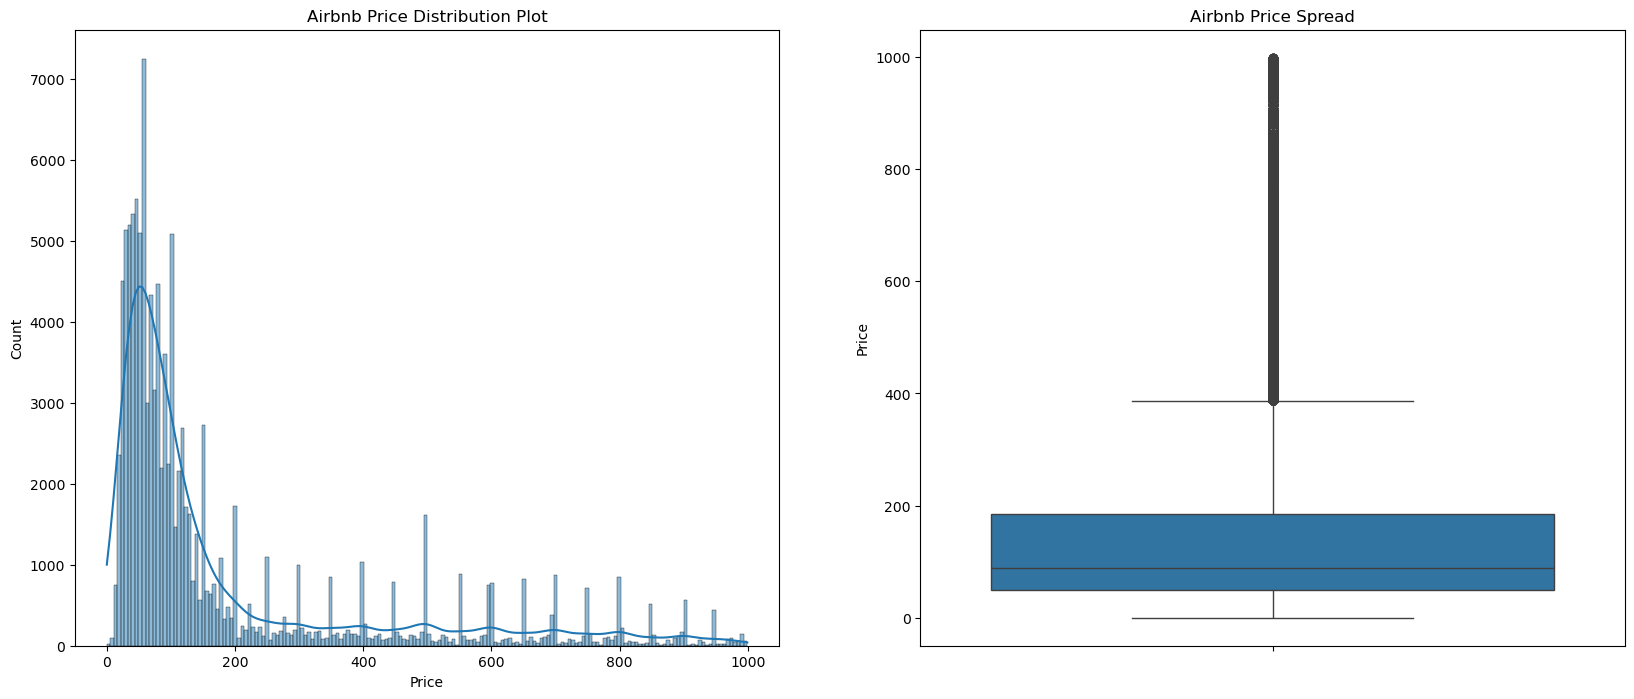

count    117458.000000
mean        180.688186
std         219.479311
min           0.000000
25%          50.000000
50%          89.000000
75%         185.000000
max         999.000000
Name: Price, dtype: float64


In [164]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Airbnb Price Distribution Plot')
sns.histplot(airbnb.Price, kde=True)

plt.subplot(1,2,2)
plt.title('Airbnb Price Spread')
sns.boxplot(y=airbnb.Price, showfliers=True)

plt.show()

print(airbnb.Price.describe())

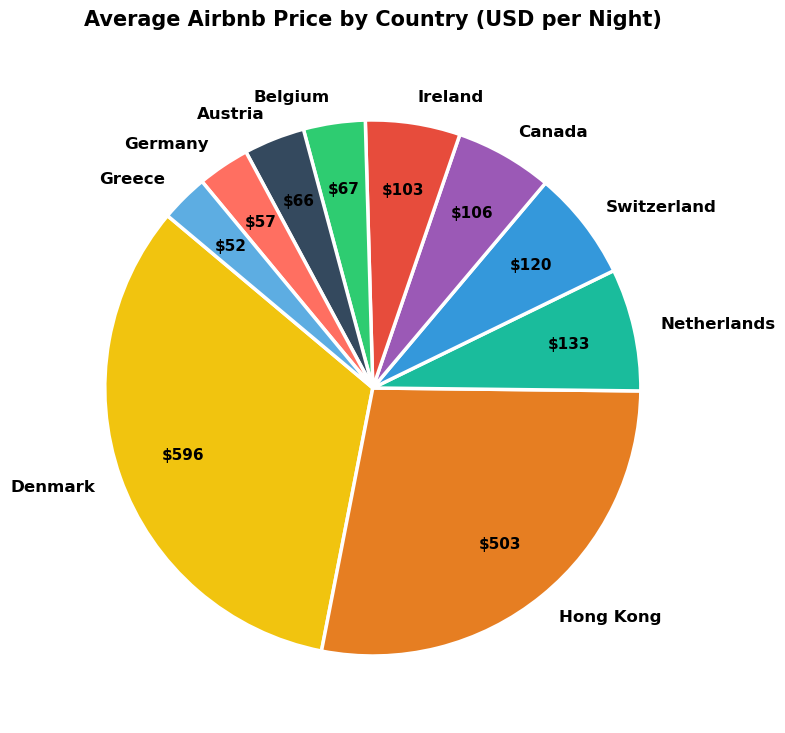

In [166]:
# --- Step 1: Group mean price by country (for selected 10) ---
target_countries = [
    "Netherlands", "Greece", "Germany", "Belgium", "Canada",
    "Austria", "Denmark", "Hong Kong", "Switzerland", "Ireland"
]
country_price = (
    airbnb[airbnb["Country"].isin(target_countries)]
    .groupby("Country")["Price"]
    .mean()
    .sort_values(ascending=False)
)

# --- Step 2: Define distinct color palette ---
colors = [
    "#F1C40F", "#E67E22", "#1ABC9C", "#3498DB", "#9B59B6",
    "#E74C3C", "#2ECC71", "#34495E", "#FF6F61", "#5DADE2"
]

# --- Step 3: Create pie chart ---
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    country_price,
    labels=country_price.index,
    colors=colors[:len(country_price)],
    autopct=lambda p: f"${(p/100)*country_price.sum():,.0f}",
    startangle=140,
    pctdistance=0.75,
    textprops={"fontsize": 12, "color": "black"},
    wedgeprops={"edgecolor": "white", "linewidth": 2.5}
)

# --- Step 4: Format labels and values ---
plt.setp(texts, fontweight="bold")
for i, t in enumerate(autotexts):
    t.set_color("black")
    t.set_fontsize(11)
    t.set_fontweight("bold")

# --- Step 5: Add title & layout ---
plt.title(
    "Average Airbnb Price by Country (USD per Night)",
    fontsize=15,
    weight="bold",
    pad=20
)
plt.tight_layout()
plt.show()

# Correlation

In [169]:
from scipy.stats import chi2_contingency

# ======================================================
# FUNCTION — CRAMÉR’S V (for categorical)
# ======================================================
def cramers_v(x, y):
    table = pd.crosstab(x, y)
    chi2 = chi2_contingency(table, correction=False)[0]
    n = table.sum().sum()
    r, k = table.shape
    return np.sqrt((chi2 / n) / (min(r - 1, k - 1)))

# ======================================================
# PREP — Bucket Price into 3 bins (needed for categorical correlation)
# ======================================================
airbnb["Price_Bin"] = pd.qcut(airbnb["Price"], q=3, labels=["Low", "Medium", "High"])


# ======================================================
#  FLOAT64 CORRELATION WITH PRICE
# ======================================================
float_cols = airbnb.select_dtypes(include=["float64"]).columns.tolist()

float_corr = (
    airbnb[float_cols].corrwith(airbnb["Price"])
    .sort_values(ascending=False)
    .reset_index()
)

float_corr.columns = ["Feature", "Correlation_with_Price"]
float_corr.index = float_corr.index + 1


# ======================================================
#  INT64 CORRELATION WITH PRICE
# ======================================================
int64_cols = airbnb.select_dtypes(include=["int64"]).columns.tolist()

# Remove Price if inside
if "Price" in int64_cols:
    int64_cols.remove("Price")

int64_corr = (
    airbnb[int64_cols].corrwith(airbnb["Price"])
    .sort_values(ascending=False)
    .reset_index()
)

int64_corr.columns = ["Feature", "Correlation_with_Price"]
int64_corr.index = int64_corr.index + 1


# ======================================================
#  INT32 CORRELATION WITH PRICE
# ======================================================
int32_cols = airbnb.select_dtypes(include=["int32"]).columns.tolist()

int32_corr = (
    airbnb[int32_cols].corrwith(airbnb["Price"])
    .sort_values(ascending=False)
    .reset_index()
)

int32_corr.columns = ["Feature", "Correlation_with_Price"]
int32_corr.index = int32_corr.index + 1


# ======================================================
#  OBJECT — Cramér’s V with Price_Bin
# ======================================================
obj_cols = airbnb.select_dtypes(include=["object"]).columns.tolist()
obj_cols = [col for col in obj_cols if airbnb[col].nunique() > 1]

cramer_list = []

for col in obj_cols:
    try:
        v = cramers_v(airbnb[col], airbnb["Price_Bin"])
        cramer_list.append([col, round(v, 4)])
    except:
        cramer_list.append([col, np.nan])

object_corr = (
    pd.DataFrame(cramer_list, columns=["Feature", "CramersV"])
    .sort_values(by="CramersV", ascending=False)
)

object_corr.index = object_corr.index + 1


# ======================================================
# PRINT RESULTS
# ======================================================
print("\n==============================")
print(" FLOAT64 → Price Correlation")
print("==============================")
print(float_corr)

print("\n==============================")
print(" INT64 → Price Correlation")
print("==============================")
print(int64_corr)

print("\n==============================")
print(" INT32 → Price Correlation")
print("==============================")
print(int32_corr)

print("\n============================================")
print(" OBJECT (Categorical) → Price Association (Cramér’s V)")
print("============================================")
print(object_corr)


 FLOAT64 → Price Correlation
                          Feature  Correlation_with_Price
1                           Price                1.000000
2               Price_Level_Index                1.000000
3                Security Deposit                0.943005
4                    Gross_Profit                0.833830
5       Net_Accommodation_Revenue                0.824056
6      Base_Accommodation_Revenue                0.824056
7           Cost_Efficiency_Ratio                0.823860
8            Total_Annual_Revenue                0.823426
9            Insurance_Cost_Index                0.756679
10                    ROI_Percent                0.756226
11                   Cleaning Fee                0.753185
12             Utility_Cost_Index                0.746522
13               Revenue_Per_SqFt                0.739851
14         Operational_Cost_Index                0.725453
15             Annual_Fixed_Costs                0.721709
16           Property_Value_Index         

In [171]:
list(airbnb['Is_Real_Bed'].unique())

[1, 0]

In [173]:
# ==========================================================
# DROP ALL NON–USEFUL COLUMNS FOR ML (FINAL CONSOLIDATED LIST)
# ==========================================================

columns_to_drop = [

    'Opportunity_Cost_Index', 'Capacity_Utilization_Score', 'Revenue_Loss_Potential', 'Property_Value_Index',
    'Size_Maintenance_Multiplier', 'Size_Utility_Multiplier', 'Cleaning_Cost_Index', 'Size_Revenue_Potential','Property_Value_Estimate',
    'Property_Type_Price_Index', 'Size_Price_Index', 'Capacity_Price_Index', 'Location_Country_Price_Index', 'Profit_Margin_Percent',
    'Cost_Efficiency_Ratio', "Host ID", "Price_Level_Index", "Base_Accommodation_Revenue", "Net_Accommodation_Revenue",
    "Gross_Profit", "ROI_Percent", "Revenue_Per_SqFt", "Cleaning_Fee_Revenue", "Total_Annual_Revenue", "Total_Annual_Costs",
    "Operational_Cost_Index", "Insurance_Cost_Index", "Property_Tax_Index", "Utility_Cost_Index", "Opportunity_Cost_Revenue_Loss", 
    "Total_Opportunity_Cost", "Maintenance_Cost_Index", "Annual_Fixed_Costs", "Annual_Variable_Costs", "Advanced_Investment_Score", 
    "Advanced_Investment_Tier", "Host Total Listings Count", "Calculated host listings count", "Host Name", "Amenity_Efficiency_Ratio",
    "Amenity_Demand_Score", "Amenity_Profit_Potential", "Amenity_Revenue_Potential", "Amenity_Revenue_Price_Index", 
    "Amenity_Price_Index", "Amenity_Operational_Cost", "Booking_Efficiency_Tier", "Square_Feet_Category", "Space_Efficiency_Score"
]

# --- SAFE DROP (no errors if col not found) ---
airbnb.drop(columns=[c for c in columns_to_drop if c in airbnb.columns],
            inplace=True, errors="ignore")

print("Dropped all requested columns successfully!")
print(f"Remaining columns: {len(airbnb.columns)}")
print(airbnb.columns.tolist())

Dropped all requested columns successfully!
Remaining columns: 63
['ID', 'Experiences Offered', 'Transit', 'Access', 'Interaction', 'Host About', 'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate', 'Host Listings Count', 'City', 'State', 'Zipcode', 'Country', 'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Is_Real_Bed', 'Square Feet', 'Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365', 'Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'License', 'Cancellation Policy', 'Reviews per Month', 'Host_Location_Match_Airbnb', 'House Rules Category', 'Host_Verification_Provided', 'Host_is_Superhost', 'Luxury_Premium', 'Essential_Com

In [175]:
# --- List all remaining columns with serial numbers ---
print(f"Total columns after cleaning: {len(airbnb.columns)}\n")

for i, col in enumerate(airbnb.columns, 1):
    print(f"{i}. {col}")

Total columns after cleaning: 63

1. ID
2. Experiences Offered
3. Transit
4. Access
5. Interaction
6. Host About
7. Host Response Time
8. Host Response Rate
9. Host Acceptance Rate
10. Host Listings Count
11. City
12. State
13. Zipcode
14. Country
15. Latitude
16. Longitude
17. Property Type
18. Room Type
19. Accommodates
20. Bathrooms
21. Bedrooms
22. Beds
23. Is_Real_Bed
24. Square Feet
25. Price
26. Security Deposit
27. Cleaning Fee
28. Guests Included
29. Extra People
30. Minimum Nights
31. Maximum Nights
32. Availability 30
33. Availability 60
34. Availability 90
35. Availability 365
36. Number of Reviews
37. Review Scores Rating
38. Review Scores Accuracy
39. Review Scores Cleanliness
40. Review Scores Checkin
41. Review Scores Communication
42. Review Scores Location
43. Review Scores Value
44. License
45. Cancellation Policy
46. Reviews per Month
47. Host_Location_Match_Airbnb
48. House Rules Category
49. Host_Verification_Provided
50. Host_is_Superhost
51. Luxury_Premium
52. E

In [177]:
null_columns=airbnb.columns[airbnb.isnull().any()]
airbnb[null_columns].isnull().sum()*100/len(airbnb)

Series([], dtype: float64)

In [179]:
airbnb.to_excel("airbnb_cleaned.xlsx", sheet_name='Cleaned', index=False)

# Feature Engineering

In [182]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import OneHotEncoder

In [184]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117458 entries, 0 to 123060
Data columns (total 63 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   ID                           117458 non-null  int64   
 1   Experiences Offered          117458 non-null  object  
 2   Transit                      117458 non-null  object  
 3   Access                       117458 non-null  object  
 4   Interaction                  117458 non-null  object  
 5   Host About                   117458 non-null  object  
 6   Host Response Time           117458 non-null  object  
 7   Host Response Rate           117458 non-null  float64 
 8   Host Acceptance Rate         117458 non-null  float64 
 9   Host Listings Count          117458 non-null  int32   
 10  City                         117458 non-null  object  
 11  State                        117458 non-null  object  
 12  Zipcode                      117458 non-null  obj

In [186]:
print(
    pd.DataFrame({
        "S.No": range(1, len(airbnb.columns) + 1),
        "Column": airbnb.columns,
        "Null_Count": airbnb.isnull().sum().values
    }).to_string(index=False)
)

 S.No                      Column  Null_Count
    1                          ID           0
    2         Experiences Offered           0
    3                     Transit           0
    4                      Access           0
    5                 Interaction           0
    6                  Host About           0
    7          Host Response Time           0
    8          Host Response Rate           0
    9        Host Acceptance Rate           0
   10         Host Listings Count           0
   11                        City           0
   12                       State           0
   13                     Zipcode           0
   14                     Country           0
   15                    Latitude           0
   16                   Longitude           0
   17               Property Type           0
   18                   Room Type           0
   19                Accommodates           0
   20                   Bathrooms           0
   21                    Bedrooms 

In [188]:
print("\n==============================")
print(" COLUMN TYPE CLASSIFICATION")
print("==============================\n")

df = airbnb  # your dataframe

# ============================================================
# NUMERIC COLUMNS (all number-like dtypes)
# ============================================================
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

# ---- Detect binary (subset of numeric) ----
binary_cols = []
for col in numeric_cols:
    vals = df[col].dropna().unique()
    if len(vals) > 0 and set(vals).issubset({0, 1}):
        binary_cols.append(col)

numeric_cols_clean = [col for col in numeric_cols if col not in binary_cols]

# ============================================================
# TEXT / CATEGORICAL COLUMNS (object + category)
# ============================================================
text_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# ============================================================
# PRINT RESULTS
# ============================================================

print("NUMERIC COLUMNS (excluding binary):")
for i, col in enumerate(numeric_cols_clean, 1):
    print(f"{i}. {col}")

print("\nBINARY COLUMNS (0/1 only):")
for i, col in enumerate(binary_cols, 1):
    print(f"{i}. {col}")

print("\nTEXT / CATEGORICAL COLUMNS:")
for i, col in enumerate(text_cols, 1):
    print(f"{i}. {col}")

print("\nSUMMARY:")
print(f" • Numeric columns: {len(numeric_cols_clean)}")
print(f" • Binary columns:  {len(binary_cols)}")
print(f" • Text columns:    {len(text_cols)}")
print(f" • Total covered:   {len(numeric_cols_clean) + len(binary_cols) + len(text_cols)}")
print(f" • Total columns:   {df.shape[1]}")


 COLUMN TYPE CLASSIFICATION

NUMERIC COLUMNS (excluding binary):
1. ID
2. Host Response Rate
3. Host Acceptance Rate
4. Host Listings Count
5. Latitude
6. Longitude
7. Accommodates
8. Bathrooms
9. Bedrooms
10. Beds
11. Square Feet
12. Price
13. Security Deposit
14. Cleaning Fee
15. Guests Included
16. Extra People
17. Minimum Nights
18. Maximum Nights
19. Availability 30
20. Availability 60
21. Availability 90
22. Availability 365
23. Number of Reviews
24. Review Scores Rating
25. Review Scores Accuracy
26. Review Scores Cleanliness
27. Review Scores Checkin
28. Review Scores Communication
29. Review Scores Location
30. Review Scores Value
31. Reviews per Month
32. Amenity_Score
33. First_Review_Age_Years
34. Last_Review_Age_Years
35. Host_Age_Years
36. Occupancy_Rate
37. Nights_Booked

BINARY COLUMNS (0/1 only):
1. Is_Real_Bed
2. License
3. Host_Location_Match_Airbnb
4. Host_Verification_Provided
5. Host_is_Superhost
6. Luxury_Premium
7. Essential_Comforts
8. Connectivity_Business
9.

#  one Hot Encoding

In [190]:
# ============================================================
# 1) TARGET ARRAY (Price)
# ============================================================
y = airbnb["Price"].values   # numpy target array
 
# ============================================================
# 2) SAVE ID + ZIPCODE COLUMNS SEPARATELY
# ============================================================
ID_col = airbnb["ID"].values
Zipcode_col = airbnb["Zipcode"].values
 
# Build Xdf by dropping columns NOT used in ML
Xdf = airbnb.drop(columns=["Price", "ID", "Zipcode"], errors="ignore")
 
# ============================================================
# 3) IDENTIFY COLUMN TYPES
# ============================================================
 
# --- Numeric columns (all number dtypes) ---
numeric_cols = Xdf.select_dtypes(include=["number"]).columns.tolist()
 
# --- Binary columns = numeric that are only {0,1} ---
binary_cols = [
    col for col in numeric_cols
    if set(Xdf[col].dropna().unique()).issubset({0, 1})
]
 
# --- Numeric NON-binary ---
numeric_cols_clean = [col for col in numeric_cols if col not in binary_cols]
 
# --- Text / Categorical columns ---
text_cols = Xdf.select_dtypes(include=["object", "category"]).columns.tolist()
 
print("\n==============================")
print(" COLUMN CLASSIFICATION")
print("==============================")
print("Numeric columns:", numeric_cols_clean)
print("Binary columns:", binary_cols)
print("Text columns for OHE:", text_cols)
 
# ============================================================
# 4) ONE-HOT ENCODE TEXT COLUMNS
# ============================================================
from sklearn.preprocessing import OneHotEncoder
 
ohe = OneHotEncoder(
    sparse_output=False,
    drop="first",
    handle_unknown="ignore"
)
 
ohe_array = ohe.fit_transform(Xdf[text_cols])
ohe_cols = ohe.get_feature_names_out(text_cols)
df_ohe = pd.DataFrame(ohe_array, columns=ohe_cols, index=Xdf.index)
 
# ============================================================
# 5) FINAL ML DATAFRAME (X_final_df)
# ============================================================
X_final_df = pd.concat([
    Xdf[numeric_cols_clean],   # numeric
    Xdf[binary_cols],          # binary
    df_ohe                     # OHE text
], axis=1)
 
# ============================================================
# 6) CONVERT TO NUMPY ARRAY
# ============================================================
X = X_final_df.values
 
print("\nX shape:", X.shape)
print("y shape:", y.shape)
 
# ============================================================
# 7) COLUMN INDEX MAPPING
# ============================================================
column_index_mapping = {col: idx for idx, col in enumerate(X_final_df.columns)}
 
print("\n==============================")
print(" COLUMN → INDEX MAPPING")
print("==============================")
for col, idx in column_index_mapping.items():
    print(f"{idx}: {col}")
 
# Numeric index list (all feature positions)
columns_ohe = list(column_index_mapping.values())
 
print("\nNumeric index list:")
print("columns_ohe =", columns_ohe)
 
# Example Row Check
example_row = 1
print("\nlist(X[1, columns_ohe]):")
print(list(X[example_row, columns_ohe]))


 COLUMN CLASSIFICATION
Numeric columns: ['Host Response Rate', 'Host Acceptance Rate', 'Host Listings Count', 'Latitude', 'Longitude', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Square Feet', 'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365', 'Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'Reviews per Month', 'Amenity_Score', 'First_Review_Age_Years', 'Last_Review_Age_Years', 'Host_Age_Years', 'Occupancy_Rate', 'Nights_Booked']
Binary columns: ['Is_Real_Bed', 'License', 'Host_Location_Match_Airbnb', 'Host_Verification_Provided', 'Host_is_Superhost', 'Luxury_Premium', 'Essential_Comforts', 'Connectivity_Business', 'Kitchen_Dining', 'Pet_Friendly_Outdoor']
Text columns for OHE: ['Experiences Of

# Train Validation

In [194]:
from sklearn.model_selection import train_test_split
 
# ============================================================

# TRAIN / VALIDATION SPLIT — 80/20

# ============================================================

X_train, X_valid, y_train, y_valid, ID_train, ID_valid, Zip_train, Zip_valid = train_test_split(

    X,

    y,

    ID_col,

    Zipcode_col,

    test_size=0.20,    # 20% validation

    random_state=42,   # repeatable results

    shuffle=True

)
 
print("Training X shape:", X_train.shape)

print("Validation X shape:", X_valid.shape)
 
print("Training y shape:", y_train.shape)

print("Validation y shape:", y_valid.shape)
 
print("\nID train/valid shapes:", ID_train.shape, ID_valid.shape)

print("Zip train/valid shapes:", Zip_train.shape, Zip_valid.shape)
 

Training X shape: (93966, 165)
Validation X shape: (23492, 165)
Training y shape: (93966,)
Validation y shape: (23492,)

ID train/valid shapes: (93966,) (23492,)
Zip train/valid shapes: (93966,) (23492,)


# Standard Scaling

In [196]:
# ============================================================
# STANDARD SCALING — COMBINED FULL VERSION
# ============================================================

from sklearn.preprocessing import StandardScaler

# Count how many numeric (non-binary) columns exist
num_count = len(numeric_cols_clean)

# Create scaler
scaler = StandardScaler()

# Fit ONLY on numeric columns of TRAIN set
scaler.fit(X_train[:, :num_count])

# Transform numeric columns for train + valid
X_train_scaled_num = scaler.transform(X_train[:, :num_count])
X_valid_scaled_num = scaler.transform(X_valid[:, :num_count])

# Keep binary + OHE columns as they are (do NOT scale them)
X_train_scaled = np.concatenate([
    X_train_scaled_num,      # scaled numeric
    X_train[:, num_count:]   # original binary + OHE
], axis=1)

X_valid_scaled = np.concatenate([
    X_valid_scaled_num,
    X_valid[:, num_count:]
], axis=1)

print("Scaled X_train shape:", X_train_scaled.shape)
print("Scaled X_valid shape:", X_valid_scaled.shape)

Scaled X_train shape: (93966, 165)
Scaled X_valid shape: (23492, 165)


# Principal Component Analysis (PCA)

Train PCA shape: (93966, 38)
Valid PCA shape: (23492, 38)

 PCA (95% Variance) — FULL METRICS
Number of PCA components: 38
Train R²: 0.9255
Valid R²: 0.9256
Train Adjusted R²: 0.9255
Valid Adjusted R²: 0.9255
Train MSE: 3585.7687
Valid MSE: 3587.4492
Train RMSE: 59.8813
Valid RMSE: 59.8953


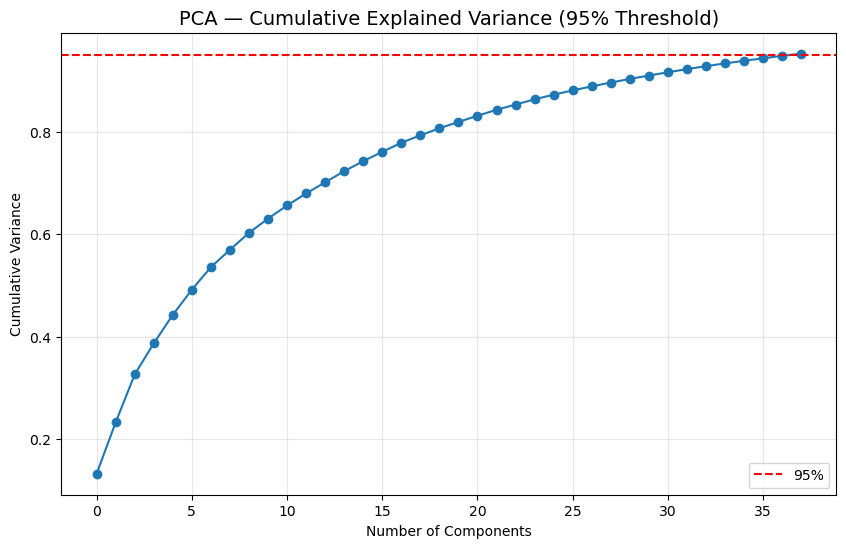

In [198]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# 1) PCA — KEEP 95% VARIANCE (FAST + ACCURATE)
# ============================================================
pca = PCA(n_components=0.95)
pca.fit(X_train_scaled)

X_train_pca = pca.transform(X_train_scaled)
X_valid_pca = pca.transform(X_valid_scaled)

print("Train PCA shape:", X_train_pca.shape)
print("Valid PCA shape:", X_valid_pca.shape)

# Number of PCA features
k = X_train_pca.shape[1]
n_train = X_train_pca.shape[0]
n_valid = X_valid_pca.shape[0]

# ============================================================
# 2) FIT LINEAR MODEL ON PCA (95% variance)
# ============================================================
model = LinearRegression()
model.fit(X_train_pca, y_train)

# Predictions
train_pred = model.predict(X_train_pca)
valid_pred = model.predict(X_valid_pca)

# ============================================================
# 3) METRICS
# ============================================================

# R²
r2_train = r2_score(y_train, train_pred)
r2_valid = r2_score(y_valid, valid_pred)

# MSE
mse_train = mean_squared_error(y_train, train_pred)
mse_valid = mean_squared_error(y_valid, valid_pred)

# RMSE
rmse_train = np.sqrt(mse_train)
rmse_valid = np.sqrt(mse_valid)

# Adjusted R²
adj_r2_train = 1 - (1 - r2_train) * ((n_train - 1) / (n_train - k - 1))
adj_r2_valid = 1 - (1 - r2_valid) * ((n_valid - 1) / (n_valid - k - 1))

# ============================================================
# 4) PRINT RESULTS
# ============================================================
print("\n==============================")
print(" PCA (95% Variance) — FULL METRICS")
print("==============================")
print(f"Number of PCA components: {k}")
print(f"Train R²: {r2_train:.4f}")
print(f"Valid R²: {r2_valid:.4f}")
print(f"Train Adjusted R²: {adj_r2_train:.4f}")
print(f"Valid Adjusted R²: {adj_r2_valid:.4f}")
print(f"Train MSE: {mse_train:.4f}")
print(f"Valid MSE: {mse_valid:.4f}")
print(f"Train RMSE: {rmse_train:.4f}")
print(f"Valid RMSE: {rmse_valid:.4f}")

# ============================================================
# 5) OPTIONAL — EXPLAINED VARIANCE PLOT
# ============================================================
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title("PCA — Cumulative Explained Variance (95% Threshold)", fontsize=14)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance")
plt.grid(alpha=0.3)
plt.axhline(y=0.95, color='r', linestyle='--', label="95%")
plt.legend()
plt.show()

# Linear Regression with PCA

Train PCA shape: (93966, 38)
Valid PCA shape: (23492, 38)

 LINEAR REGRESSION — WITH PCA (95% Variance)
Number of PCA components: 38
Train R²: 0.9255
Valid R²: 0.9256
Train Adjusted R²: 0.9255
Valid Adjusted R²: 0.9255
Train MSE: 3585.7687
Valid MSE: 3587.4492
Train RMSE: 59.8813
Valid RMSE: 59.8953


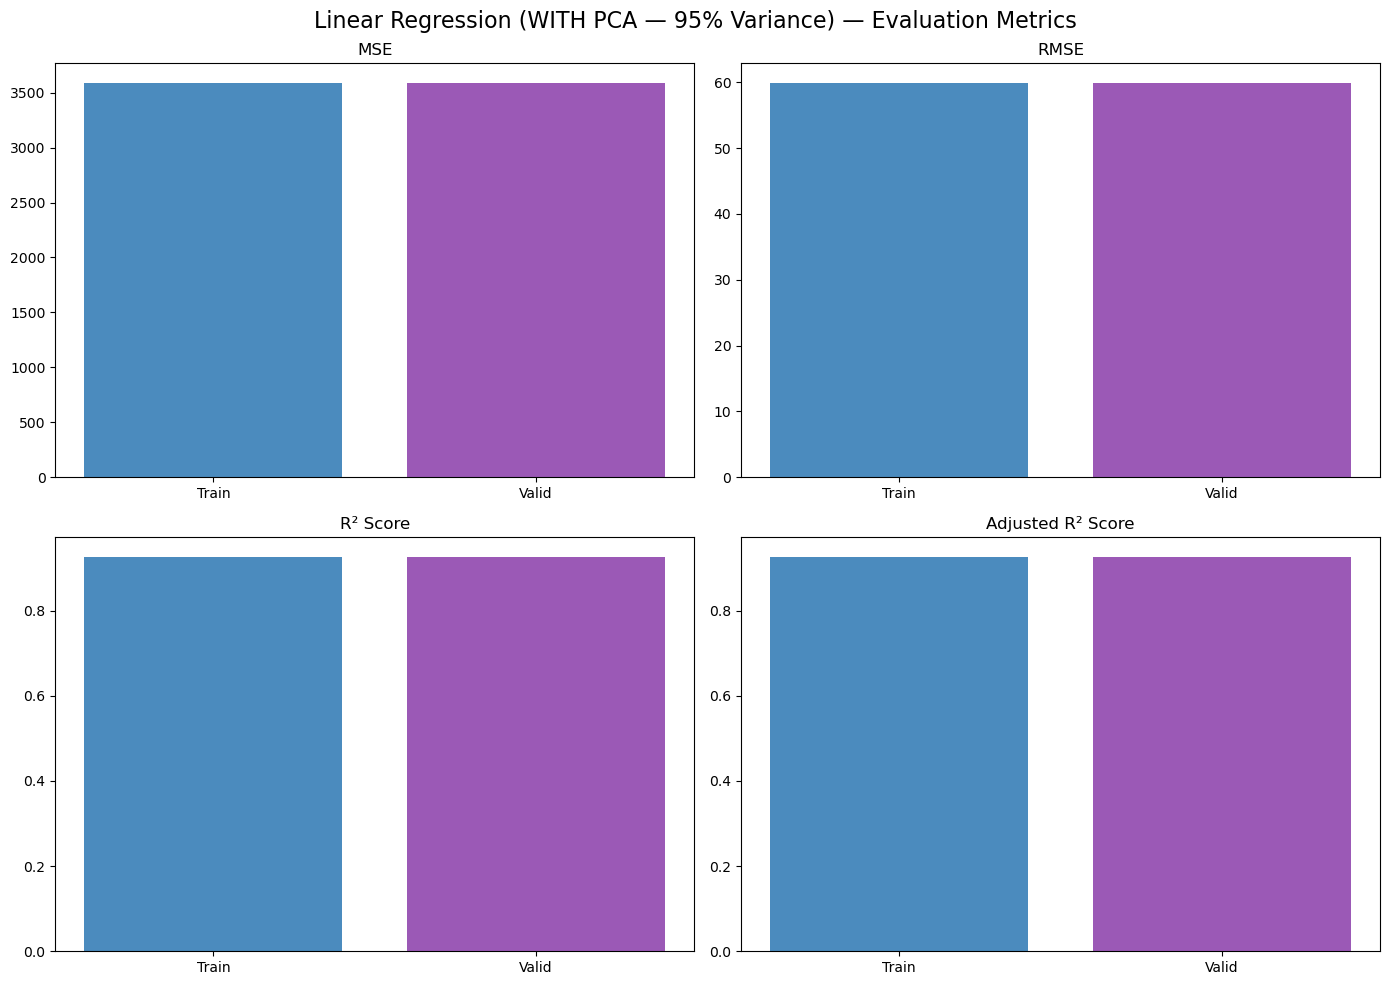

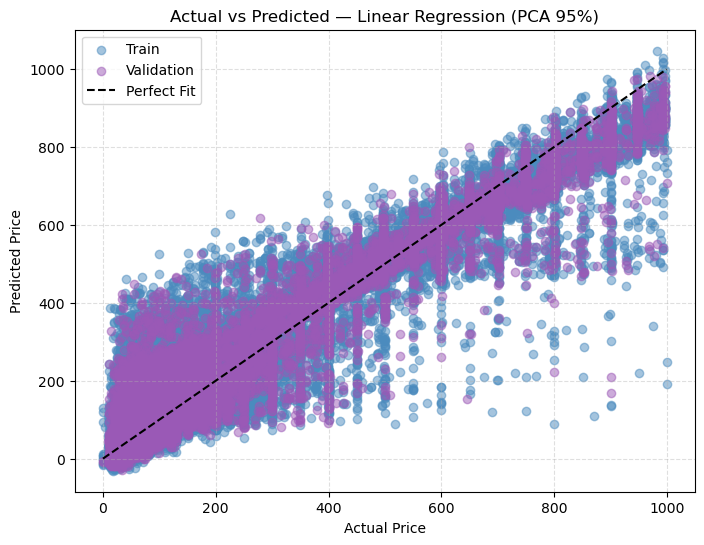

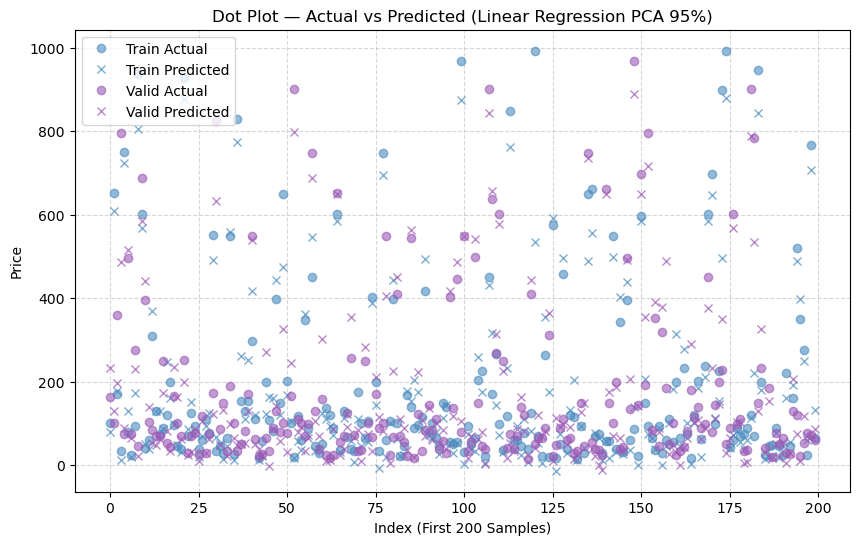

In [200]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# 1) PCA — KEEP 95% VARIANCE (FAST + ACCURATE)
# ============================================================
pca = PCA(n_components=0.95)
pca.fit(X_train_scaled)

X_train_pca = pca.transform(X_train_scaled)
X_valid_pca = pca.transform(X_valid_scaled)

print("Train PCA shape:", X_train_pca.shape)
print("Valid PCA shape:", X_valid_pca.shape)

# Number of PCA components
k = X_train_pca.shape[1]
n_train = X_train_pca.shape[0]
n_valid = X_valid_pca.shape[0]

# ============================================================
# 2) FIT LINEAR REGRESSION ON PCA FEATURES
# ============================================================
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)

train_pred = model_pca.predict(X_train_pca)
valid_pred = model_pca.predict(X_valid_pca)

# ============================================================
# 3) METRICS
# ============================================================

# R²
r2_train = r2_score(y_train, train_pred)
r2_valid = r2_score(y_valid, valid_pred)

# MSE
mse_train = mean_squared_error(y_train, train_pred)
mse_valid = mean_squared_error(y_valid, valid_pred)

# RMSE
rmse_train = np.sqrt(mse_train)
rmse_valid = np.sqrt(mse_valid)

# Adjusted R²
adj_r2_train = 1 - (1 - r2_train) * ((n_train - 1) / (n_train - k - 1))
adj_r2_valid = 1 - (1 - r2_valid) * ((n_valid - 1) / (n_valid - k - 1))

# ============================================================
# 4) DISPLAY RESULTS
# ============================================================
print("\n==============================")
print(" LINEAR REGRESSION — WITH PCA (95% Variance)")
print("==============================")
print(f"Number of PCA components: {k}")
print(f"Train R²: {r2_train:.4f}")
print(f"Valid R²: {r2_valid:.4f}")
print(f"Train Adjusted R²: {adj_r2_train:.4f}")
print(f"Valid Adjusted R²: {adj_r2_valid:.4f}")
print(f"Train MSE: {mse_train:.4f}")
print(f"Valid MSE: {mse_valid:.4f}")
print(f"Train RMSE: {rmse_train:.4f}")
print(f"Valid RMSE: {rmse_valid:.4f}")

# ============================================================
# 5) COLOR THEME FOR PCA LINEAR REGRESSION
# ============================================================
colors = {
    "train": "#4B8BBE",   # Python Blue
    "valid": "#9B59B6"    # Soft Purple
}

# ============================================================
# 6) BAR CHART — ALL FOUR METRICS
# ============================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Linear Regression (WITH PCA — 95% Variance) — Evaluation Metrics", fontsize=16)

# ---- MSE ----
axes[0, 0].bar(["Train", "Valid"], [mse_train, mse_valid],
               color=[colors["train"], colors["valid"]])
axes[0, 0].set_title("MSE")

# ---- RMSE ----
axes[0, 1].bar(["Train", "Valid"], [rmse_train, rmse_valid],
               color=[colors["train"], colors["valid"]])
axes[0, 1].set_title("RMSE")

# ---- R² ----
axes[1, 0].bar(["Train", "Valid"], [r2_train, r2_valid],
               color=[colors["train"], colors["valid"]])
axes[1, 0].set_title("R² Score")

# ---- Adjusted R² ----
axes[1, 1].bar(["Train", "Valid"], [adj_r2_train, adj_r2_valid],
               color=[colors["train"], colors["valid"]])
axes[1, 1].set_title("Adjusted R² Score")

plt.tight_layout()
plt.show()


# ============================================================
# 7) SCATTER PLOT — ACTUAL vs PREDICTED
# ============================================================

plt.figure(figsize=(8, 6))

plt.scatter(y_train, train_pred, alpha=0.5, color=colors["train"], label="Train")
plt.scatter(y_valid, valid_pred, alpha=0.5, color=colors["valid"], label="Validation")

plt.plot([y_train.min(), y_valid.max()],
         [y_train.min(), y_valid.max()],
         "k--", label="Perfect Fit")

plt.title("Actual vs Predicted — Linear Regression (PCA 95%)")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)

plt.show()


# ============================================================
# 8) DOT PLOT — FIRST 200 SAMPLES (FIXED FOR NUMPY ARRAYS)
# ============================================================

plt.figure(figsize=(10, 6))

plt.plot(y_train[:200], "o", alpha=0.6, color=colors["train"], label="Train Actual")
plt.plot(train_pred[:200], "x", alpha=0.7, color=colors["train"], label="Train Predicted")

plt.plot(y_valid[:200], "o", alpha=0.6, color=colors["valid"], label="Valid Actual")
plt.plot(valid_pred[:200], "x", alpha=0.7, color=colors["valid"], label="Valid Predicted")

plt.title("Dot Plot — Actual vs Predicted (Linear Regression PCA 95%)")
plt.xlabel("Index (First 200 Samples)")
plt.ylabel("Price")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

# Linear Regression without PCA


 LINEAR REGRESSION — FULL SUMMARY (NO PCA)
Training MSE: 3394.8963
Validation MSE: 3398.2423
Training RMSE: 58.2657
Validation RMSE: 58.2944
Training R²: 0.9295
Validation R²: 0.9295
Training Adjusted R²: 0.9294
Validation Adjusted R²: 0.9290


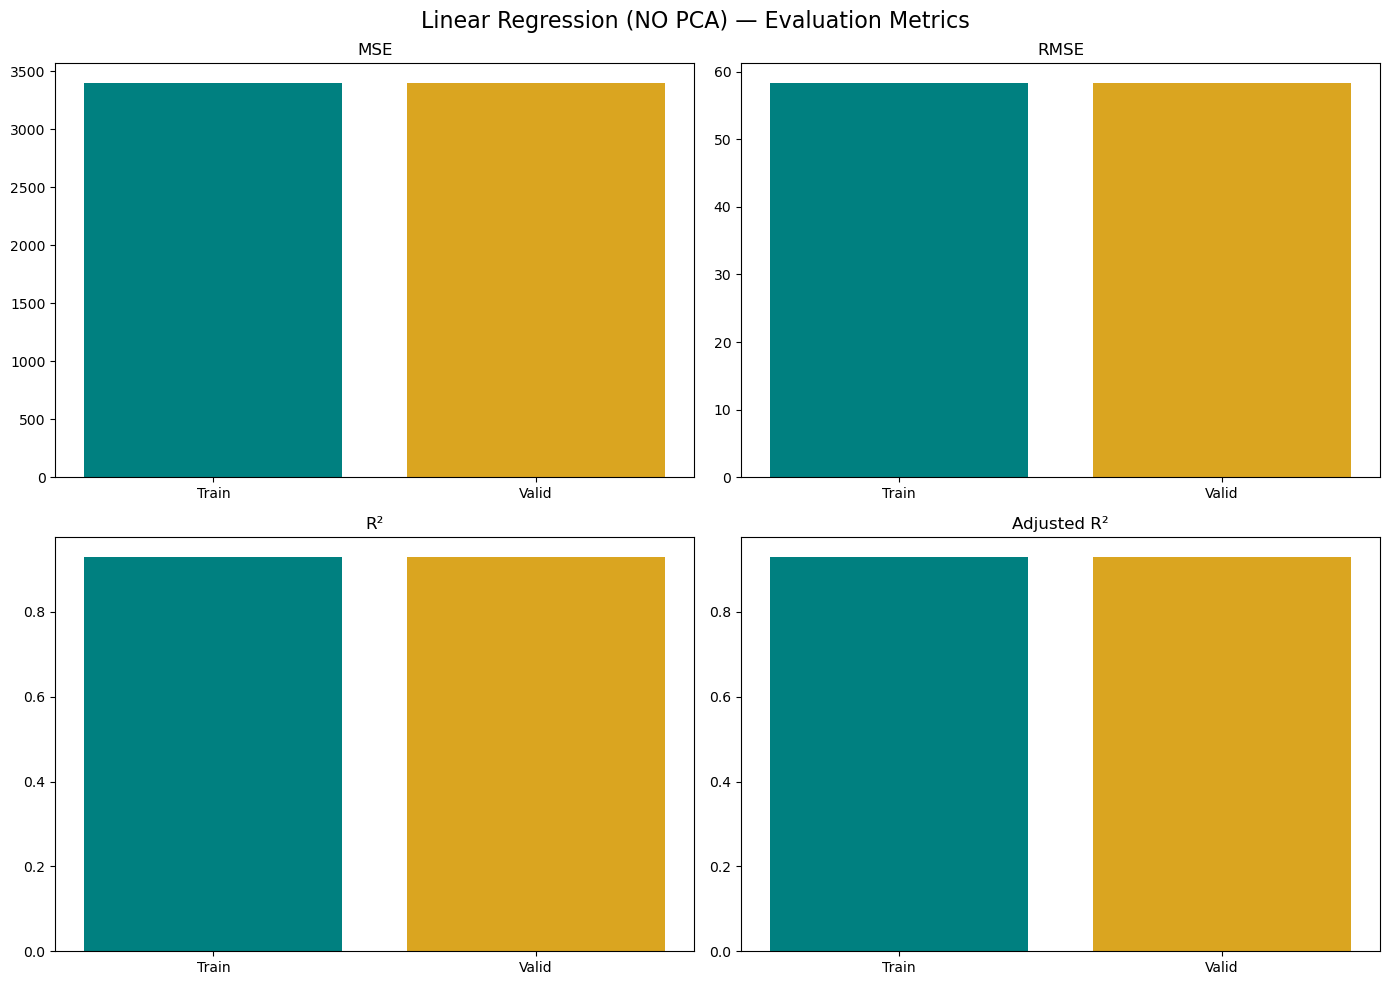

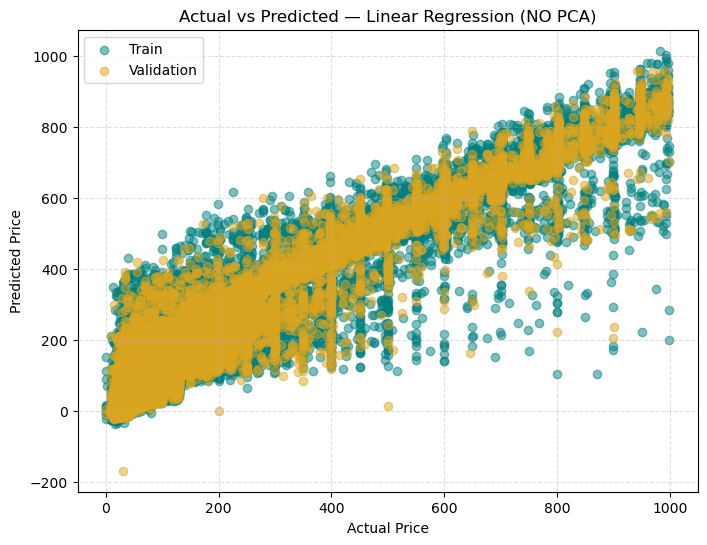

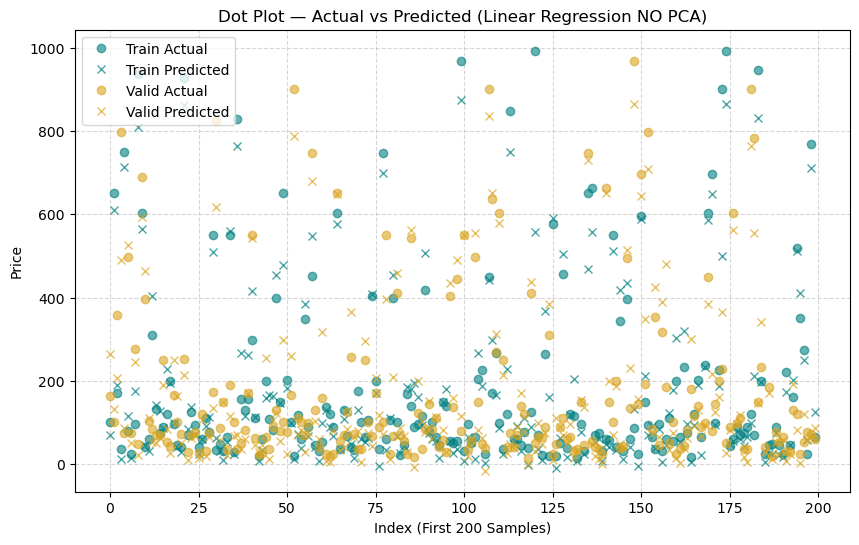

In [202]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# SAFETY CHECK
assert X_train_scaled.shape[1] == X_valid_scaled.shape[1]

# ============================================================
# LINEAR REGRESSION WITHOUT PCA
# ============================================================

model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
train_pred = model.predict(X_train_scaled)
valid_pred = model.predict(X_valid_scaled)

# ============================================================
# METRICS
# ============================================================

mse_train = mean_squared_error(y_train, train_pred)
mse_valid = mean_squared_error(y_valid, valid_pred)

rmse_train = np.sqrt(mse_train)
rmse_valid = np.sqrt(mse_valid)

r2_train = r2_score(y_train, train_pred)
r2_valid = r2_score(y_valid, valid_pred)

def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

n_train = X_train_scaled.shape[0]
n_valid = X_valid_scaled.shape[0]
p_train = X_train_scaled.shape[1]

adj_r2_train = adjusted_r2(r2_train, n_train, p_train)
adj_r2_valid = adjusted_r2(r2_valid, n_valid, p_train)

# ============================================================
# PRINT SUMMARY
# ============================================================

print("\n==============================")
print(" LINEAR REGRESSION — FULL SUMMARY (NO PCA)")
print("==============================")
print(f"Training MSE: {mse_train:.4f}")
print(f"Validation MSE: {mse_valid:.4f}")
print(f"Training RMSE: {rmse_train:.4f}")
print(f"Validation RMSE: {rmse_valid:.4f}")
print(f"Training R²: {r2_train:.4f}")
print(f"Validation R²: {r2_valid:.4f}")
print(f"Training Adjusted R²: {adj_r2_train:.4f}")
print(f"Validation Adjusted R²: {adj_r2_valid:.4f}")

# ============================================================
# 1) 4-METRIC BAR CHART
# ============================================================

colors = {
    "train": "#008080",    # Teal
    "valid": "#DAA520"     # Goldenrod
}

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Linear Regression (NO PCA) — Evaluation Metrics", fontsize=16)

# --- MSE ---
axes[0, 0].bar(["Train", "Valid"], [mse_train, mse_valid],
               color=[colors["train"], colors["valid"]])
axes[0, 0].set_title("MSE")

# --- RMSE ---
axes[0, 1].bar(["Train", "Valid"], [rmse_train, rmse_valid],
               color=[colors["train"], colors["valid"]])
axes[0, 1].set_title("RMSE")

# --- R² ---
axes[1, 0].bar(["Train", "Valid"], [r2_train, r2_valid],
               color=[colors["train"], colors["valid"]])
axes[1, 0].set_title("R²")

# --- Adjusted R² ---
axes[1, 1].bar(["Train", "Valid"], [adj_r2_train, adj_r2_valid],
               color=[colors["train"], colors["valid"]])
axes[1, 1].set_title("Adjusted R²")

plt.tight_layout()
plt.show()

# ============================================================
# 2) SCATTER CHART (Actual vs Predicted)
# ============================================================

plt.figure(figsize=(8, 6))

plt.scatter(y_train, train_pred,
            color=colors["train"], alpha=0.5, label="Train")

plt.scatter(y_valid, valid_pred,
            color=colors["valid"], alpha=0.5, label="Validation")

plt.title("Actual vs Predicted — Linear Regression (NO PCA)")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)

plt.show()

# ============================================================
# 3) DOT PLOT — First 200 Samples
# ============================================================

plt.figure(figsize=(10, 6))

plt.plot(y_train[:200], "o", alpha=0.6, color=colors["train"], label="Train Actual")
plt.plot(train_pred[:200], "x", alpha=0.7, color=colors["train"], label="Train Predicted")

plt.plot(y_valid[:200], "o", alpha=0.6, color=colors["valid"], label="Valid Actual")
plt.plot(valid_pred[:200], "x", alpha=0.7, color=colors["valid"], label="Valid Predicted")

plt.title("Dot Plot — Actual vs Predicted (Linear Regression NO PCA)")
plt.xlabel("Index (First 200 Samples)")
plt.ylabel("Price")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

# Lasso Regression With PCA

Best Alpha: 0.07847599703514611

 LASSO REGRESSION — WITH PCA
Train MSE: 3586.2901
Valid MSE: 3587.6568
Train RMSE: 59.8856
Valid RMSE: 59.8971
Train R²: 0.9255
Valid R²: 0.9256
Train Adjusted R²: 0.9255
Valid Adjusted R²: 0.9254


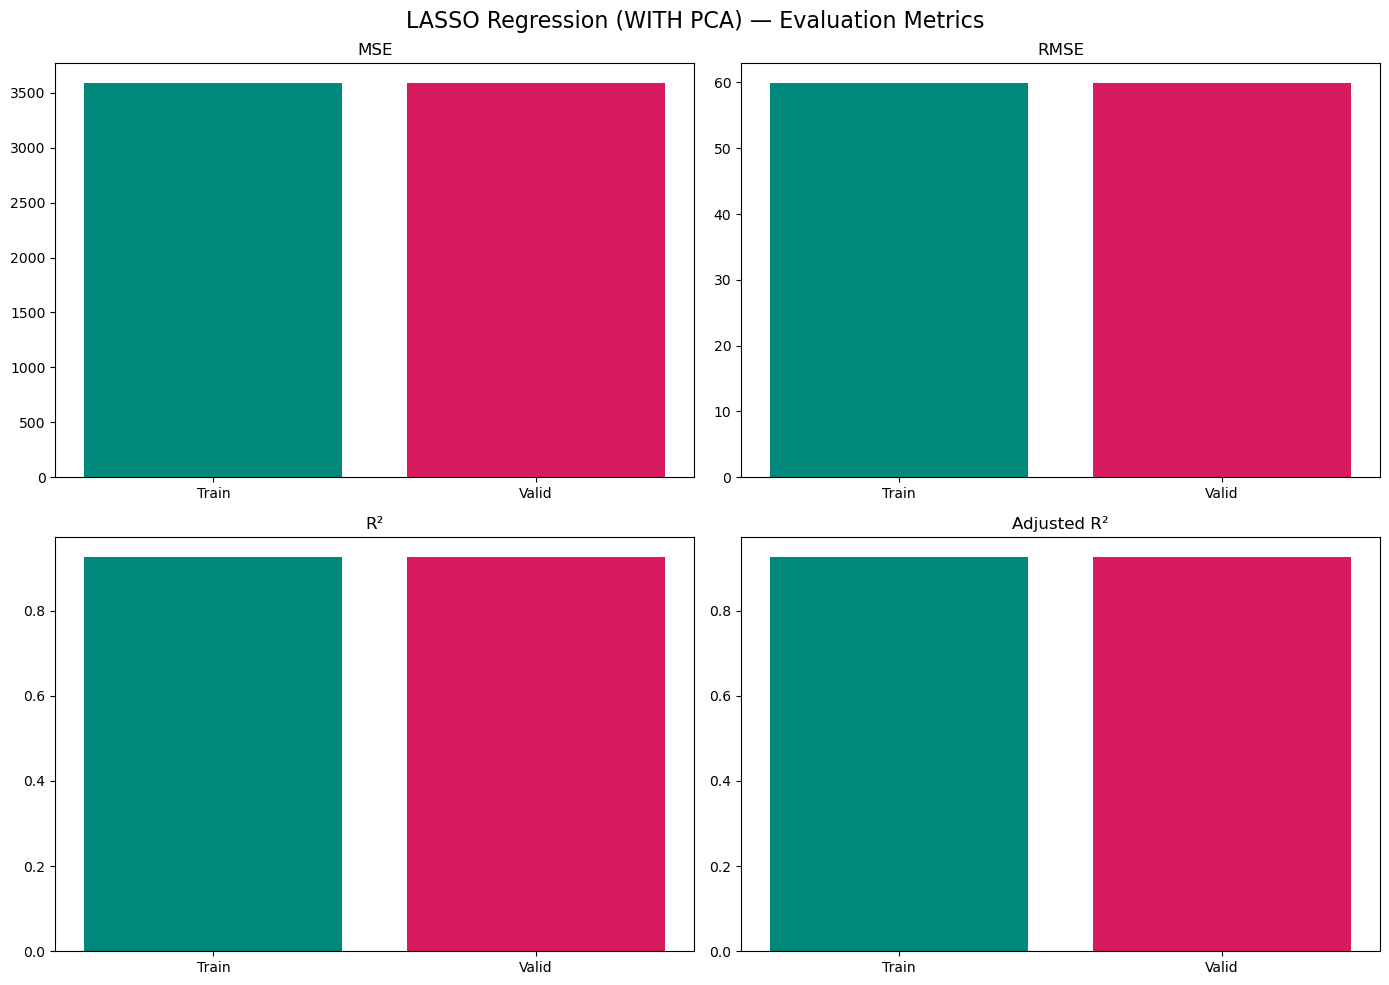

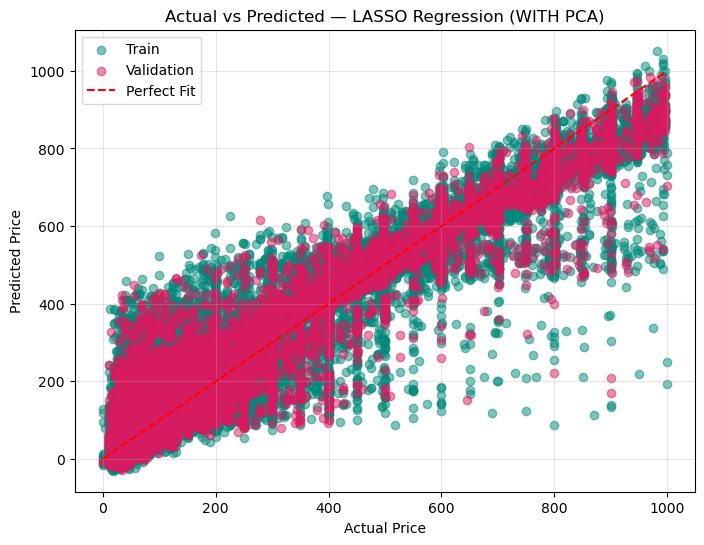

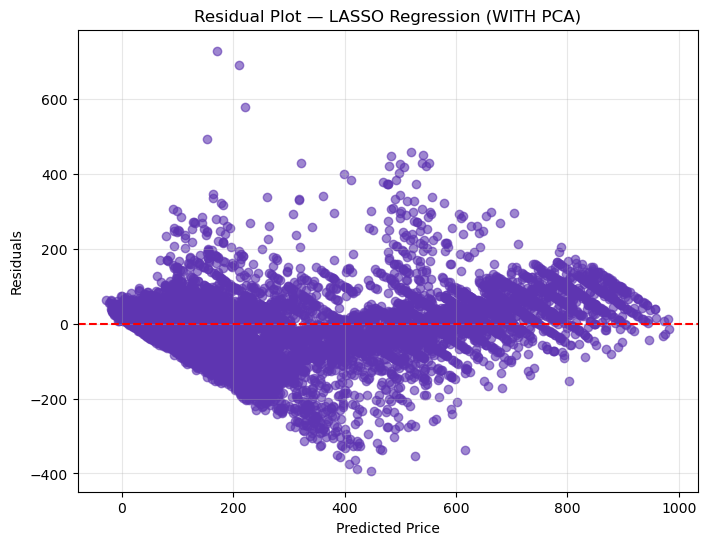

In [204]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# 1) RANDOMIZED SEARCH FOR BEST ALPHA (WITH PCA)
# ============================================================

lasso = Lasso(max_iter=5000)

alpha_grid = np.logspace(-3, 3, 20)

params = {"alpha": alpha_grid}

lasso_rs = RandomizedSearchCV(
    estimator=lasso,
    param_distributions=params,
    n_iter=10,
    cv=2,
    random_state=0,
    n_jobs=-1
)

lasso_rs.fit(X_train_pca, y_train)

best_alpha = lasso_rs.best_params_["alpha"]
print("Best Alpha:", best_alpha)

# Predictions
train_pred = lasso_rs.predict(X_train_pca)
valid_pred = lasso_rs.predict(X_valid_pca)

# ============================================================
# 2) METRICS
# ============================================================

# MSE
mse_train = mean_squared_error(y_train, train_pred)
mse_valid = mean_squared_error(y_valid, valid_pred)

# RMSE
rmse_train = np.sqrt(mse_train)
rmse_valid = np.sqrt(mse_valid)

# R²
r2_train = r2_score(y_train, train_pred)
r2_valid = r2_score(y_valid, valid_pred)

# Adjusted R²
n_train, p = X_train_pca.shape
n_valid = X_valid_pca.shape[0]

adj_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p - 1)
adj_r2_valid = 1 - (1 - r2_valid) * (n_valid - 1) / (n_valid - p - 1)

# ============================================================
# 3) PRINT SUMMARY
# ============================================================

print("\n==============================")
print(" LASSO REGRESSION — WITH PCA")
print("==============================")
print(f"Train MSE: {mse_train:.4f}")
print(f"Valid MSE: {mse_valid:.4f}")
print(f"Train RMSE: {rmse_train:.4f}")
print(f"Valid RMSE: {rmse_valid:.4f}")
print(f"Train R²: {r2_train:.4f}")
print(f"Valid R²: {r2_valid:.4f}")
print(f"Train Adjusted R²: {adj_r2_train:.4f}")
print(f"Valid Adjusted R²: {adj_r2_valid:.4f}")

# ============================================================
# 4) 4-METRIC COMBINED PLOT 
# ============================================================

colors = {
    "train": "#00897B",   # Teal
    "valid": "#D81B60"    # Pink
}

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("LASSO Regression (WITH PCA) — Evaluation Metrics", fontsize=16)

# MSE
axes[0, 0].bar(["Train", "Valid"], [mse_train, mse_valid],
               color=[colors["train"], colors["valid"]])
axes[0, 0].set_title("MSE")

# RMSE
axes[0, 1].bar(["Train", "Valid"], [rmse_train, rmse_valid],
               color=[colors["train"], colors["valid"]])
axes[0, 1].set_title("RMSE")

# R²
axes[1, 0].bar(["Train", "Valid"], [r2_train, r2_valid],
               color=[colors["train"], colors["valid"]])
axes[1, 0].set_title("R²")

# Adjusted R²
axes[1, 1].bar(["Train", "Valid"], [adj_r2_train, adj_r2_valid],
               color=[colors["train"], colors["valid"]])
axes[1, 1].set_title("Adjusted R²")

plt.tight_layout()
plt.show()

# ============================================================
# 5) ACTUAL VS PREDICTED 
# ============================================================

plt.figure(figsize=(8,6))
plt.scatter(y_train, train_pred, color="#00897B", alpha=0.5, label="Train")
plt.scatter(y_valid, valid_pred, color="#D81B60", alpha=0.5, label="Validation")

mn = min(y_train.min(), y_valid.min())
mx = max(y_train.max(), y_valid.max())
plt.plot([mn, mx], [mn, mx], "r--", label="Perfect Fit")

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted — LASSO Regression (WITH PCA)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ============================================================
# 6) RESIDUAL PLOT
# ============================================================

residuals = y_valid - valid_pred

plt.figure(figsize=(8,6))
plt.scatter(valid_pred, residuals, color="#5E35B1", alpha=0.6)  # Deep Purple
plt.axhline(0, color="red", linestyle="--")

plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot — LASSO Regression (WITH PCA)")
plt.grid(alpha=0.3)
plt.show()

# Lasso Regression without PCA

Best Alpha: 0.3359818286283781

 LASSO REGRESSION — NO PCA
Train MSE: 3441.4027
Valid MSE: 3430.4509
Train RMSE: 58.6635
Valid RMSE: 58.5701
Train R²: 0.9285
Valid R²: 0.9288
Train Adjusted R²: 0.9284
Valid Adjusted R²: 0.9283


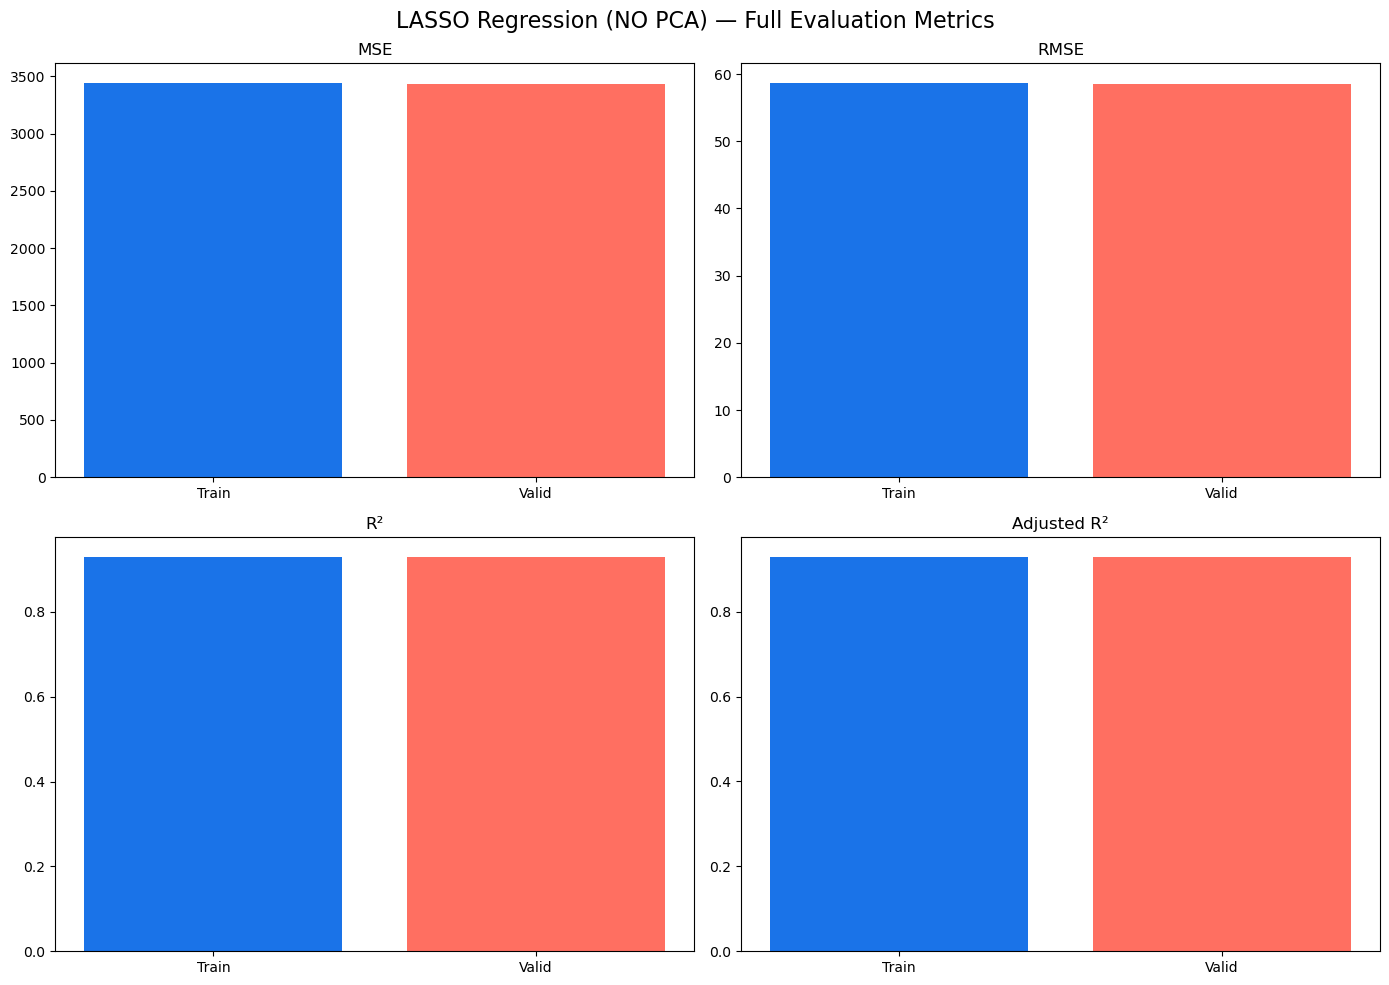

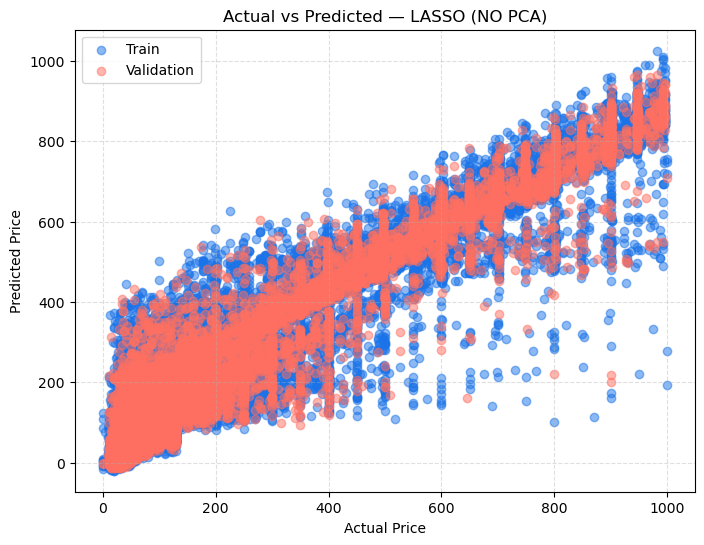

In [206]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# 1) RANDOMIZED SEARCH FOR BEST ALPHA (NO PCA)
# ============================================================

lasso = Lasso(max_iter=5000)

alpha_grid = np.logspace(-3, 3, 20)  # same scale as professor

params = {"alpha": alpha_grid}

lasso_rs = RandomizedSearchCV(
    estimator=lasso,
    param_distributions=params,
    n_iter=10,
    cv=2,
    random_state=0,
    n_jobs=-1
)

lasso_rs.fit(X_train_scaled, y_train)

print("Best Alpha:", lasso_rs.best_params_["alpha"])

# ============================================================
# 2) PREDICTIONS
# ============================================================
train_pred = lasso_rs.predict(X_train_scaled)
valid_pred = lasso_rs.predict(X_valid_scaled)

# ============================================================
# 3) METRICS
# ============================================================

# ---- MSE ----
mse_train = mean_squared_error(y_train, train_pred)
mse_valid = mean_squared_error(y_valid, valid_pred)

# ---- RMSE ----
rmse_train = np.sqrt(mse_train)
rmse_valid = np.sqrt(mse_valid)

# ---- R² ----
r2_train = r2_score(y_train, train_pred)
r2_valid = r2_score(y_valid, valid_pred)

# ---- Adjusted R² ----
n_train, p = X_train_scaled.shape
n_valid = X_valid_scaled.shape[0]

adj_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p - 1)
adj_r2_valid = 1 - (1 - r2_valid) * (n_valid - 1) / (n_valid - p - 1)

# ============================================================
# 4) PRINT METRICS
# ============================================================

print("\n==============================")
print(" LASSO REGRESSION — NO PCA")
print("==============================")
print(f"Train MSE: {mse_train:.4f}")
print(f"Valid MSE: {mse_valid:.4f}")
print(f"Train RMSE: {rmse_train:.4f}")
print(f"Valid RMSE: {rmse_valid:.4f}")
print(f"Train R²: {r2_train:.4f}")
print(f"Valid R²: {r2_valid:.4f}")
print(f"Train Adjusted R²: {adj_r2_train:.4f}")
print(f"Valid Adjusted R²: {adj_r2_valid:.4f}")

# ============================================================
# 5) 4-METRIC COMBINED PLOT
# ============================================================

colors = {
    "train": "#1A73E8",     # Google Blue
    "valid": "#FF6F61"      # Coral
}

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("LASSO Regression (NO PCA) — Full Evaluation Metrics", fontsize=16)

# ---- MSE ----
axes[0, 0].bar(["Train", "Valid"], [mse_train, mse_valid],
               color=[colors["train"], colors["valid"]])
axes[0, 0].set_title("MSE")

# ---- RMSE ----
axes[0, 1].bar(["Train", "Valid"], [rmse_train, rmse_valid],
               color=[colors["train"], colors["valid"]])
axes[0, 1].set_title("RMSE")

# ---- R² ----
axes[1, 0].bar(["Train", "Valid"], [r2_train, r2_valid],
               color=[colors["train"], colors["valid"]])
axes[1, 0].set_title("R²")

# ---- Adjusted R² ----
axes[1, 1].bar(["Train", "Valid"], [adj_r2_train, adj_r2_valid],
               color=[colors["train"], colors["valid"]])
axes[1, 1].set_title("Adjusted R²")

plt.tight_layout()
plt.show()

# ============================================================
# 6) ACTUAL VS PREDICTED — DOT CHART
# ============================================================
plt.figure(figsize=(8, 6))

plt.scatter(y_train, train_pred,
            color=colors["train"], alpha=0.5, label="Train")
plt.scatter(y_valid, valid_pred,
            color=colors["valid"], alpha=0.5, label="Validation")

plt.title("Actual vs Predicted — LASSO (NO PCA)")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)

plt.show()

# Ridge Regression with PCA

Best Alpha: 621.0169418915616

 RIDGE REGRESSION — WITH PCA
Train MSE: 3587.6039
Valid MSE: 3589.9953
Train RMSE: 59.8966
Valid RMSE: 59.9166
Train R²: 0.9255
Valid R²: 0.9255
Train Adjusted R²: 0.9255
Valid Adjusted R²: 0.9254


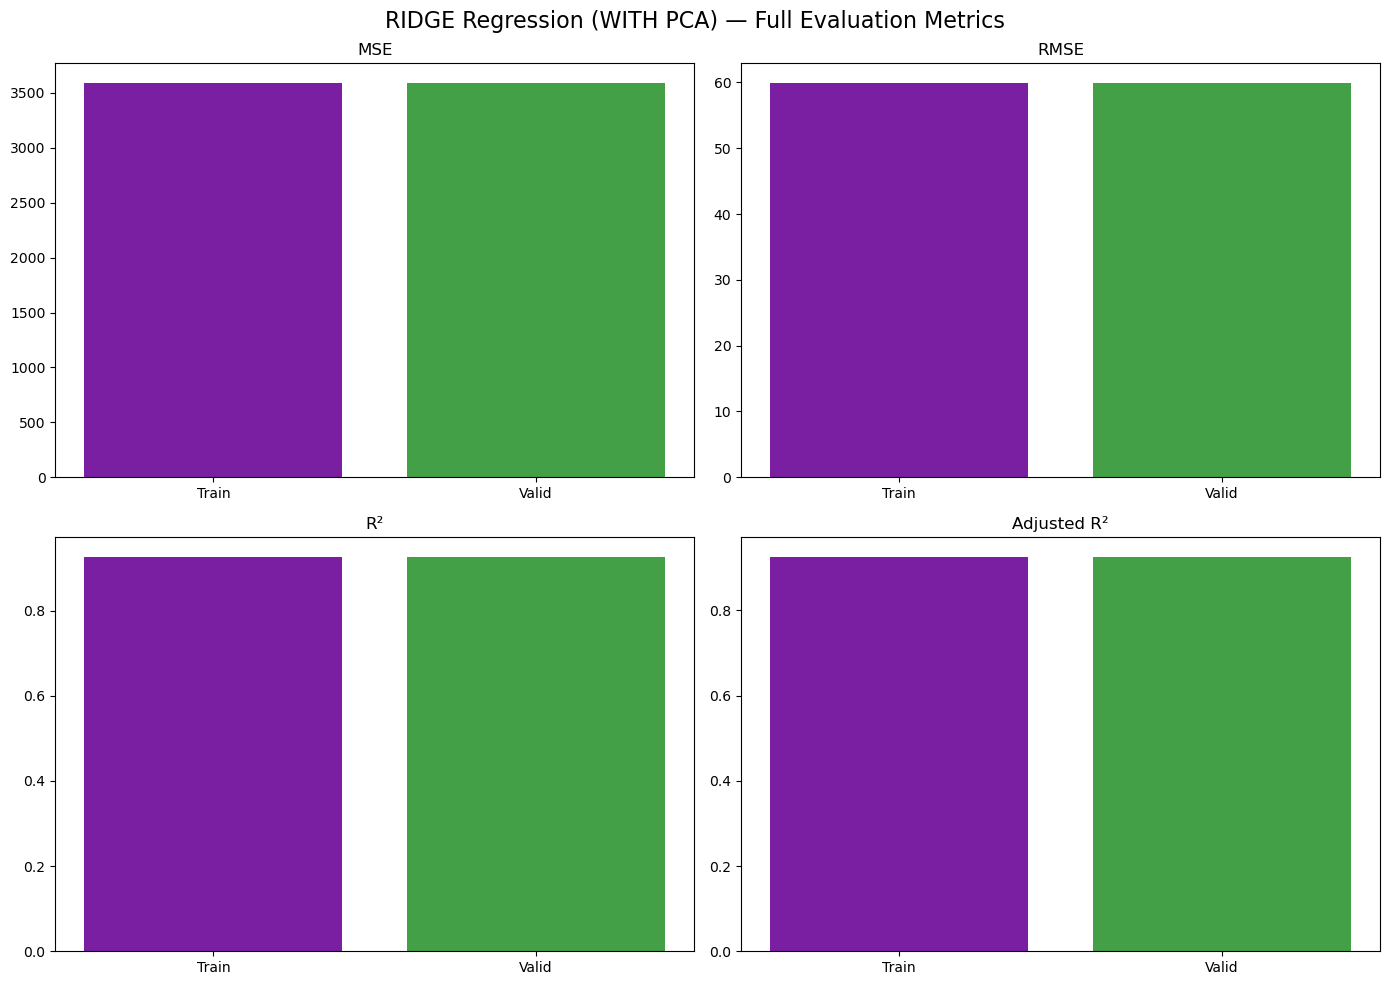

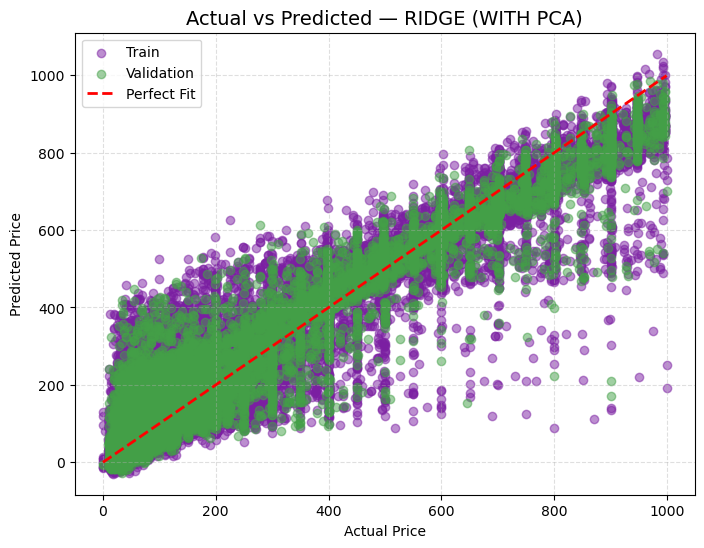

In [208]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# 1) RIDGE WITH PCA — FIND BEST ALPHA
# ============================================================

ridge = Ridge(max_iter=5000)

alpha_grid = np.logspace(-3, 3, 30)  # more granular than Lasso

params = {"alpha": alpha_grid}

ridge_rs = RandomizedSearchCV(
    estimator=ridge,
    param_distributions=params,
    n_iter=12,
    cv=2,
    random_state=42,
    n_jobs=-1
)

ridge_rs.fit(X_train_pca, y_train)

best_alpha = ridge_rs.best_params_["alpha"]
print("Best Alpha:", best_alpha)

# ============================================================
# 2) PREDICTIONS
# ============================================================

train_pred = ridge_rs.predict(X_train_pca)
valid_pred = ridge_rs.predict(X_valid_pca)

# ============================================================
# 3) METRICS
# ============================================================

mse_train = mean_squared_error(y_train, train_pred)
mse_valid = mean_squared_error(y_valid, valid_pred)

rmse_train = np.sqrt(mse_train)
rmse_valid = np.sqrt(mse_valid)

r2_train = r2_score(y_train, train_pred)
r2_valid = r2_score(y_valid, valid_pred)

n_train = X_train_pca.shape[0]
p = X_train_pca.shape[1]
n_valid = X_valid_pca.shape[0]

adj_r2_train = 1 - (1 - r2_train) * ((n_train - 1) / (n_train - p - 1))
adj_r2_valid = 1 - (1 - r2_valid) * ((n_valid - 1) / (n_valid - p - 1))

# ============================================================
# 4) PRINT SUMMARY
# ============================================================

print("\n==============================")
print(" RIDGE REGRESSION — WITH PCA")
print("==============================")
print(f"Train MSE: {mse_train:.4f}")
print(f"Valid MSE: {mse_valid:.4f}")
print(f"Train RMSE: {rmse_train:.4f}")
print(f"Valid RMSE: {rmse_valid:.4f}")
print(f"Train R²: {r2_train:.4f}")
print(f"Valid R²: {r2_valid:.4f}")
print(f"Train Adjusted R²: {adj_r2_train:.4f}")
print(f"Valid Adjusted R²: {adj_r2_valid:.4f}")

# ============================================================
# 5) 4-METRIC BAR CHART (Different Color Theme)
# ============================================================

colors = {
    "train": "#7B1FA2",  # Purple
    "valid": "#43A047"   # Green
}

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("RIDGE Regression (WITH PCA) — Full Evaluation Metrics", fontsize=16)

# ---- MSE ----
axes[0, 0].bar(["Train", "Valid"], [mse_train, mse_valid],
               color=[colors["train"], colors["valid"]])
axes[0, 0].set_title("MSE")

# ---- RMSE ----
axes[0, 1].bar(["Train", "Valid"], [rmse_train, rmse_valid],
               color=[colors["train"], colors["valid"]])
axes[0, 1].set_title("RMSE")

# ---- R² ----
axes[1, 0].bar(["Train", "Valid"], [r2_train, r2_valid],
               color=[colors["train"], colors["valid"]])
axes[1, 0].set_title("R²")

# ---- Adjusted R² ----
axes[1, 1].bar(["Train", "Valid"], [adj_r2_train, adj_r2_valid],
               color=[colors["train"], colors["valid"]])
axes[1, 1].set_title("Adjusted R²")

plt.tight_layout()
plt.show()

# ============================================================
# 6) ACTUAL VS PREDICTED — SCATTER PLOT
# ============================================================

plt.figure(figsize=(8, 6))

plt.scatter(y_train, train_pred, color=colors["train"], alpha=0.5, label="Train")
plt.scatter(y_valid, valid_pred, color=colors["valid"], alpha=0.5, label="Validation")

# Perfect-fit line
mn = min(y_train.min(), y_valid.min())
mx = max(y_train.max(), y_valid.max())
plt.plot([mn, mx], [mn, mx], "r--", linewidth=2, label="Perfect Fit")

plt.title("Actual vs Predicted — RIDGE (WITH PCA)", fontsize=14)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)

plt.show()

# Ridge Regression without PCA

Best Alpha: 242.44620170823308

 RIDGE REGRESSION (NO PCA) SUMMARY
Train MSE: 3400.7919
Valid MSE: 3389.2915
Train RMSE: 58.3163
Valid RMSE: 58.2176
Train R²: 0.9294
Valid R²: 0.9297
Train Adjusted R²: 0.9293
Valid Adjusted R²: 0.9292


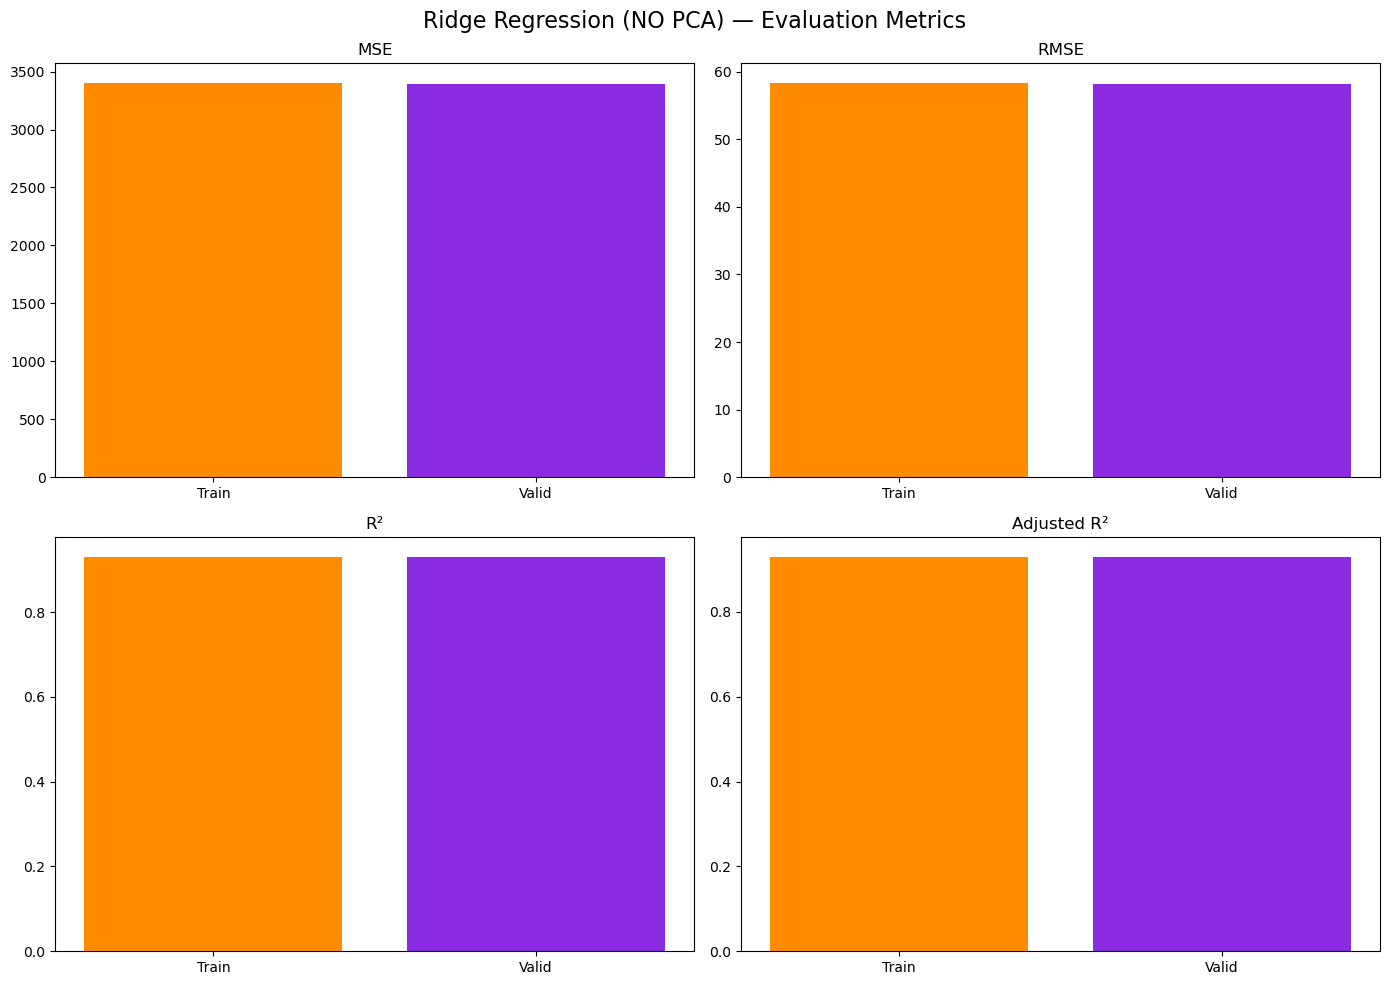

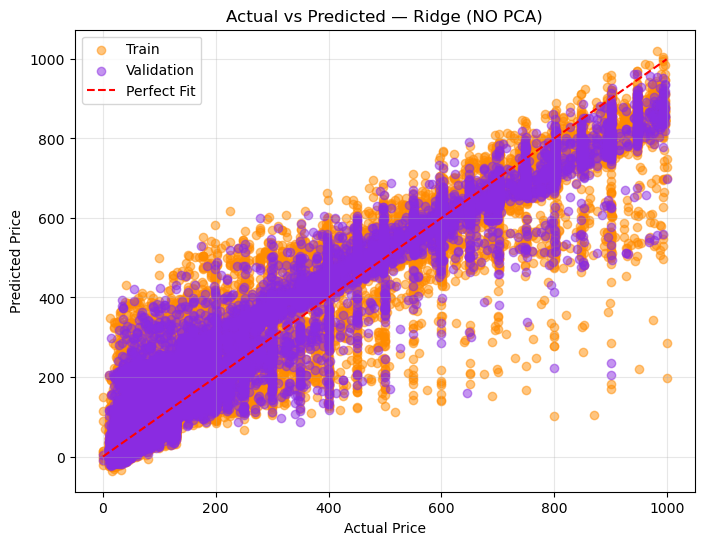

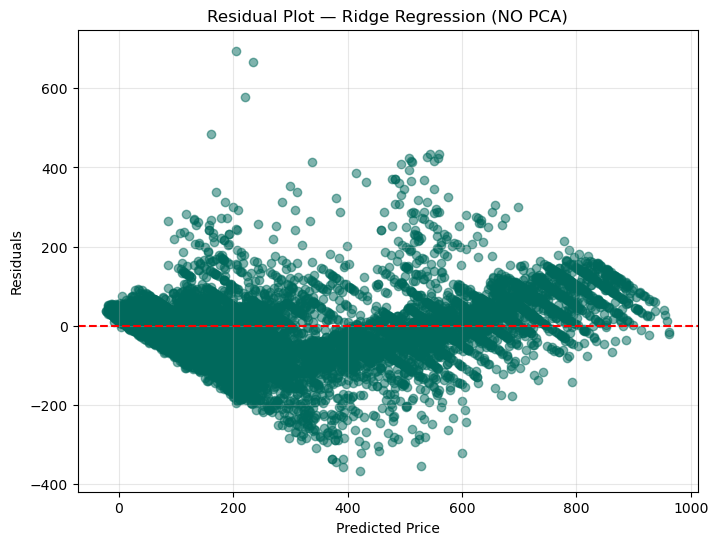

In [210]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# 1) RIDGE REGRESSION (NO PCA)
# ============================================================

ridge = Ridge(max_iter=8000)
alpha_grid = np.logspace(-3, 3, 40)

ridge_rs = RandomizedSearchCV(
    estimator=ridge,
    param_distributions={"alpha": alpha_grid},
    n_iter=12,
    cv=2,
    random_state=0,
    n_jobs=-1
)

ridge_rs.fit(X_train_scaled, y_train)
best_alpha = ridge_rs.best_params_["alpha"]
print("Best Alpha:", best_alpha)

# ============================================================
# 2) PREDICT
# ============================================================

train_pred = ridge_rs.predict(X_train_scaled)
valid_pred = ridge_rs.predict(X_valid_scaled)

# ============================================================
# 3) METRICS
# ============================================================

mse_train = mean_squared_error(y_train, train_pred)
mse_valid = mean_squared_error(y_valid, valid_pred)
rmse_train = np.sqrt(mse_train)
rmse_valid = np.sqrt(mse_valid)
r2_train = r2_score(y_train, train_pred)
r2_valid = r2_score(y_valid, valid_pred)

n_train, p = X_train_scaled.shape
n_valid = X_valid_scaled.shape[0]

adj_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p - 1)
adj_r2_valid = 1 - (1 - r2_valid) * (n_valid - 1) / (n_valid - p - 1)

# ============================================================
# 4) PRINT SUMMARY
# ============================================================

print("\n==============================")
print(" RIDGE REGRESSION (NO PCA) SUMMARY")
print("==============================")
print(f"Train MSE: {mse_train:.4f}")
print(f"Valid MSE: {mse_valid:.4f}")
print(f"Train RMSE: {rmse_train:.4f}")
print(f"Valid RMSE: {rmse_valid:.4f}")
print(f"Train R²: {r2_train:.4f}")
print(f"Valid R²: {r2_valid:.4f}")
print(f"Train Adjusted R²: {adj_r2_train:.4f}")
print(f"Valid Adjusted R²: {adj_r2_valid:.4f}")

# ============================================================
# 5) COLOR THEME
# ============================================================

colors = {
    "train": "#FF8C00",   # deep orange
    "valid": "#8A2BE2"    # electric purple
}

# ============================================================
# 6) 4-METRIC PANEL (MORE PROFESSIONAL)
# ============================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Ridge Regression (NO PCA) — Evaluation Metrics", fontsize=16)

axes[0, 0].bar(["Train", "Valid"], [mse_train, mse_valid],
               color=[colors["train"], colors["valid"]])
axes[0, 0].set_title("MSE")

axes[0, 1].bar(["Train", "Valid"], [rmse_train, rmse_valid],
               color=[colors["train"], colors["valid"]])
axes[0, 1].set_title("RMSE")

axes[1, 0].bar(["Train", "Valid"], [r2_train, r2_valid],
               color=[colors["train"], colors["valid"]])
axes[1, 0].set_title("R²")

axes[1, 1].bar(["Train", "Valid"], [adj_r2_train, adj_r2_valid],
               color=[colors["train"], colors["valid"]])
axes[1, 1].set_title("Adjusted R²")

plt.tight_layout()
plt.show()

# ============================================================
# 7) ACTUAL vs PREDICTED SCATTER
# ============================================================

plt.figure(figsize=(8,6))
plt.scatter(y_train, train_pred, alpha=0.5, color=colors["train"], label="Train")
plt.scatter(y_valid, valid_pred, alpha=0.5, color=colors["valid"], label="Validation")

mn = min(y_train.min(), y_valid.min())
mx = max(y_train.max(), y_valid.max())
plt.plot([mn, mx], [mn, mx], "r--", label="Perfect Fit")

plt.title("Actual vs Predicted — Ridge (NO PCA)")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

# ============================================================
# 8) RESIDUAL PLOT (Check Bias)
# ============================================================

residuals = y_valid - valid_pred

plt.figure(figsize=(8,6))
plt.scatter(valid_pred, residuals, alpha=0.5, color="#00695C")
plt.axhline(0, color="red", linestyle="--")

plt.title("Residual Plot — Ridge Regression (NO PCA)")
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.grid(alpha=0.3)
plt.show()

# Random Forest with PCA


 BEST PARAMETERS FOUND
{'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 12}

 RANDOM FOREST — FULL METRICS SUMMARY
Training MSE: 3160.7131
Validation MSE: 4708.2584
Training RMSE: 56.2202
Validation RMSE: 68.6167
Training R²: 0.9344
Validation R²: 0.9023
Training Adjusted R²: 0.9343
Validation Adjusted R²: 0.9022


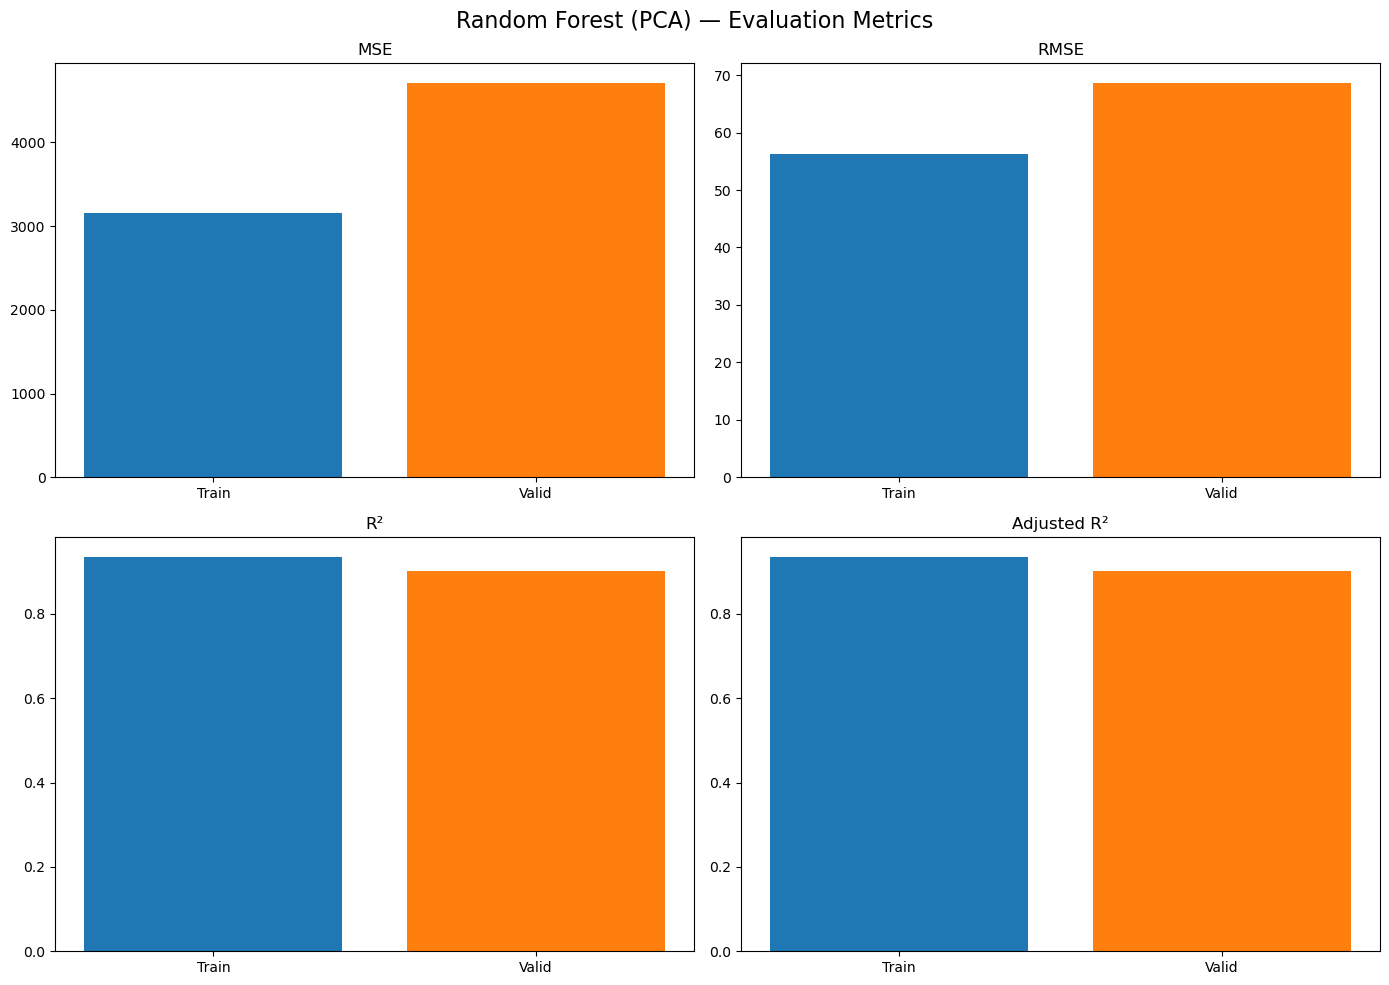

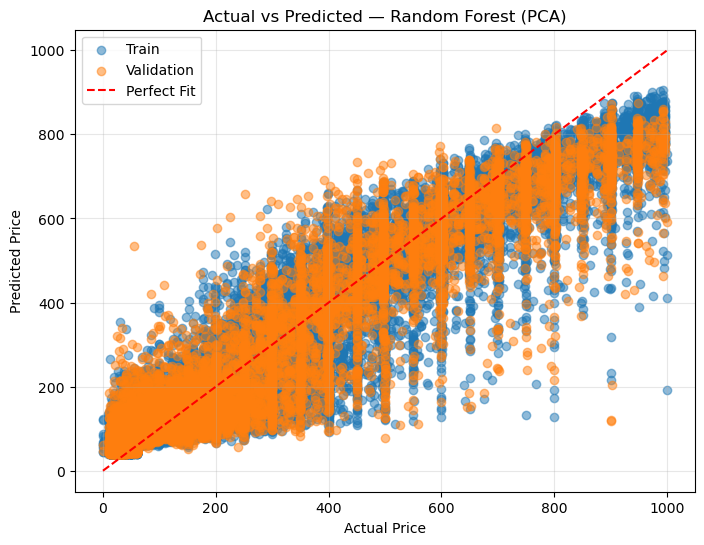

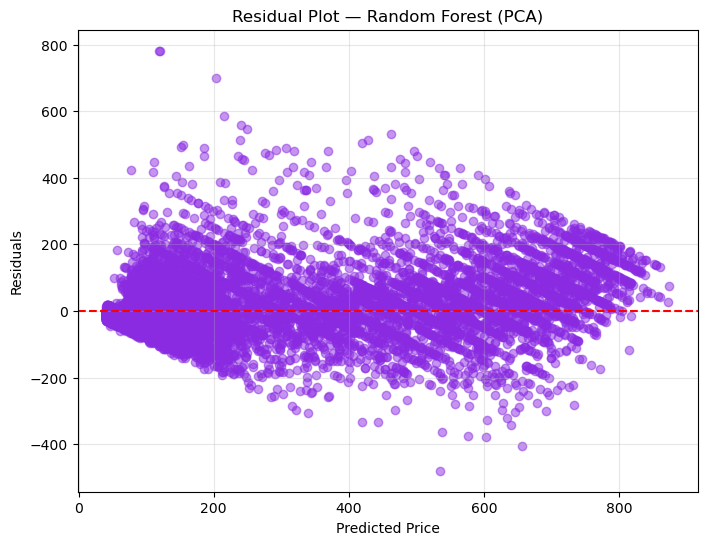

In [212]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# ============================================================
# 1) BASE MODEL
# ============================================================
rf = RandomForestRegressor(random_state=0, n_jobs=-1)

# ============================================================
# 2) PARAMETER GRID 
# ============================================================
param_grid = {
    "n_estimators": [100, 150, 200, 300],
    "max_depth": [6, 10, 12],
    "min_samples_split": [2, 5, 7],
    "min_samples_leaf": [1, 2, 3],
    "max_features": ["sqrt", "log2"]
}

# ============================================================
# 3) RANDOMIZED SEARCH (2-FOLD)
# ============================================================
rf_rs = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=10,
    cv=2,
    random_state=0,
    n_jobs=-1
)

rf_rs.fit(X_train_pca, y_train)

print("\n==============================")
print(" BEST PARAMETERS FOUND")
print("==============================")
print(rf_rs.best_params_)

# ============================================================
# 4) PREDICT
# ============================================================
rf_train_pred = rf_rs.predict(X_train_pca)
rf_valid_pred = rf_rs.predict(X_valid_pca)

# ============================================================
# 5) METRICS
# ============================================================

mse_train = mean_squared_error(y_train, rf_train_pred)
mse_valid = mean_squared_error(y_valid, rf_valid_pred)

rmse_train = np.sqrt(mse_train)
rmse_valid = np.sqrt(mse_valid)

r2_train = r2_score(y_train, rf_train_pred)
r2_valid = r2_score(y_valid, rf_valid_pred)

def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

n_train = X_train_pca.shape[0]
p = X_train_pca.shape[1]

adj_r2_train = adjusted_r2(r2_train, n_train, p)
adj_r2_valid = adjusted_r2(r2_valid, X_valid_pca.shape[0], p)

# ============================================================
# 6) PRINT SUMMARY
# ============================================================

print("\n==============================")
print(" RANDOM FOREST — FULL METRICS SUMMARY")
print("==============================")
print(f"Training MSE: {mse_train:.4f}")
print(f"Validation MSE: {mse_valid:.4f}")
print(f"Training RMSE: {rmse_train:.4f}")
print(f"Validation RMSE: {rmse_valid:.4f}")
print(f"Training R²: {r2_train:.4f}")
print(f"Validation R²: {r2_valid:.4f}")
print(f"Training Adjusted R²: {adj_r2_train:.4f}")
print(f"Validation Adjusted R²: {adj_r2_valid:.4f}")

# ============================================================
# 7) METRIC COMPARISON CHART (4-PANEL)
# ============================================================

colors = {
    "train": "#1f77b4",
    "valid": "#ff7f0e"
}

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Random Forest (PCA) — Evaluation Metrics", fontsize=16)

# ---- MSE ----
axes[0, 0].bar(["Train", "Valid"], [mse_train, mse_valid],
               color=[colors["train"], colors["valid"]])
axes[0, 0].set_title("MSE")

# ---- RMSE ----
axes[0, 1].bar(["Train", "Valid"], [rmse_train, rmse_valid],
               color=[colors["train"], colors["valid"]])
axes[0, 1].set_title("RMSE")

# ---- R² ----
axes[1, 0].bar(["Train", "Valid"], [r2_train, r2_valid],
               color=[colors["train"], colors["valid"]])
axes[1, 0].set_title("R²")

# ---- Adjusted R² ----
axes[1, 1].bar(["Train", "Valid"], [adj_r2_train, adj_r2_valid],
               color=[colors["train"], colors["valid"]])
axes[1, 1].set_title("Adjusted R²")

plt.tight_layout()
plt.show()

# ============================================================
# 8) SCATTER PLOT — ACTUAL vs PREDICTED
# ============================================================

plt.figure(figsize=(8, 6))
plt.scatter(y_train, rf_train_pred, color=colors["train"], alpha=0.5, label="Train")
plt.scatter(y_valid, rf_valid_pred, color=colors["valid"], alpha=0.5, label="Validation")

mn = min(y_train.min(), y_valid.min())
mx = max(y_train.max(), y_valid.max())
plt.plot([mn, mx], [mn, mx], "r--", label="Perfect Fit")

plt.title("Actual vs Predicted — Random Forest (PCA)")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ============================================================
# 9) RESIDUAL PLOT — ERROR ANALYSIS
# ============================================================

residuals = y_valid - rf_valid_pred

plt.figure(figsize=(8, 6))
plt.scatter(rf_valid_pred, residuals, alpha=0.5, color="#8A2BE2")
plt.axhline(0, color="red", linestyle="--")

plt.title("Residual Plot — Random Forest (PCA)")
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.grid(alpha=0.3)
plt.show()

# Random Forest without PCA


 RANDOM FOREST — NO PCA (NEW COLORS)
Train MSE: 2264.7813
Valid MSE: 2727.5154
Train RMSE: 47.5897
Valid RMSE: 52.2256
Train R²: 0.9530
Valid R²: 0.9434
Train Adjusted R²: 0.9529
Valid Adjusted R²: 0.9430


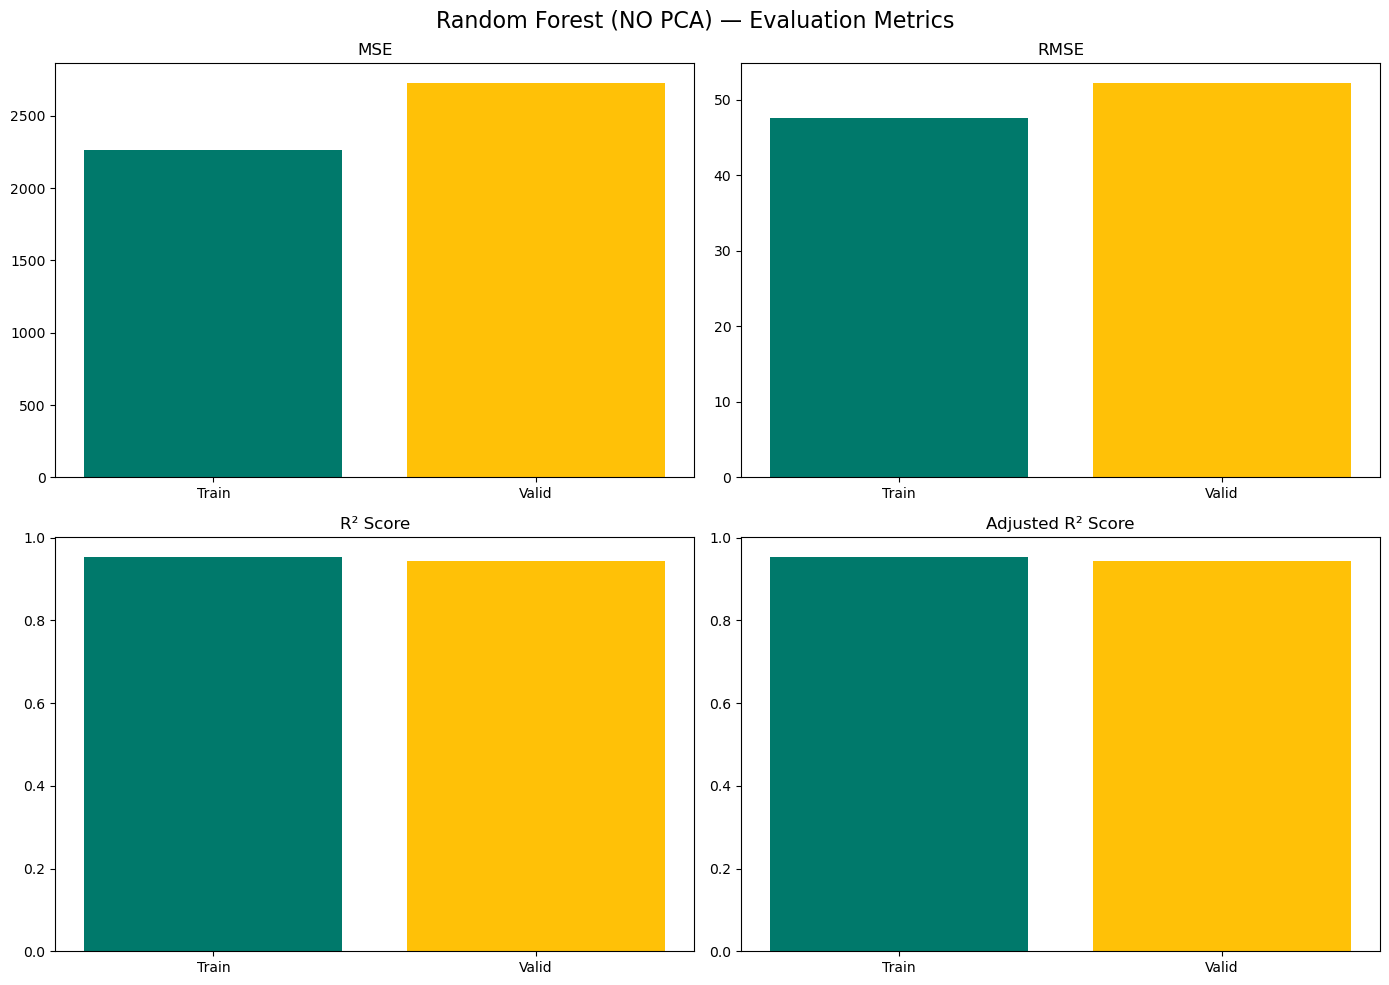

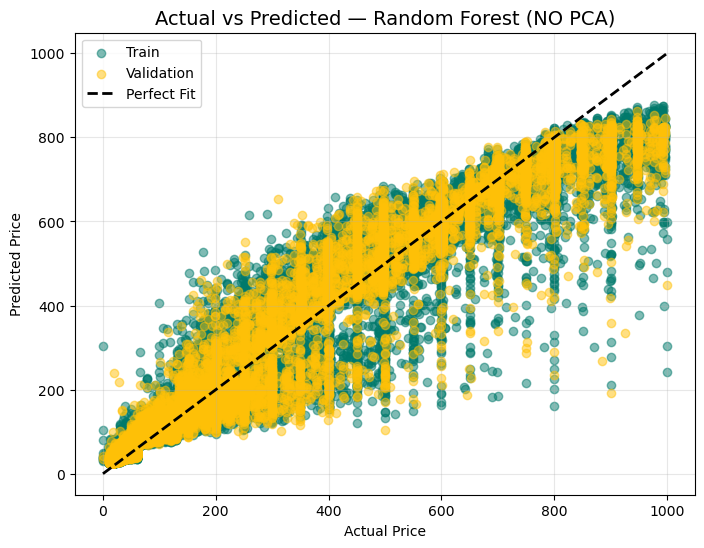

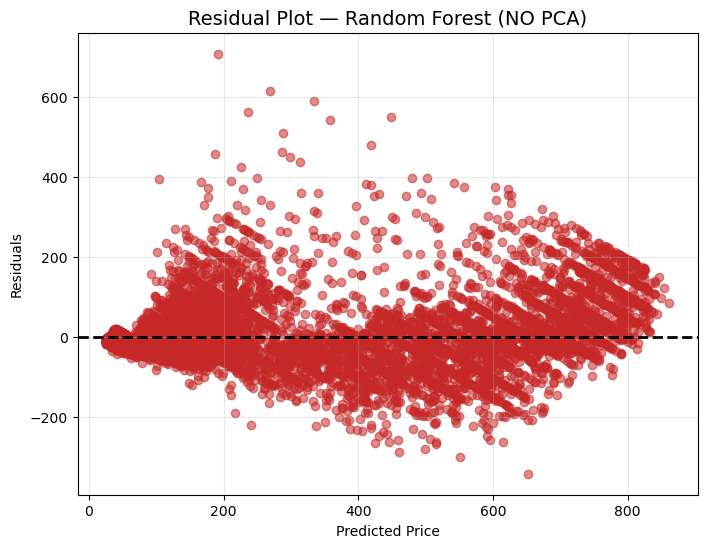

In [214]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# 1) TRAIN RANDOM FOREST MODEL (NO PCA)
# ============================================================

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features="sqrt",
    random_state=0,
    n_jobs=-1
)

rf.fit(X_train_scaled, y_train)

# ============================================================
# 2) PREDICTIONS
# ============================================================
train_pred = rf.predict(X_train_scaled)
valid_pred = rf.predict(X_valid_scaled)

# ============================================================
# 3) METRICS
# ============================================================

mse_train = mean_squared_error(y_train, train_pred)
mse_valid = mean_squared_error(y_valid, valid_pred)

rmse_train = np.sqrt(mse_train)
rmse_valid = np.sqrt(mse_valid)

r2_train = r2_score(y_train, train_pred)
r2_valid = r2_score(y_valid, valid_pred)

n_train, p = X_train_scaled.shape
n_valid = X_valid_scaled.shape[0]

adj_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p - 1)
adj_r2_valid = 1 - (1 - r2_valid) * (n_valid - 1) / (n_valid - p - 1)

# ============================================================
# 4) PRINT RESULTS
# ============================================================

print("\n==============================")
print(" RANDOM FOREST — NO PCA (NEW COLORS)")
print("==============================")
print(f"Train MSE: {mse_train:.4f}")
print(f"Valid MSE: {mse_valid:.4f}")
print(f"Train RMSE: {rmse_train:.4f}")
print(f"Valid RMSE: {rmse_valid:.4f}")
print(f"Train R²: {r2_train:.4f}")
print(f"Valid R²: {r2_valid:.4f}")
print(f"Train Adjusted R²: {adj_r2_train:.4f}")
print(f"Valid Adjusted R²: {adj_r2_valid:.4f}")

# ============================================================
# 5) NEW COLOR PALETTE
# ============================================================

colors = {
    "train": "#00796B",   # Dark Cyan
    "valid": "#FFC107",   # Amber Gold
    "residual": "#C62828" # Deep Red
}

# ============================================================
# 6) METRICS COMPARISON CHART
# ============================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Random Forest (NO PCA) — Evaluation Metrics", fontsize=16)

axes[0, 0].bar(["Train", "Valid"], [mse_train, mse_valid],
               color=[colors["train"], colors["valid"]])
axes[0, 0].set_title("MSE")

axes[0, 1].bar(["Train", "Valid"], [rmse_train, rmse_valid],
               color=[colors["train"], colors["valid"]])
axes[0, 1].set_title("RMSE")

axes[1, 0].bar(["Train", "Valid"], [r2_train, r2_valid],
               color=[colors["train"], colors["valid"]])
axes[1, 0].set_title("R² Score")

axes[1, 1].bar(["Train", "Valid"], [adj_r2_train, adj_r2_valid],
               color=[colors["train"], colors["valid"]])
axes[1, 1].set_title("Adjusted R² Score")

plt.tight_layout()
plt.show()

# ============================================================
# 7) ACTUAL vs PREDICTED — NEW COLORS + PERFECT FIT LINE
# ============================================================

plt.figure(figsize=(8, 6))

plt.scatter(y_train, train_pred, color=colors["train"], alpha=0.5, label="Train")
plt.scatter(y_valid, valid_pred, color=colors["valid"], alpha=0.5, label="Validation")

mn = min(y_train.min(), y_valid.min())
mx = max(y_train.max(), y_valid.max())
plt.plot([mn, mx], [mn, mx], "k--", linewidth=2, label="Perfect Fit")  # black dashed

plt.title("Actual vs Predicted — Random Forest (NO PCA)", fontsize=14)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ============================================================
# 8) RESIDUAL PLOT — NEW DEEP RED COLOR
# ============================================================

residuals = y_valid - valid_pred

plt.figure(figsize=(8, 6))
plt.scatter(valid_pred, residuals, alpha=0.55, color=colors["residual"])
plt.axhline(0, color="black", linestyle="--", linewidth=2)

plt.title("Residual Plot — Random Forest (NO PCA)", fontsize=14)
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.grid(alpha=0.3)
plt.show()

In [216]:
# ============================================================
# 📌 FEATURE IMPORTANCE — RANDOM FOREST (NO PCA)
# ============================================================

#  Get feature names
feature_names = X_final_df.columns

#  Extract importances
importances = rf.feature_importances_

feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
})

feat_imp = feat_imp.sort_values(by="Importance", ascending=False).reset_index(drop=True)

pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None)

print("\n==============================")
print(" FULL FEATURE IMPORTANCE TABLE (ALL ROWS)")
print("==============================")
display(feat_imp)


 FULL FEATURE IMPORTANCE TABLE (ALL ROWS)


Feature    Importance
0                                           Security Deposit  1.720659e-01
1                                               Cleaning Fee  1.393387e-01
2                                       State_Capital Region  1.054720e-01
3                                                   Latitude  9.965681e-02
4                                            City_copenhagen  9.834682e-02
5                                            Country_Denmark  8.334811e-02
6                                                  Longitude  4.355766e-02
7                                              Price_Bin_Low  3.745605e-02
8                                               Extra People  2.243496e-02
9                                           Price_Bin_Medium  2.138501e-02
10                                           State_Hong Kong  1.945951e-02
11                                            City_hong kong  1.857898e-02
12                                         Country_Hong Kong  1.731861e-02
13                                 Room Type_Non-Entire Home  1.395671e-02
14                                               City_berlin  7.467390e-03
15                                           Country_Germany  7.156070e-03
16                                              Accommodates  6.993276e-03
17                                              State_Berlin  6.509203e-03
18                                                  Bedrooms  6.162418e-03
19                                               Square Feet  6.105023e-03
20                                Host_Location_Match_Airbnb  5.797101e-03
21                                            Country_Canada  5.415519e-03
22                                                      Beds  4.963356e-03
23                                              City_toronto  3.217324e-03
24                                             State_Ontario  2.931278e-03
25                                                 Bathrooms  2.886951e-03
26                                              State_Vienna  2.567493e-03
27                                               City_vienna  2.510625e-03
28                                           Guests Included  2.363629e-03
29                                       Host Listings Count  2.323872e-03
30                                               City_athens  1.772471e-03
31                                       Country_Netherlands  1.625380e-03
32                                       State_North Holland  1.536679e-03
33                                           Country_Belgium  1.442680e-03
34                                          Availability 365  1.412372e-03
35                                           Availability 90  1.380848e-03
36                                             Nights_Booked  1.350282e-03
37                                            Occupancy_Rate  1.237724e-03
38                                           Availability 30  1.098634e-03
39                                           Availability 60  1.001317e-03
40                                            Minimum Nights  9.895541e-04
41                                         Reviews per Month  9.508025e-04
42                                    Review Scores Location  8.927129e-04
43                                         Number of Reviews  8.347623e-04
44                                            Country_Greece  8.345372e-04
45                                            City_amsterdam  7.852482e-04
46                                       Property Type_Other  7.725812e-04
47                                            Kitchen_Dining  7.632046e-04
48                                    State_Brussels Capital  7.083246e-04
49                                      Review Scores Rating  6.339778e-04
50                                             City_brussels  6.265260e-04
51                                             Amenity_Score  5.942552e-04
52                                            Host_Age_Years  5.787552e-04
53 

# for Extra point

In [219]:
# ============================================================
# 📌  LINEAR REGRESSION (NO PCA) — COEFFICIENT INTERPRETATION
# ============================================================

# ============================================================
#  FIT LINEAR REGRESSION ON SCALED DATA
# ============================================================

coef_lr = LinearRegression()
coef_lr.fit(X_train_scaled, y_train)

# ============================================================
#  CREATE COEFFICIENT TABLE
# ============================================================

coef_df = pd.DataFrame({
    "Feature": X_final_df.columns,     # correct feature names
    "Coefficient": coef_lr.coef_       # learned weights
})

# Sort full table (ascending = most negative at top)
coef_sorted_asc = coef_df.sort_values(by="Coefficient", ascending=True).reset_index(drop=True)

# ============================================================
#  PRINT — TOP 10 NEGATIVE IMPACT FEATURES
#     (these *decrease* predicted price the most)
# ============================================================

top_negative = coef_sorted_asc.head(10)

print("\n==============================================")
print(" 🔻 TOP 10 NEGATIVE FEATURES (Decrease Price)")
print("==============================================")
display(top_negative)

# ============================================================
#  PRINT — TOP 10 POSITIVE IMPACT FEATURES
#     (these *increase* predicted price the most)
# ============================================================

top_positive = coef_sorted_asc.tail(10).iloc[::-1]  # reverse to show strongest first

print("\n==============================================")
print(" 🔺 TOP 10 POSITIVE FEATURES (Increase Price)")
print("==============================================")
display(top_positive)

# ============================================================
# OPTIONAL — SHOW FULL COEFFICIENT LIST (ALL ROWS)
# ============================================================

pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None)

print("\n==============================================")
print(" FULL COEFFICIENT TABLE (ALL FEATURES)")
print("==============================================")
display(coef_sorted_asc)


 🔻 TOP 10 NEGATIVE FEATURES (Decrease Price)


Feature  Coefficient
0           Nights_Booked  -977.483328
1          Country_Canada  -168.422887
2            State_Vienna  -116.584135
3  State_British Columbia   -94.355826
4      City_agii anargiri   -77.763015
5     State_County Dublin   -70.239918
6         Country_Ireland   -70.239918
7               Longitude   -69.413587
8         Country_Germany   -66.092195
9        Price_Bin_Medium   -47.128013


 🔺 TOP 10 POSITIVE FEATURES (Increase Price)


Feature  Coefficient
164                          Occupancy_Rate  1955.301846
163                        Availability 365   977.483328
162                   City_rathmines dublin   314.243280
161                            City_dublino   250.061042
160           City_hong kong , sai ying pun   231.190771
159                 City_mongkok yau ma tei   228.305712
158  City_exchange street lower, temple bar   227.166247
157                            City_olypmic   222.080579
156                            City_sai wan   211.798371
155                  City_danforth, toronto   206.796324


 FULL COEFFICIENT TABLE (ALL FEATURES)


Feature   Coefficient
0                                              Nights_Booked -9.774833e+02
1                                             Country_Canada -1.684229e+02
2                                               State_Vienna -1.165841e+02
3                                     State_British Columbia -9.435583e+01
4                                         City_agii anargiri -7.776302e+01
5                                        State_County Dublin -7.023992e+01
6                                            Country_Ireland -7.023992e+01
7                                                  Longitude -6.941359e+01
8                                            Country_Germany -6.609220e+01
9                                           Price_Bin_Medium -4.712801e+01
10                                             Price_Bin_Low -4.556798e+01
11                                              State_Quebec -3.799987e+01
12                                             State_Ontario -3.606720e+01
13                                       State_North Holland -3.239218e+01
14                                           Country_Belgium -2.223421e+01
15                                    State_Brussels Capital -1.444829e+01
16                                        Essential_Comforts -1.394223e+01
17                                Cancellation Policy_Strict -1.220644e+01
18                                      City_kypseli, athina -1.089506e+01
19                                            State_Flanders -7.785915e+00
20                                 Room Type_Non-Entire Home -7.635368e+00
21                                Host_Verification_Provided -6.172211e+00
22                       House Rules Category_Property Rules -4.835243e+00
23           Amenity_Strategic_Tier_Moderate-Value Amenities -4.112207e+00
24                     House Rules Category_Behavioral Rules -3.498055e+00
25                                           Availability 90 -3.226890e+00
26                                     Access_Partial Access -2.425980e+00
27                          Interaction_Non Interactive Host -1.812893e+00
28                                       Review Scores Value -1.664116e+00
29                                            Luxury_Premium -1.267783e+00
30                                            Minimum Nights -1.169155e+00
31                                               City_athens -1.114406e+00
32                                            Host_Age_Years -1.063326e+00
33                                       Host Listings Count -8.681140e-01
34                                           Guests Included -8.113791e-01
35                                 Review Scores Cleanliness -7.512654e-01
36                                             Amenity_Score -5.334266e-01
37                                    Review Scores Accuracy -5.320231e-01
38                           Host Response Time_Within a day -4.200338e-01
39                                      Host Acceptance Rate -3.970497e-01
40                                                      Beds -3.717414e-01
41                         Host Response Time_Within an hour -3.671282e-01
42                                              Extra People -3.423766e-01
43                                     Last_Review_Age_Years -2.612176e-01
44                                         Reviews per Month -1.943857e-01
45                                        Host Response Rate -1.567639e-01
46                                           City_ampelokipi -1.175027e-01
47                                               Square Feet -1.052937e-01
48                                     Review Scores Checkin -5.184685e-02
49                                               City_guelph -1.007550e-11
50                                              City_landecy -1.731060e-12
51                                           City_sadnymount -1.421085e-14
52                                         City_java- eiland  1.455192e-11
53 

In [307]:
from scipy.stats import chi2_contingency

# ======================================================
# FUNCTION — CRAMÉR’S V (for categorical)
# ======================================================
def cramers_v(x, y):
    table = pd.crosstab(x, y)
    chi2 = chi2_contingency(table, correction=False)[0]
    n = table.sum().sum()
    r, k = table.shape
    return np.sqrt((chi2 / n) / (min(r - 1, k - 1)))

# ======================================================
# PREP — Bucket Price into 3 bins (needed for categorical correlation)
# ======================================================
airbnb["Price_Bin"] = pd.qcut(airbnb["Price"], q=3, labels=["Low", "Medium", "High"])


# ======================================================
#  FLOAT64 CORRELATION WITH PRICE
# ======================================================
float_cols = airbnb.select_dtypes(include=["float64"]).columns.tolist()

float_corr = (
    airbnb[float_cols].corrwith(airbnb["Price"])
    .sort_values(ascending=False)
    .reset_index()
)

float_corr.columns = ["Feature", "Correlation_with_Price"]
float_corr.index = float_corr.index + 1


# ======================================================
#  INT64 CORRELATION WITH PRICE
# ======================================================
int64_cols = airbnb.select_dtypes(include=["int64"]).columns.tolist()

# Remove Price if inside
if "Price" in int64_cols:
    int64_cols.remove("Price")

int64_corr = (
    airbnb[int64_cols].corrwith(airbnb["Price"])
    .sort_values(ascending=False)
    .reset_index()
)

int64_corr.columns = ["Feature", "Correlation_with_Price"]
int64_corr.index = int64_corr.index + 1


# ======================================================
#  INT32 CORRELATION WITH PRICE
# ======================================================
int32_cols = airbnb.select_dtypes(include=["int32"]).columns.tolist()

int32_corr = (
    airbnb[int32_cols].corrwith(airbnb["Price"])
    .sort_values(ascending=False)
    .reset_index()
)

int32_corr.columns = ["Feature", "Correlation_with_Price"]
int32_corr.index = int32_corr.index + 1


# ======================================================
#  OBJECT — Cramér’s V with Price_Bin
# ======================================================
obj_cols = airbnb.select_dtypes(include=["object"]).columns.tolist()
obj_cols = [col for col in obj_cols if airbnb[col].nunique() > 1]

cramer_list = []

for col in obj_cols:
    try:
        v = cramers_v(airbnb[col], airbnb["Price_Bin"])
        cramer_list.append([col, round(v, 4)])
    except:
        cramer_list.append([col, np.nan])

object_corr = (
    pd.DataFrame(cramer_list, columns=["Feature", "CramersV"])
    .sort_values(by="CramersV", ascending=False)
)

object_corr.index = object_corr.index + 1


# ======================================================
# PRINT RESULTS
# ======================================================
print("\n==============================")
print(" FLOAT64 → Price Correlation")
print("==============================")
print(float_corr)

print("\n==============================")
print(" INT64 → Price Correlation")
print("==============================")
print(int64_corr)

print("\n==============================")
print(" INT32 → Price Correlation")
print("==============================")
print(int32_corr)

print("\n============================================")
print(" OBJECT (Categorical) → Price Association (Cramér’s V)")
print("============================================")
print(object_corr)


 FLOAT64 → Price Correlation
                        Feature  Correlation_with_Price
1                         Price                1.000000
2              Security Deposit                0.943005
3                  Cleaning Fee                0.753185
4                     Longitude                0.305987
5                   Square Feet                0.108242
6                Occupancy_Rate                0.075681
7        Review Scores Location                0.038513
8   Review Scores Communication                0.024982
9          Review Scores Rating                0.024321
10        Review Scores Checkin                0.012174
11           Host Response Rate                0.011519
12                     Latitude                0.009557
13                    Bathrooms                0.009453
14    Review Scores Cleanliness                0.006013
15       Review Scores Accuracy                0.000766
16          Review Scores Value               -0.014445
17         Host Ac

In [221]:
# Show shapes for X and y
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_valid_scaled shape:", X_valid_scaled.shape)

print("y_train shape:", y_train.shape)
print("y_valid shape:", y_valid.shape)

X_train_scaled shape: (93966, 165)
X_valid_scaled shape: (23492, 165)
y_train shape: (93966,)
y_valid shape: (23492,)


# with pca

In [236]:
import pandas as pd
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# ============================================================
# LINEAR REGRESSION PCA (already trained as model_pca)
# ============================================================
lr_pca_r2_train = r2_score(y_train, model_pca.predict(X_train_pca))
lr_pca_r2_valid = r2_score(y_valid, model_pca.predict(X_valid_pca))
lr_pca_rmse_train = np.sqrt(mean_squared_error(y_train, model_pca.predict(X_train_pca)))
lr_pca_rmse_valid = np.sqrt(mean_squared_error(y_valid, model_pca.predict(X_valid_pca)))

# ============================================================
# RANDOM FOREST PCA (already trained as rf_rs)
# ============================================================
rf_pca_r2_train = r2_score(y_train, rf_rs.predict(X_train_pca))
rf_pca_r2_valid = r2_score(y_valid, rf_rs.predict(X_valid_pca))
rf_pca_rmse_train = np.sqrt(mean_squared_error(y_train, rf_rs.predict(X_train_pca)))
rf_pca_rmse_valid = np.sqrt(mean_squared_error(y_valid, rf_rs.predict(X_valid_pca)))

# ============================================================
# LASSO PCA — TRAIN ON PCA DATA
# ============================================================
lasso_pca_model = Lasso(alpha=1.0, random_state=0, max_iter=10000)
lasso_pca_model.fit(X_train_pca, y_train)

lasso_pca_r2_train = r2_score(y_train, lasso_pca_model.predict(X_train_pca))
lasso_pca_r2_valid = r2_score(y_valid, lasso_pca_model.predict(X_valid_pca))
lasso_pca_rmse_train = np.sqrt(mean_squared_error(y_train, lasso_pca_model.predict(X_train_pca)))
lasso_pca_rmse_valid = np.sqrt(mean_squared_error(y_valid, lasso_pca_model.predict(X_valid_pca)))

# ============================================================
# RIDGE PCA — TRAIN ON PCA DATA
# ============================================================
ridge_pca_model = Ridge(alpha=1.0, random_state=0)
ridge_pca_model.fit(X_train_pca, y_train)

ridge_pca_r2_train = r2_score(y_train, ridge_pca_model.predict(X_train_pca))
ridge_pca_r2_valid = r2_score(y_valid, ridge_pca_model.predict(X_valid_pca))
ridge_pca_rmse_train = np.sqrt(mean_squared_error(y_train, ridge_pca_model.predict(X_train_pca)))
ridge_pca_rmse_valid = np.sqrt(mean_squared_error(y_valid, ridge_pca_model.predict(X_valid_pca)))

# ============================================================
# RESULTS TABLE — WITH PCA
# ============================================================
models_pca = ["Linear Regression (PCA)", "Random Forest (PCA)", "Lasso (PCA)", "Ridge (PCA)"]

results_pca = pd.DataFrame({
    "Model": models_pca,
    "Train R²": [lr_pca_r2_train, rf_pca_r2_train, lasso_pca_r2_train, ridge_pca_r2_train],
    "Validation R²": [lr_pca_r2_valid, rf_pca_r2_valid, lasso_pca_r2_valid, ridge_pca_r2_valid],
    "Train RMSE": [lr_pca_rmse_train, rf_pca_rmse_train, lasso_pca_rmse_train, ridge_pca_rmse_train],
    "Validation RMSE": [lr_pca_rmse_valid, rf_pca_rmse_valid, lasso_pca_rmse_valid, ridge_pca_rmse_valid]
})

print("=====================================")
print("📌 MODEL PERFORMANCE — WITH PCA")
print("=====================================")
display(results_pca)

📌 MODEL PERFORMANCE — WITH PCA


Model  Train R²  Validation R²  Train RMSE  \
0  Linear Regression (PCA)  0.925550       0.925572   59.881288   
1      Random Forest (PCA)  0.934375       0.902318   56.220220   
2              Lasso (PCA)  0.923897       0.924004   60.542464   
3              Ridge (PCA)  0.925550       0.925572   59.881288   

   Validation RMSE  
0        59.895319  
1        68.616750  
2        60.522853  
3        59.895328

# without pca

In [239]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# ============================================================
# LINEAR REGRESSION — NO PCA
# ============================================================
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

lr_r2_train = r2_score(y_train, lr_model.predict(X_train_scaled))
lr_r2_valid = r2_score(y_valid, lr_model.predict(X_valid_scaled))
lr_rmse_train = np.sqrt(mean_squared_error(y_train, lr_model.predict(X_train_scaled)))
lr_rmse_valid = np.sqrt(mean_squared_error(y_valid, lr_model.predict(X_valid_scaled)))

# ============================================================
# RANDOM FOREST — NO PCA
# ============================================================
rf_model = RandomForestRegressor(
    n_estimators=150,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features="sqrt",
    random_state=0,
    n_jobs=-1
)
rf_model.fit(X_train_scaled, y_train)

rf_r2_train = r2_score(y_train, rf_model.predict(X_train_scaled))
rf_r2_valid = r2_score(y_valid, rf_model.predict(X_valid_scaled))
rf_rmse_train = np.sqrt(mean_squared_error(y_train, rf_model.predict(X_train_scaled)))
rf_rmse_valid = np.sqrt(mean_squared_error(y_valid, rf_model.predict(X_valid_scaled)))

# ============================================================
# LASSO — NO PCA
# ============================================================
lasso_model = Lasso(alpha=1.0, random_state=0, max_iter=10000)
lasso_model.fit(X_train_scaled, y_train)

lasso_r2_train = r2_score(y_train, lasso_model.predict(X_train_scaled))
lasso_r2_valid = r2_score(y_valid, lasso_model.predict(X_valid_scaled))
lasso_rmse_train = np.sqrt(mean_squared_error(y_train, lasso_model.predict(X_train_scaled)))
lasso_rmse_valid = np.sqrt(mean_squared_error(y_valid, lasso_model.predict(X_valid_scaled)))

# ============================================================
# RIDGE — NO PCA
# ============================================================
ridge_model = Ridge(alpha=1.0, random_state=0)
ridge_model.fit(X_train_scaled, y_train)

ridge_r2_train = r2_score(y_train, ridge_model.predict(X_train_scaled))
ridge_r2_valid = r2_score(y_valid, ridge_model.predict(X_valid_scaled))
ridge_rmse_train = np.sqrt(mean_squared_error(y_train, ridge_model.predict(X_train_scaled)))
ridge_rmse_valid = np.sqrt(mean_squared_error(y_valid, ridge_model.predict(X_valid_scaled)))

# ============================================================
# RESULTS TABLE — WITHOUT PCA
# ============================================================
models_no_pca = ["Linear Regression", "Random Forest", "Lasso", "Ridge"]

results_no_pca = pd.DataFrame({
    "Model": models_no_pca,
    "Train R²": [lr_r2_train, rf_r2_train, lasso_r2_train, ridge_r2_train],
    "Validation R²": [lr_r2_valid, rf_r2_valid, lasso_r2_valid, ridge_r2_valid],
    "Train RMSE": [lr_rmse_train, rf_rmse_train, lasso_rmse_train, ridge_rmse_train],
    "Validation RMSE": [lr_rmse_valid, rf_rmse_valid, lasso_rmse_valid, ridge_rmse_valid]
})

print("=====================================")
print("📌 MODEL PERFORMANCE — WITHOUT PCA")
print("=====================================")
display(results_no_pca)

📌 MODEL PERFORMANCE — WITHOUT PCA


Model  Train R²  Validation R²  Train RMSE  Validation RMSE
0  Linear Regression  0.929513       0.929497   58.265738        58.294445
1      Random Forest  0.939203       0.932790   54.112627        56.916783
2              Lasso  0.925355       0.925604   59.959554        59.882519
3              Ridge  0.929494       0.929709   58.273529        58.206788